In [1]:
import os
import pickle
import cv2
import matplotlib
import tensorflow as tf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import datetime as dt

In [2]:
from tensorflow.python.client import device_lib
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(device_lib.list_local_devices())

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13324447932903159894
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4930941747
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12005162160023461389
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
with open('Models/model1.json', 'r') as j_file:
    loaded_model_json = j_file.read()
model1 = tf.keras.models.model_from_json(loaded_model_json)
model1.load_weights("Models/model1.h5")

In [4]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
gaussian_noise_9 (GaussianNo (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
gaussian_noise_10 (GaussianN (None, 26, 26, 64)       

In [5]:
def loadPreprocess():
    ### Load In Data
    (trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()
    trainY = tf.keras.utils.to_categorical(trainY)
    testY = tf.keras.utils.to_categorical(testY)
    return [trainX/255, trainY, testX/255, testY]

def returnClassIndex(trainY,class_index):
    labels = np.argmax(trainY, axis = 1)
    return [ i for i in range(len(labels)) if labels[i] == class_index]

trainX, trainY, testX, testY = loadPreprocess()
model2  = tf.keras.Model(inputs = model1.input,
                         outputs = model1.get_layer(model1.layers[-3].name).output
                        )
model1.compile(optimizer = tf.keras.optimizers.Adam(), 
               loss = "categorical_crossentropy",  metrics= ['accuracy']
              )
### Predictions
p = model1.predict(trainX,  verbose = 1)
preds = np.argmax(p, axis= 1)
c, f = np.unique(preds, return_counts = True)

50000/50000 [==============================] - 32s 635us/sample


<BarContainer object of 10 artists>

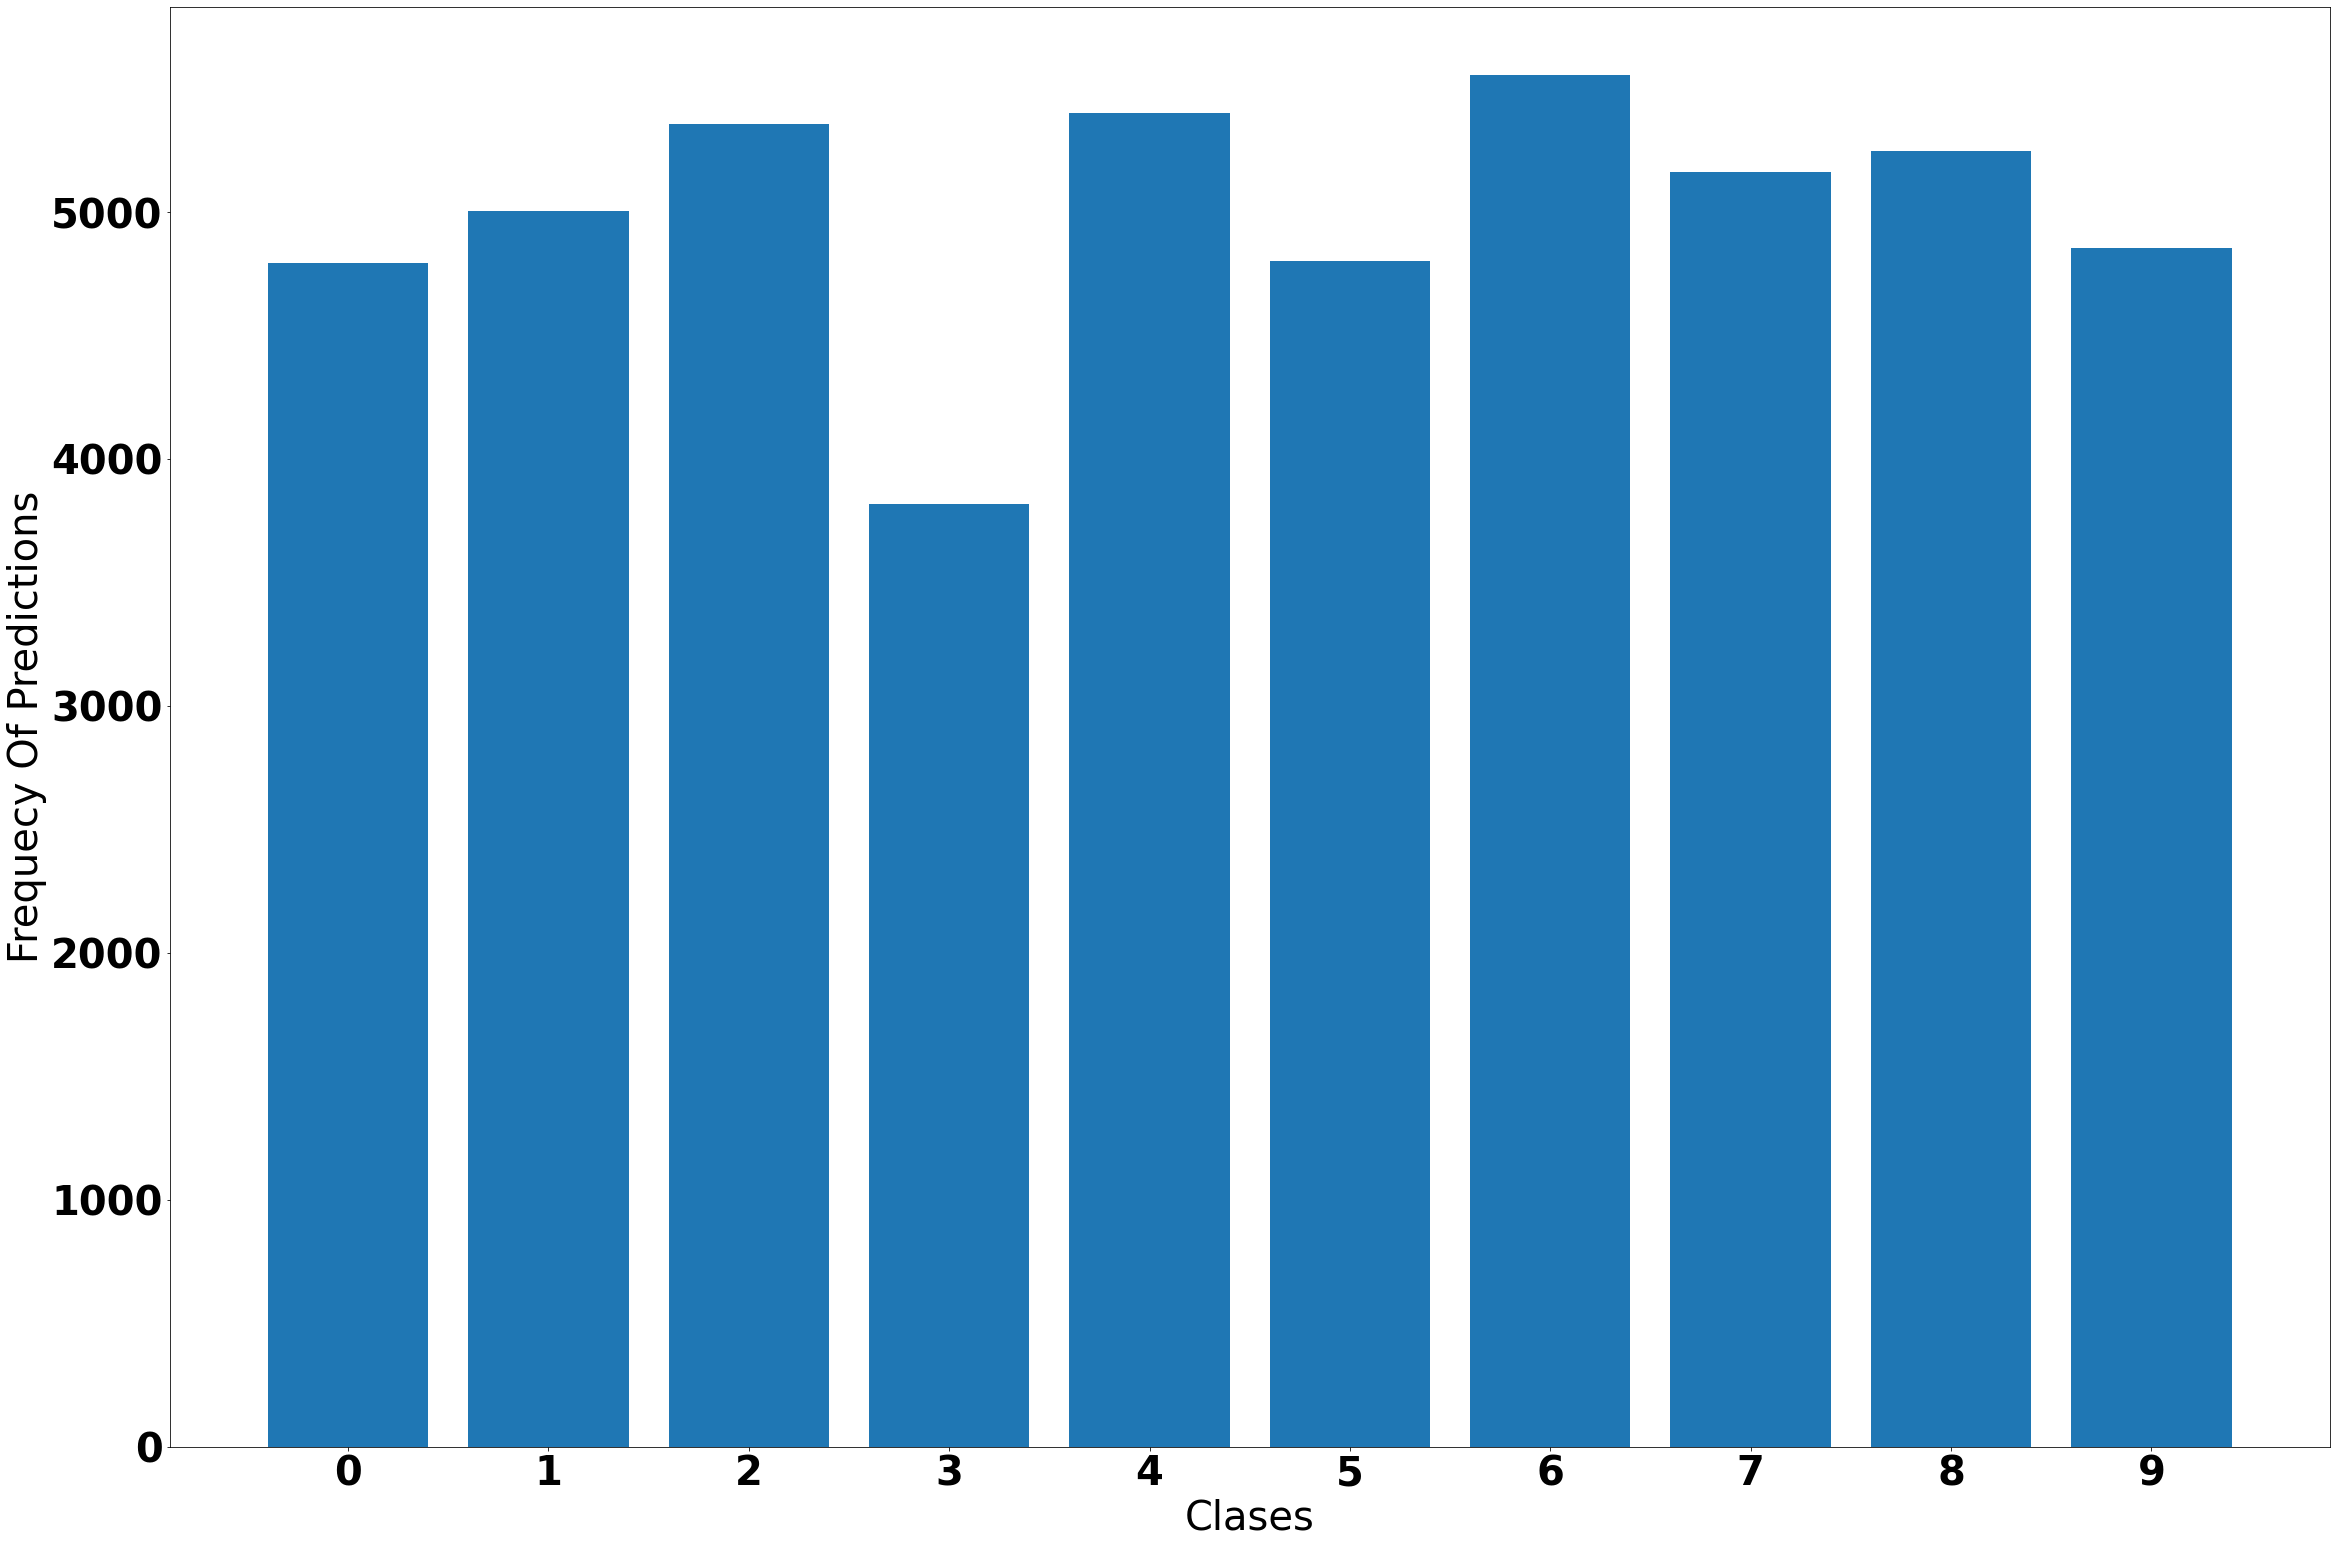

In [6]:
%matplotlib inline
fig = plt.figure( figsize = (30,20))
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 40}

matplotlib.rc('font', **font)
ax = fig.add_axes([0,0,1,1 ])
ax.set_xlabel("Clases")
ax.set_ylabel("Frequecy Of Predictions")
ax.set_xticks(c)
ax.bar(c,f)

In [7]:
def plot_class_predictions(idx):
    classes =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',
               'truck']
    print("Class #{}".format(idx))
    p = model1.predict(trainX[returnClassIndex(trainY,idx)],  verbose = 1)
    preds = np.argmax(p, axis= 1)
    c, f = np.unique(preds, return_counts = True)
    fig = plt.figure( figsize = (30,20))
    font = {'family' : 'sans',
            'weight' : 'bold',
            'size'   : 40}
    matplotlib.rc('font', **font)
    ax = fig.add_axes([0,0,1,1 ])
    ax.set_title("{} Predictions".format(classes[idx]))
    ax.set_xlabel("Clases")
    ax.set_ylabel("Frequecy Of Predictions")
    ax.set_xticks(c)
    ax.bar(c,f)

Class #0
5000/5000 [==============================] - 3s 612us/sample


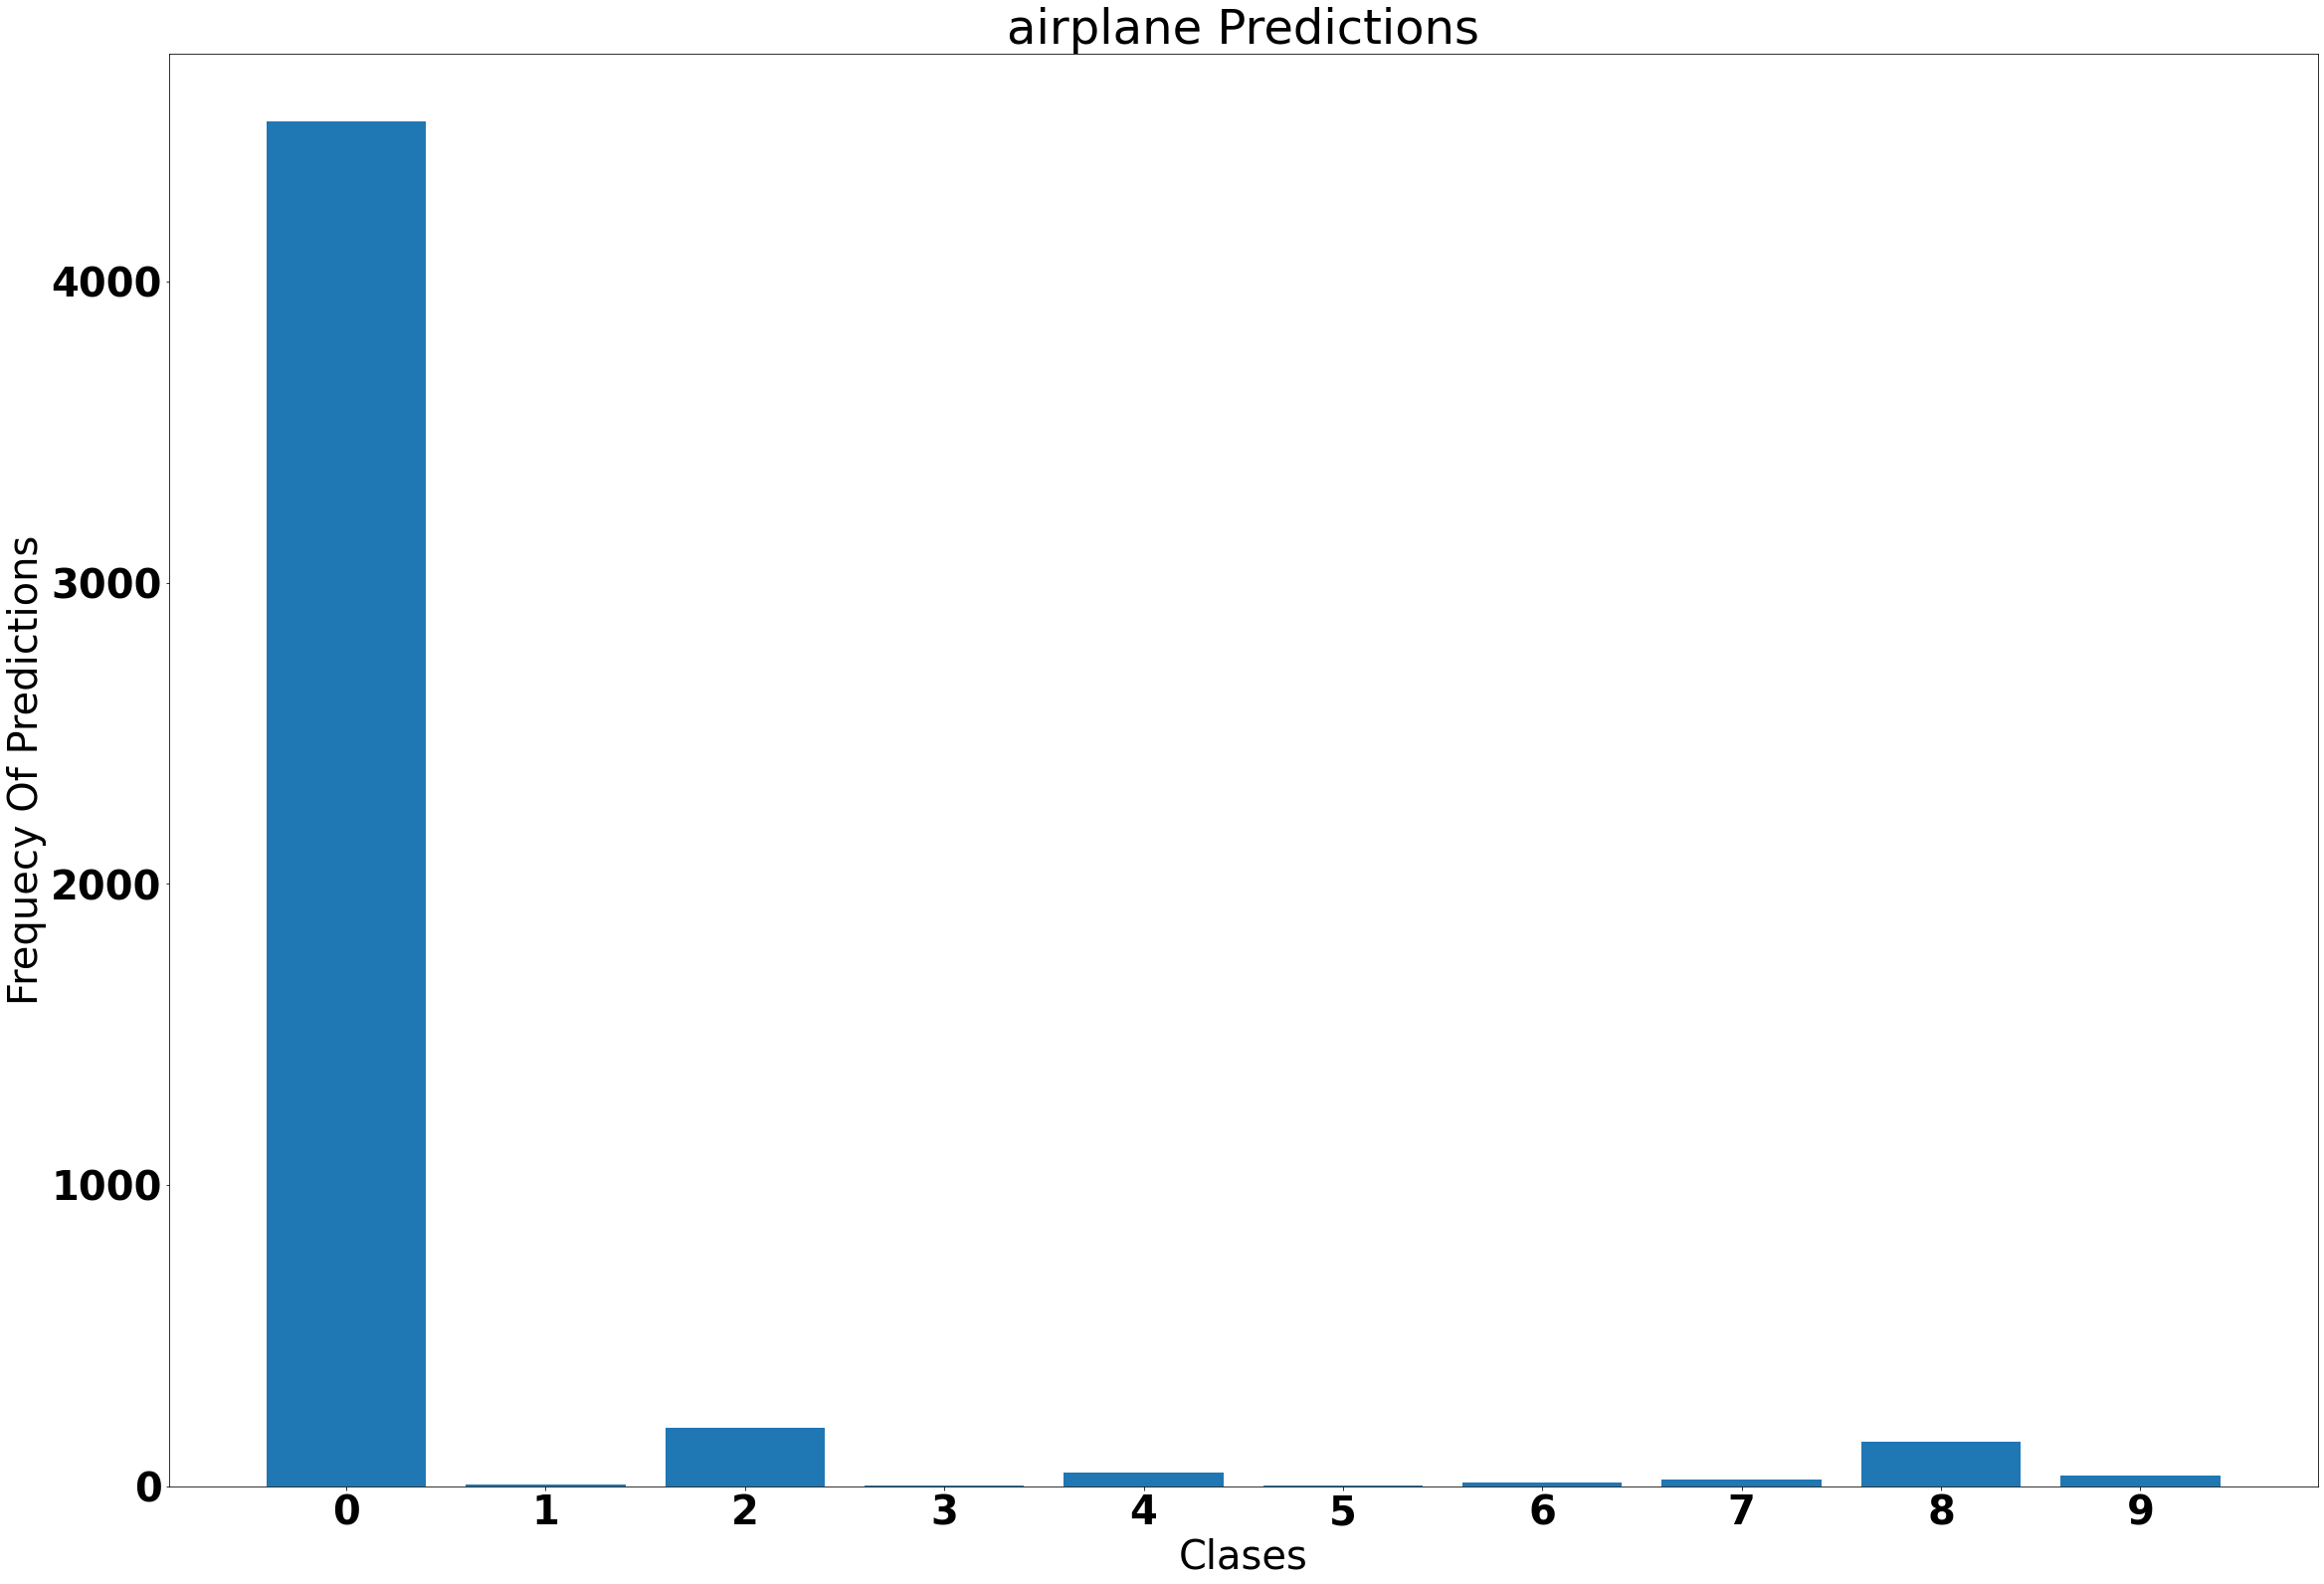

In [8]:
%matplotlib inline
plot_class_predictions(0)

Class #1
5000/5000 [==============================] - 3s 534us/sample


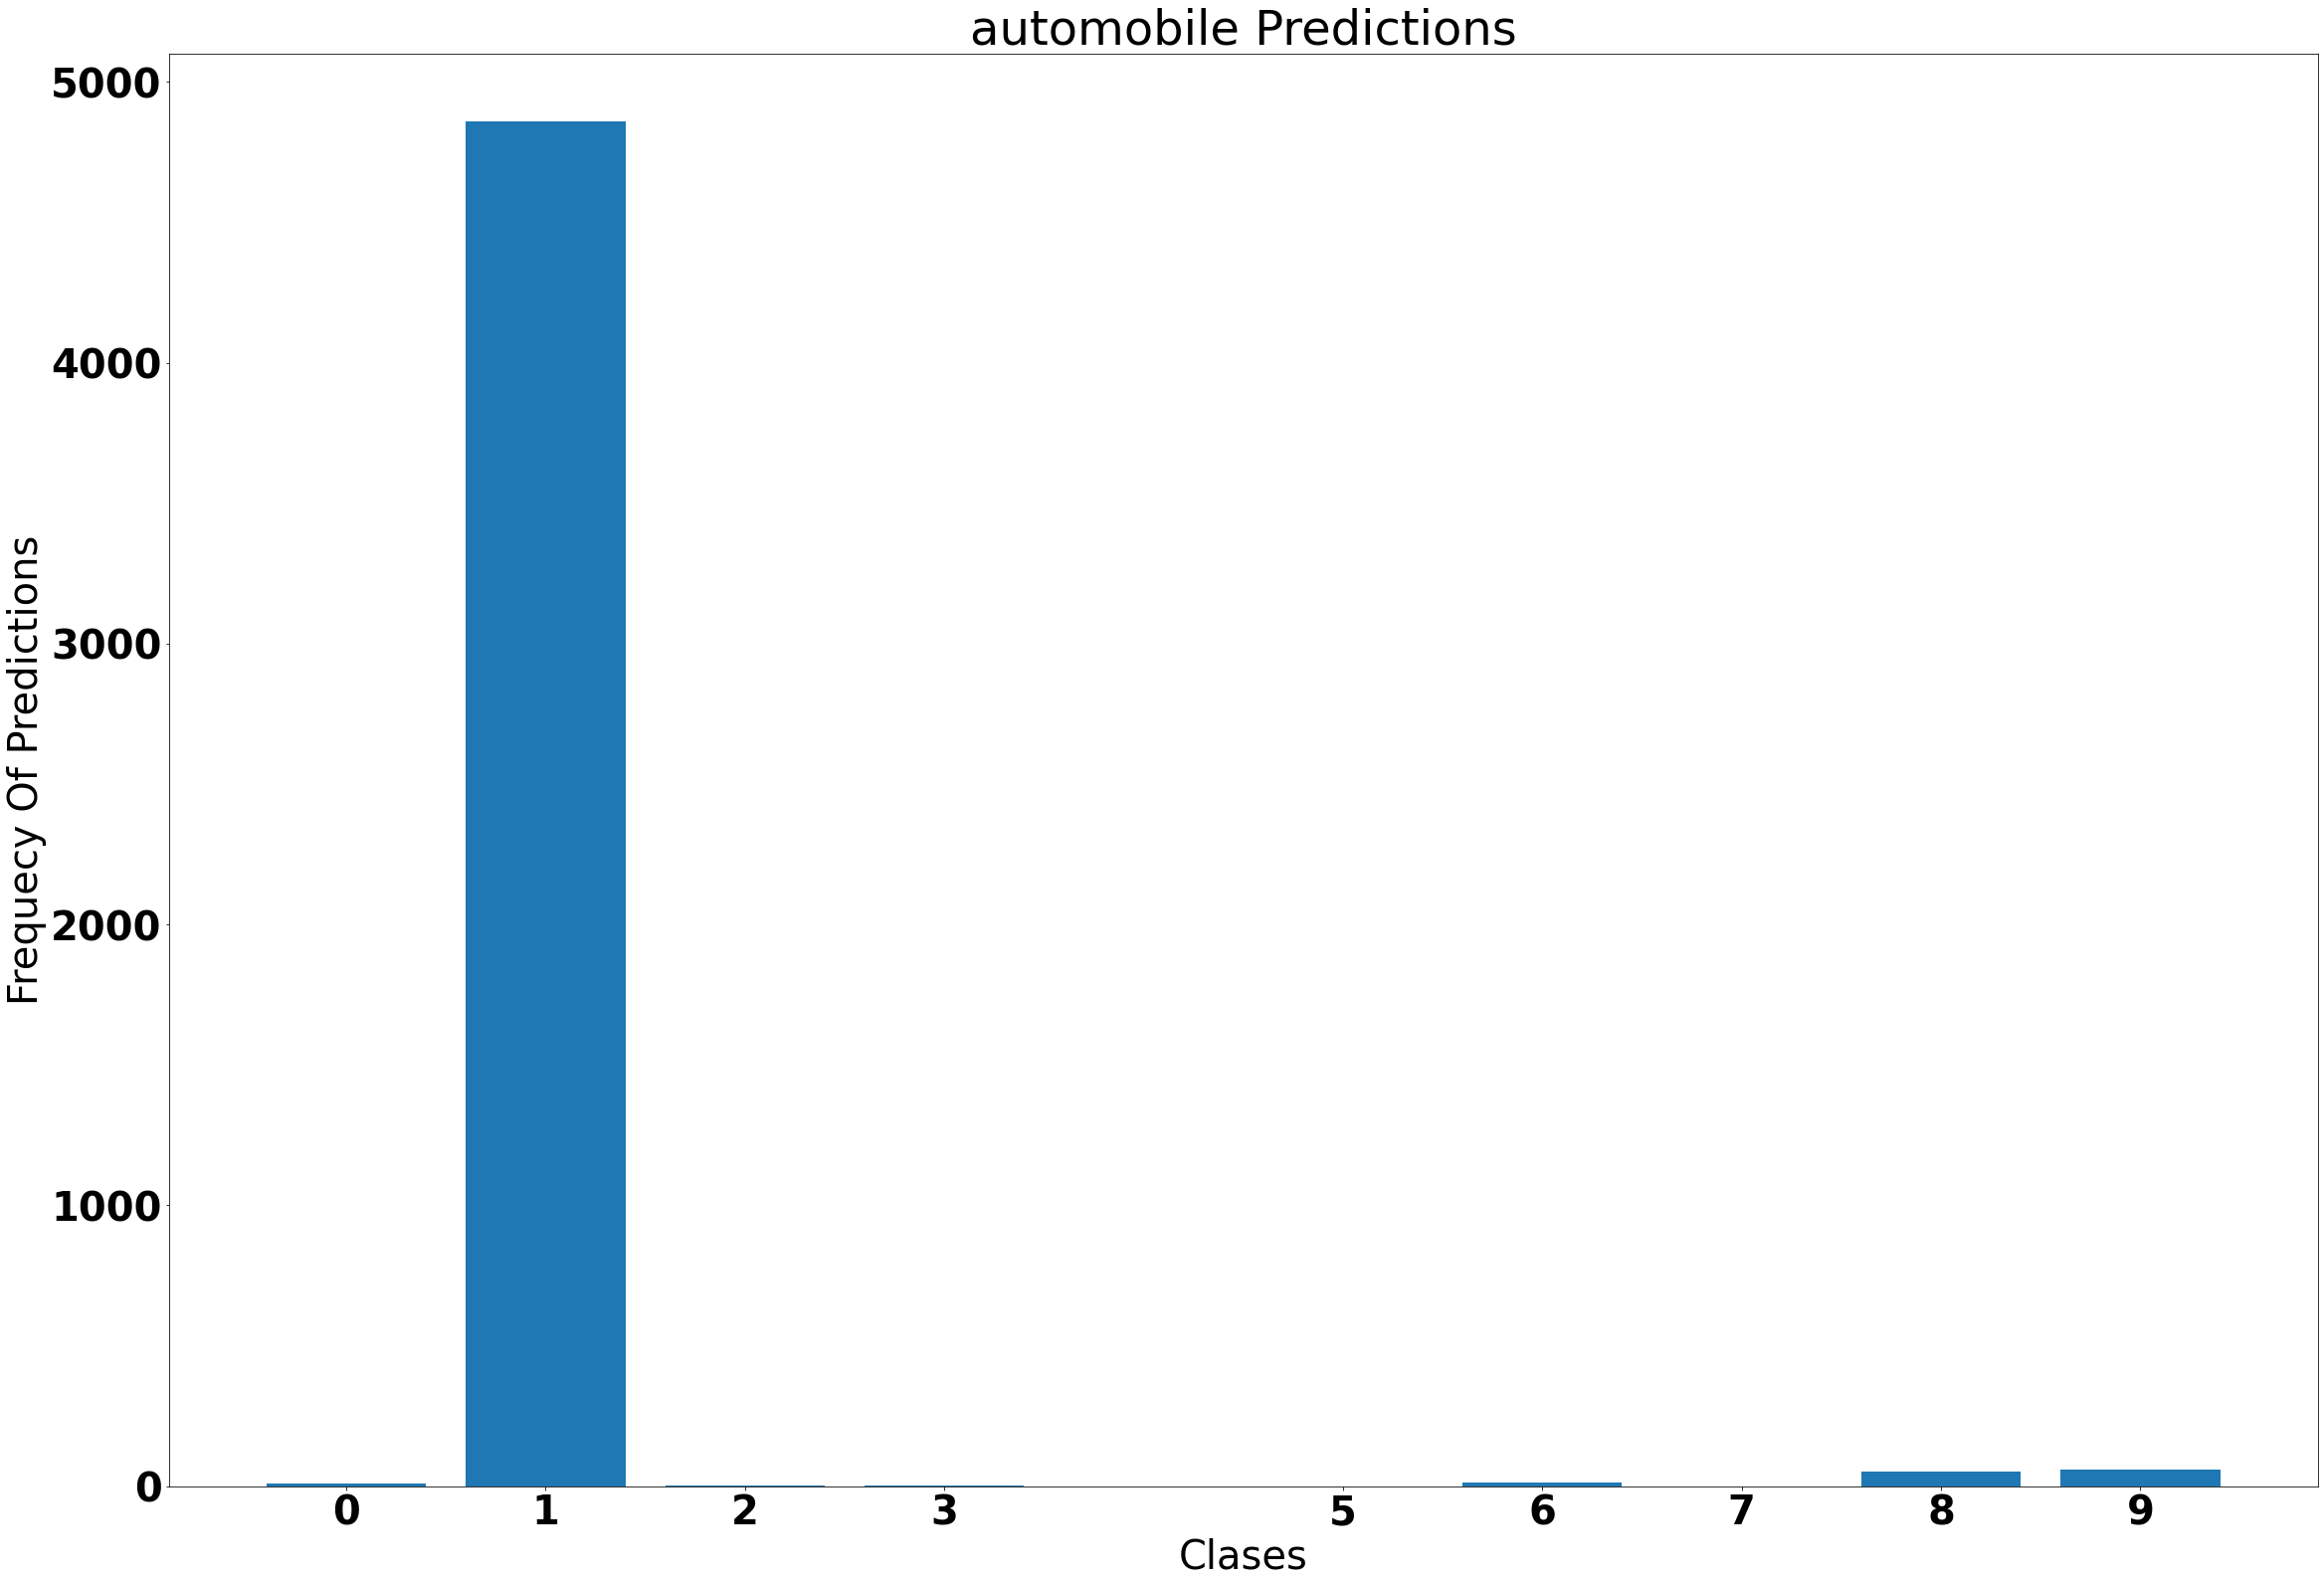

In [9]:
%matplotlib inline
plot_class_predictions(1)

Class #2
5000/5000 [==============================] - 3s 533us/sample


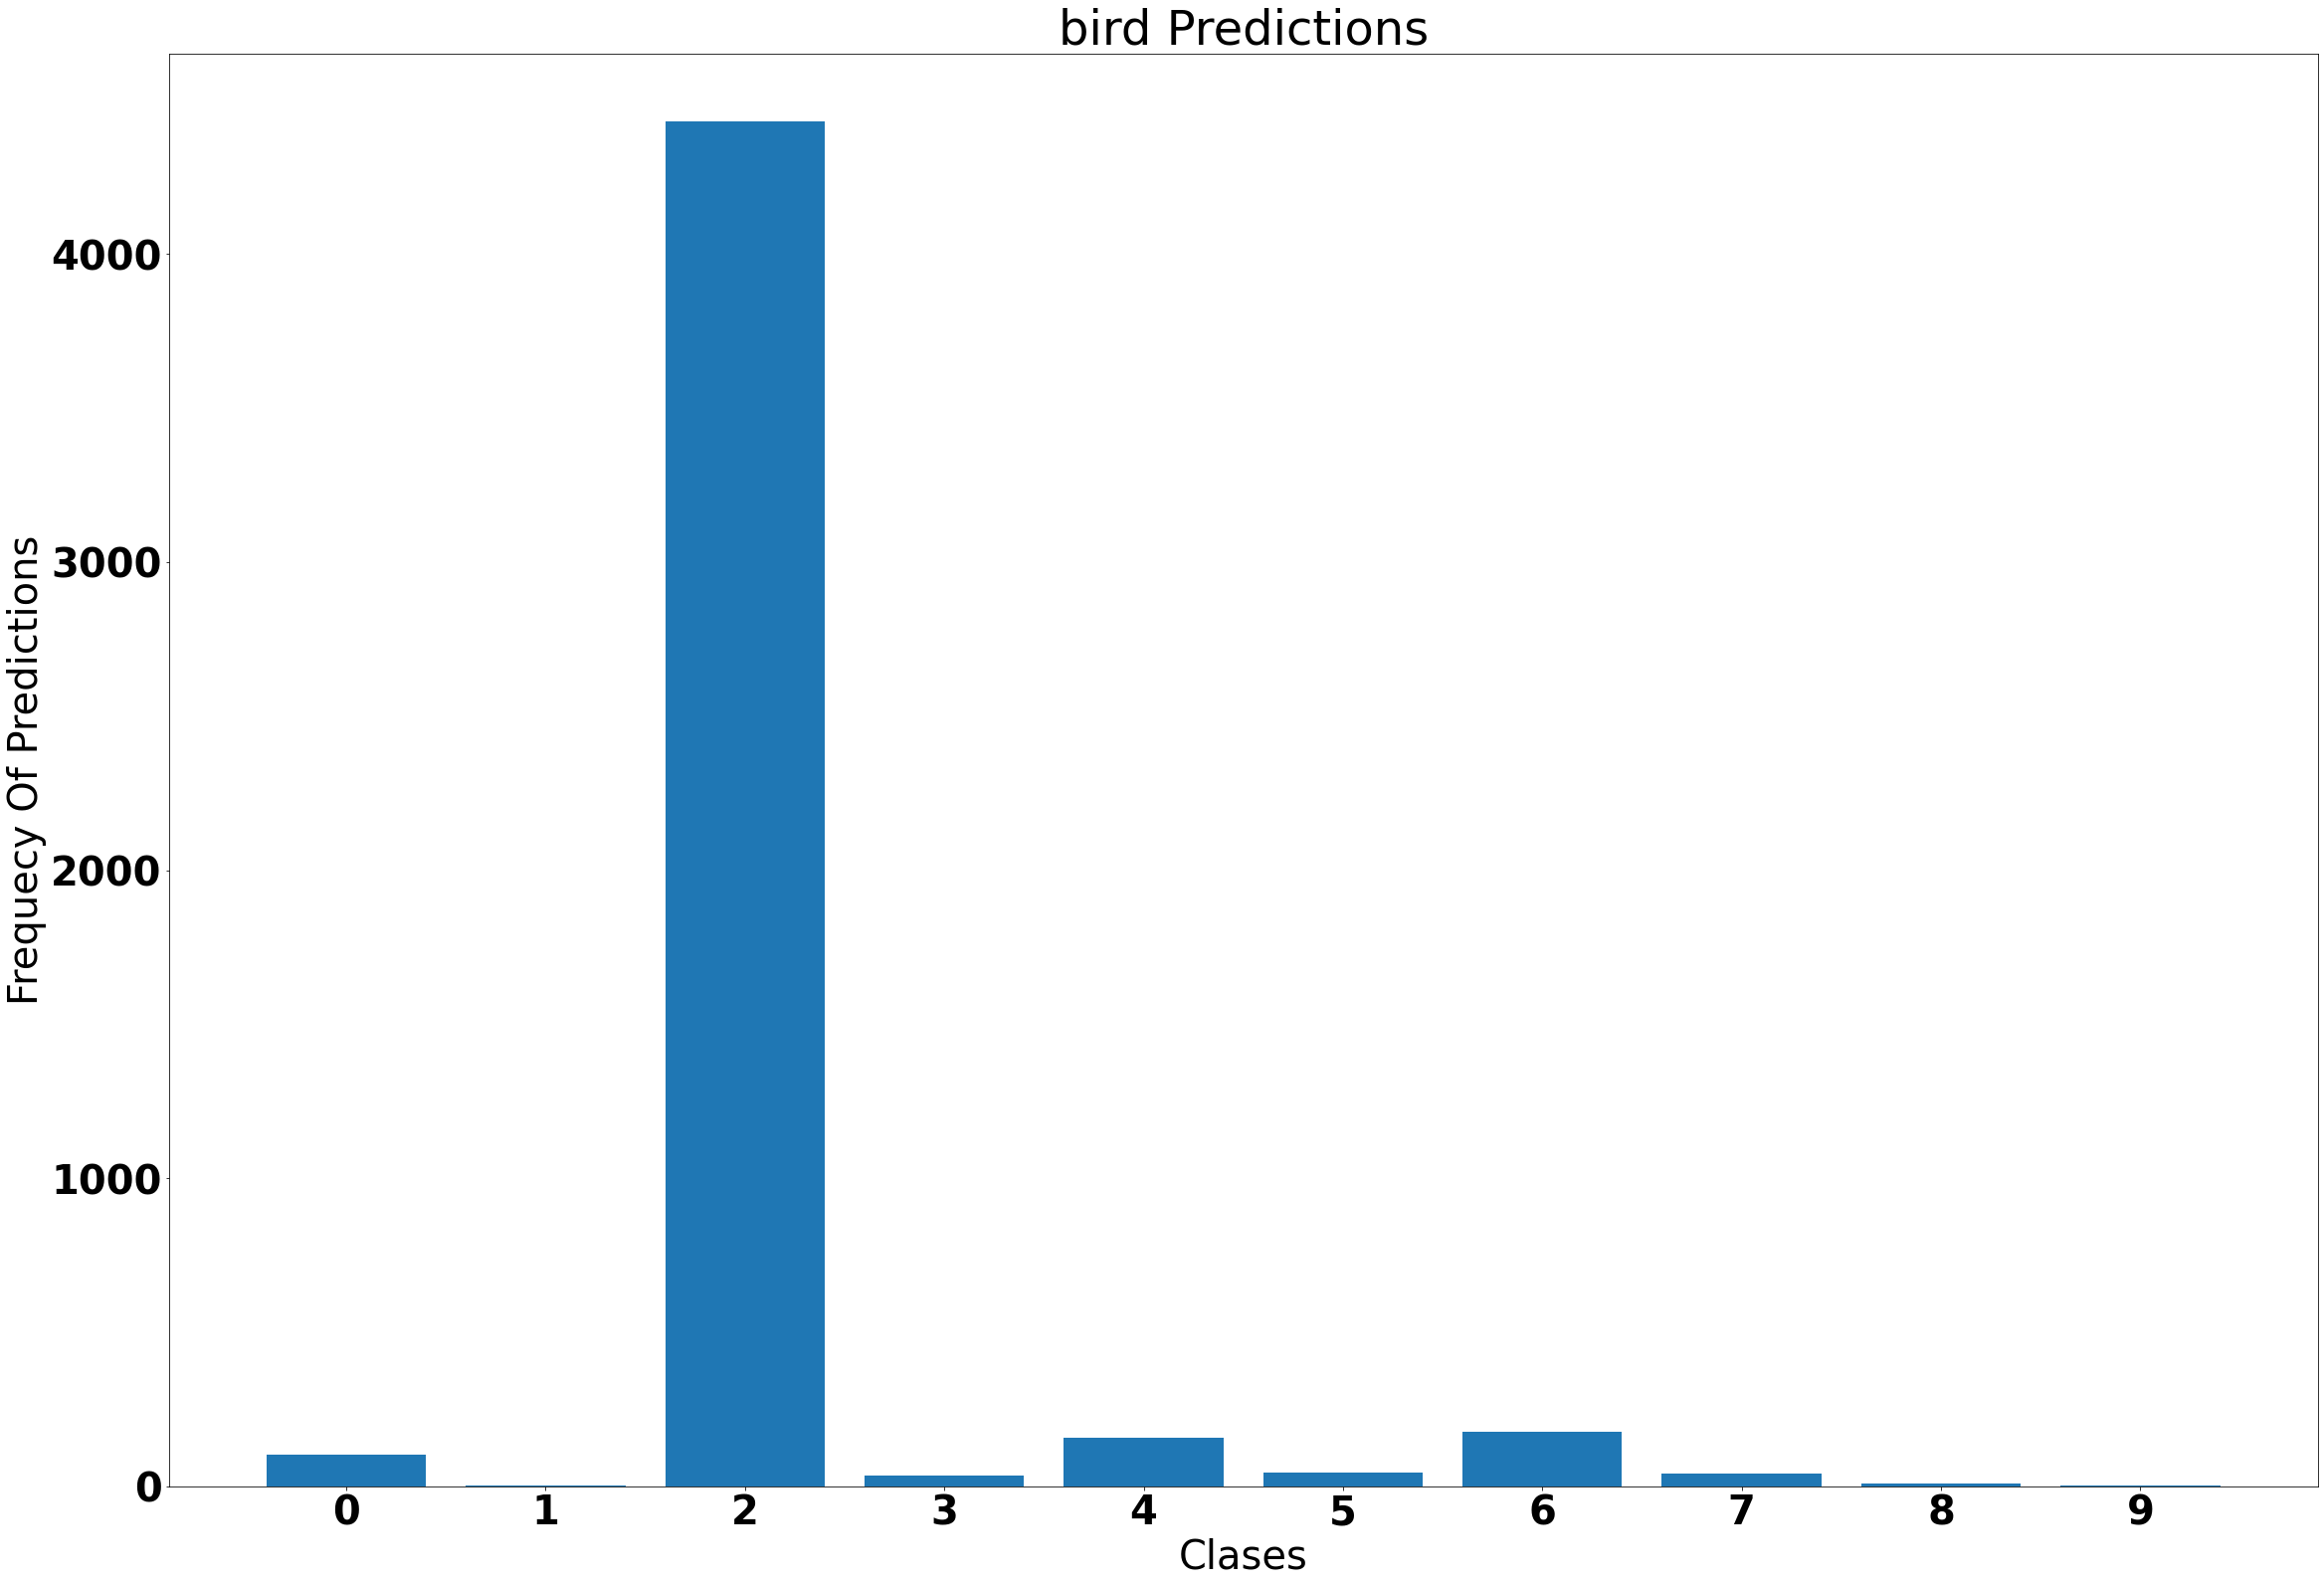

In [10]:
%matplotlib inline
plot_class_predictions(2)

Class #4
5000/5000 [==============================] - 3s 537us/sample


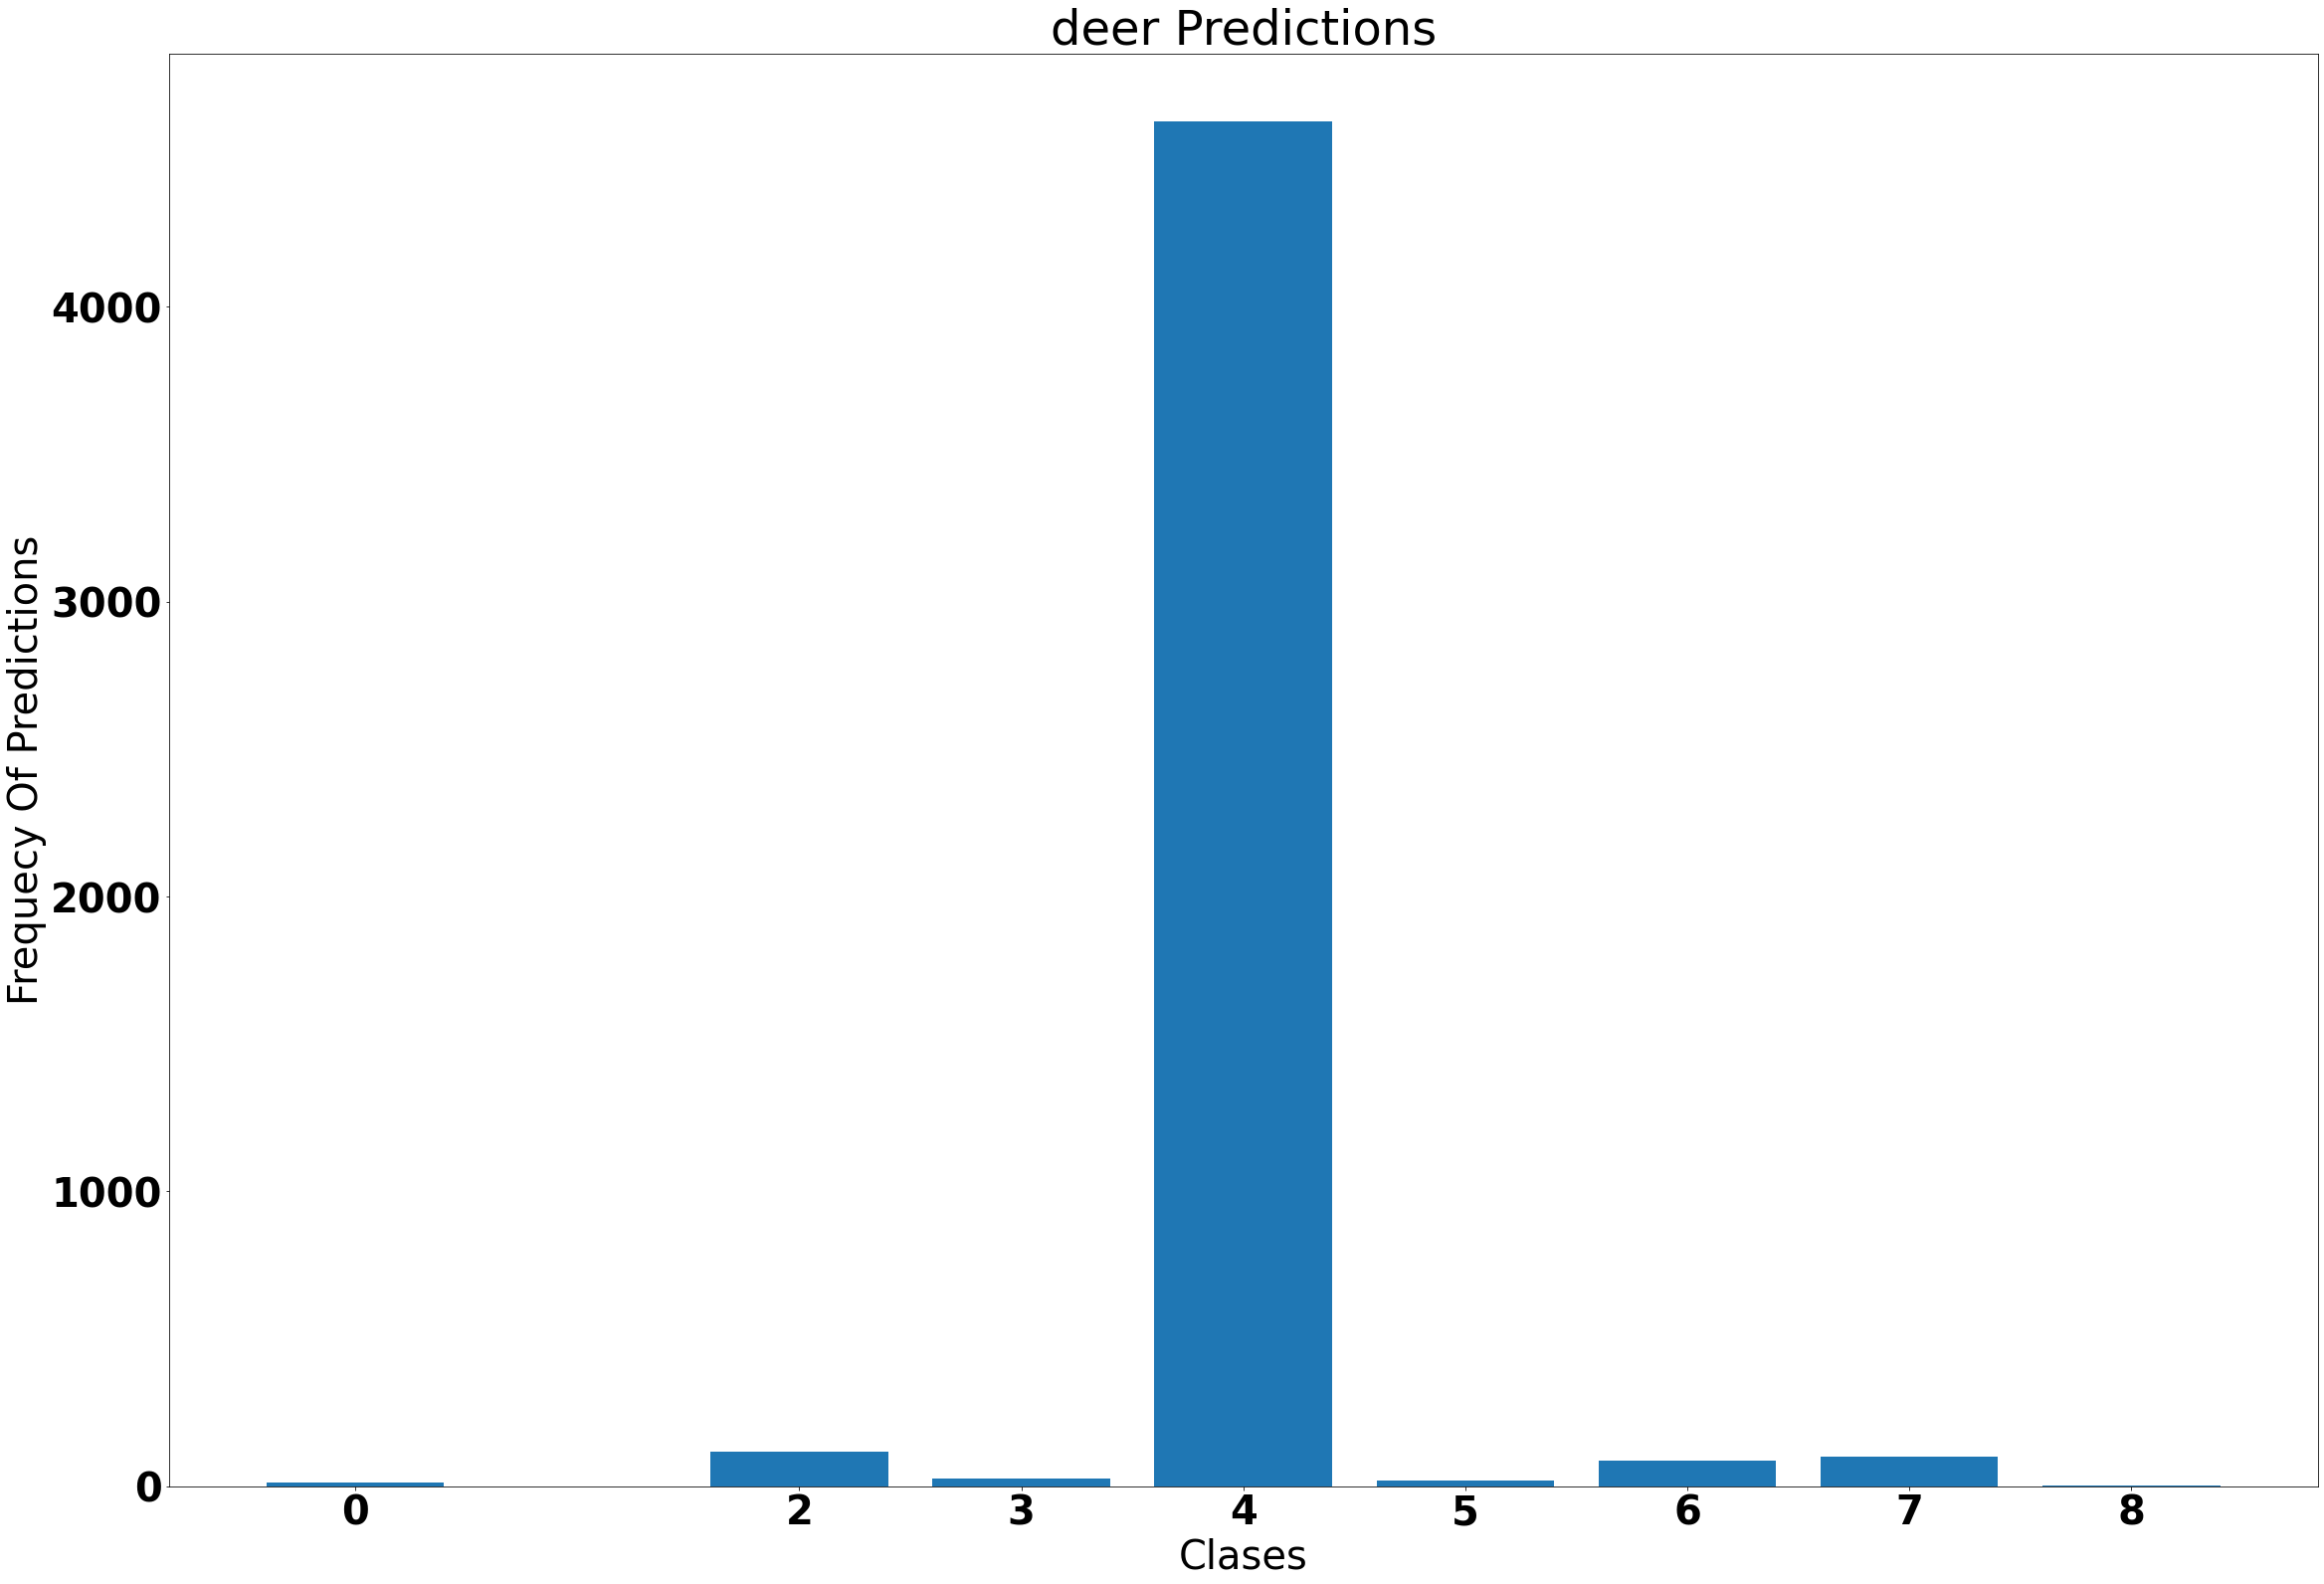

In [11]:
%matplotlib inline
plot_class_predictions(4)

Class #5
5000/5000 [==============================] - 3s 527us/sample


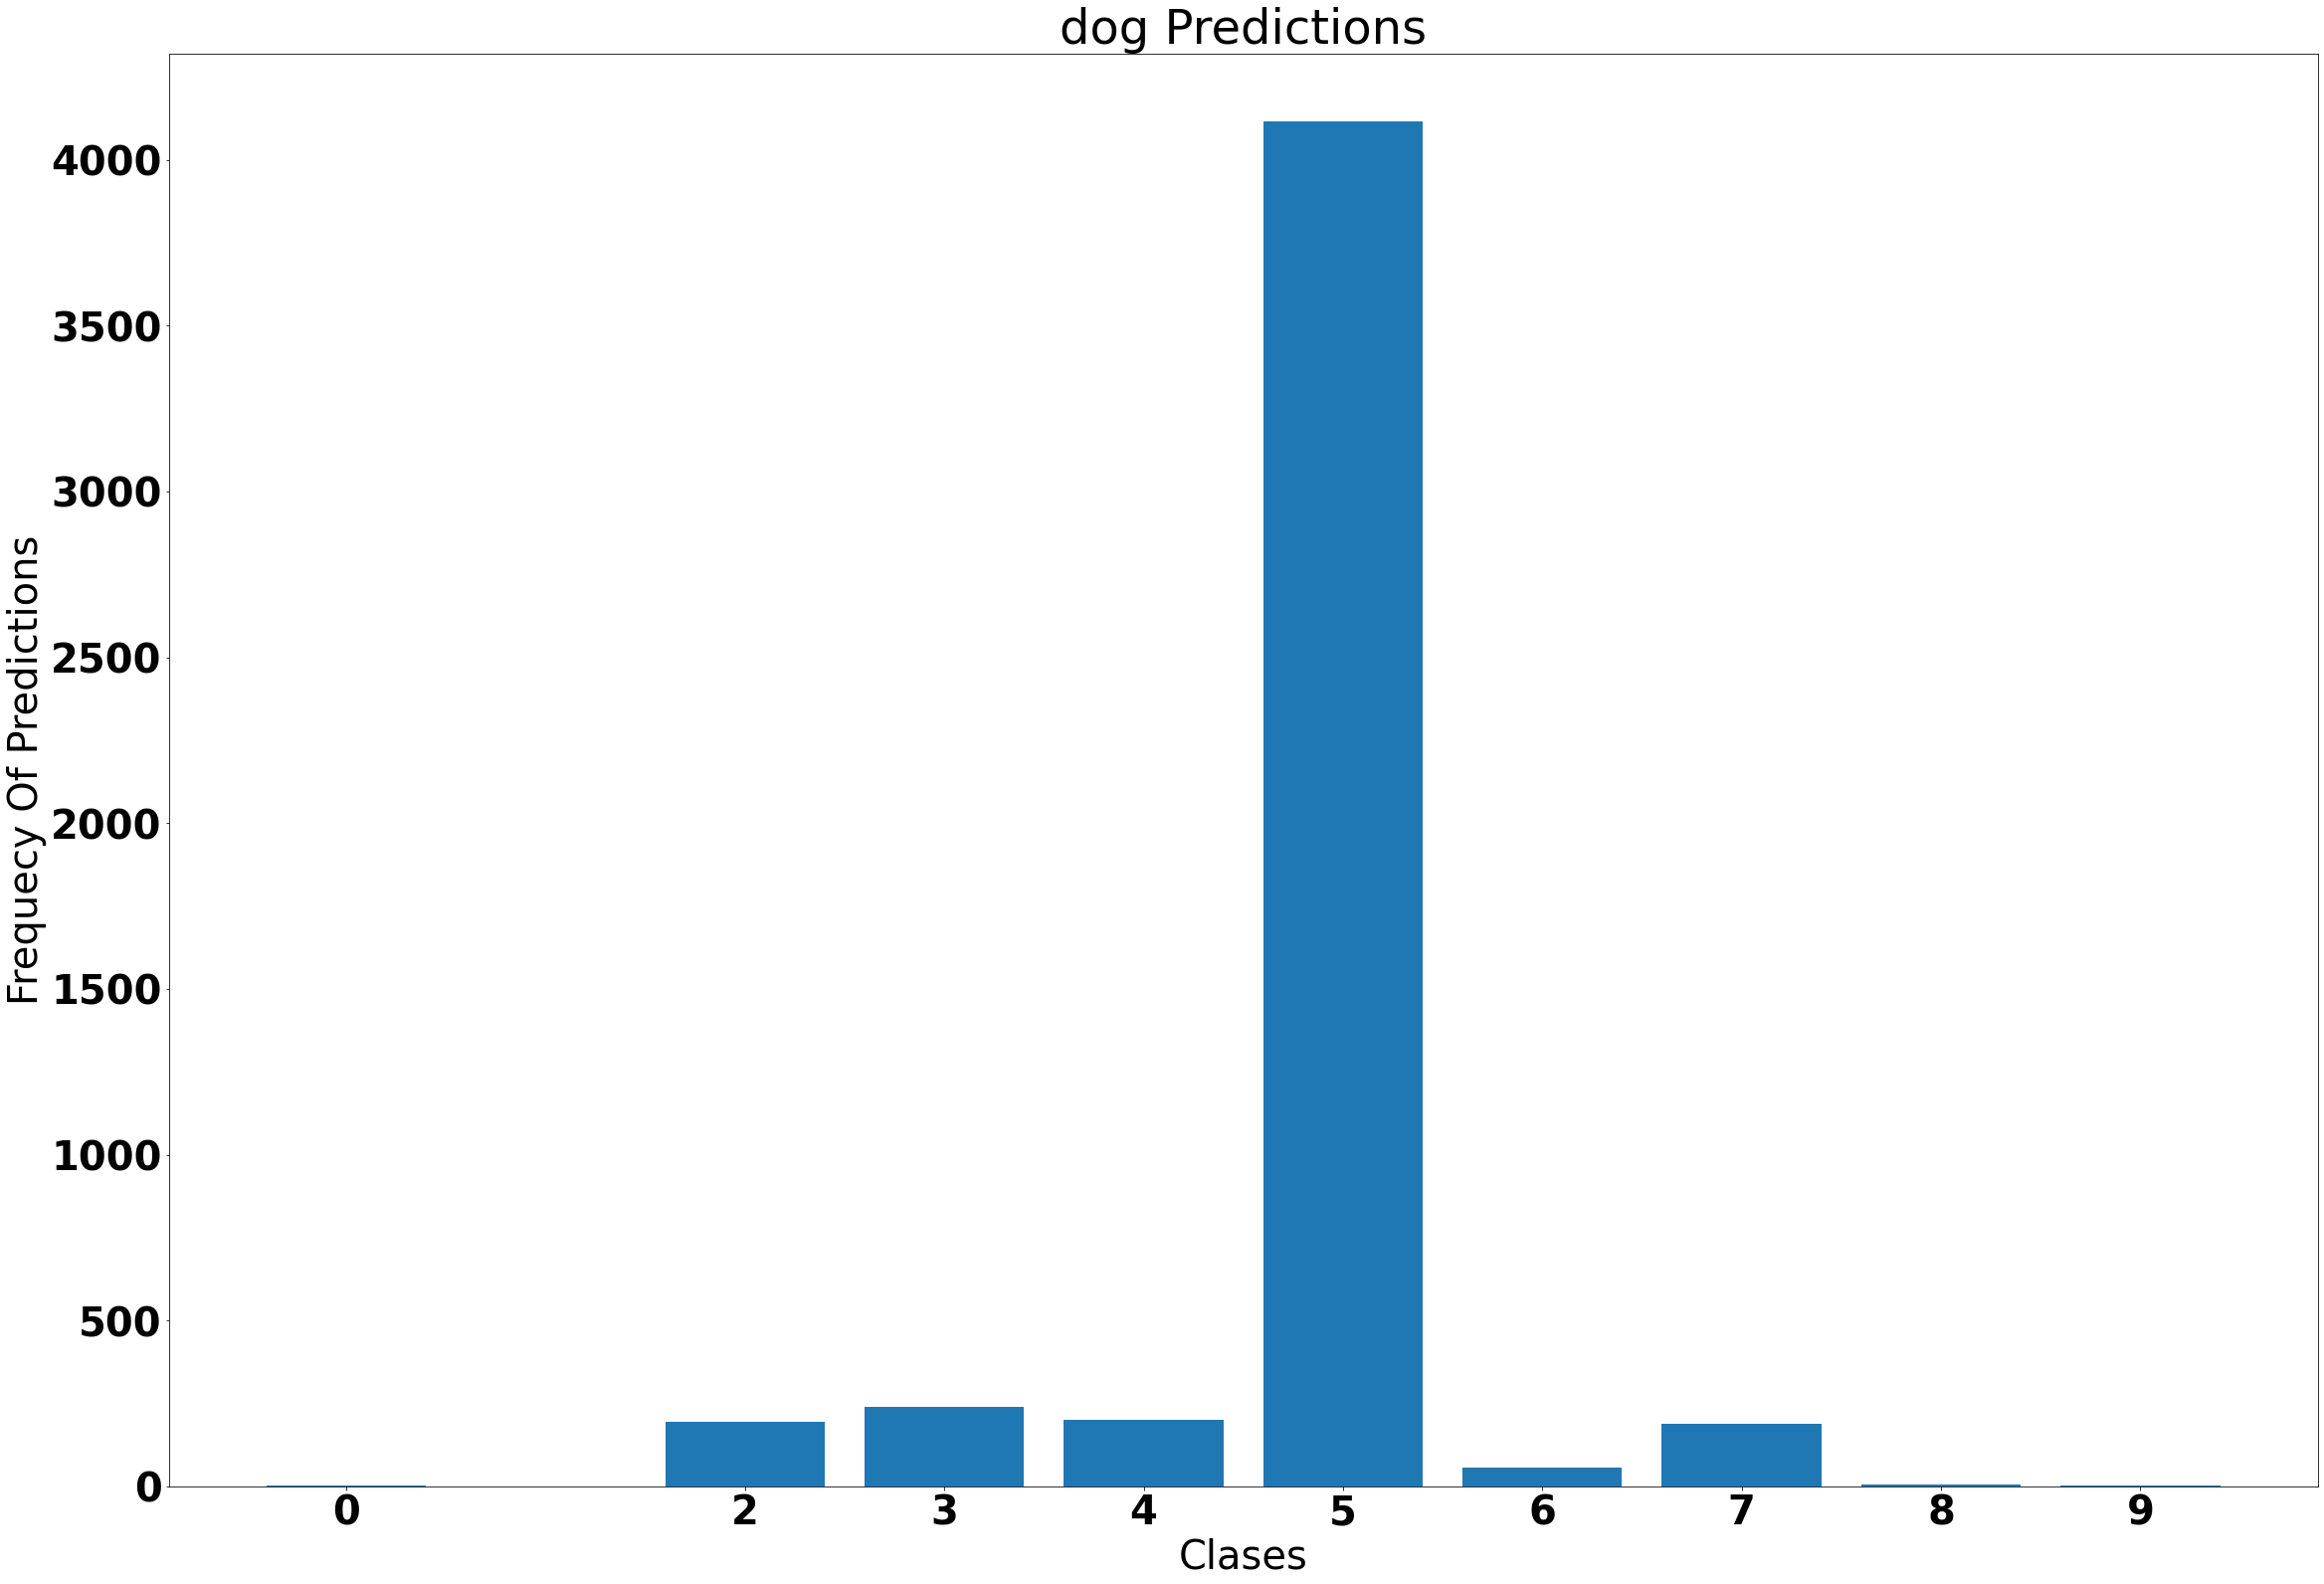

In [12]:
%matplotlib inline
plot_class_predictions(5)

Class #6
5000/5000 [==============================] - 3s 546us/sample


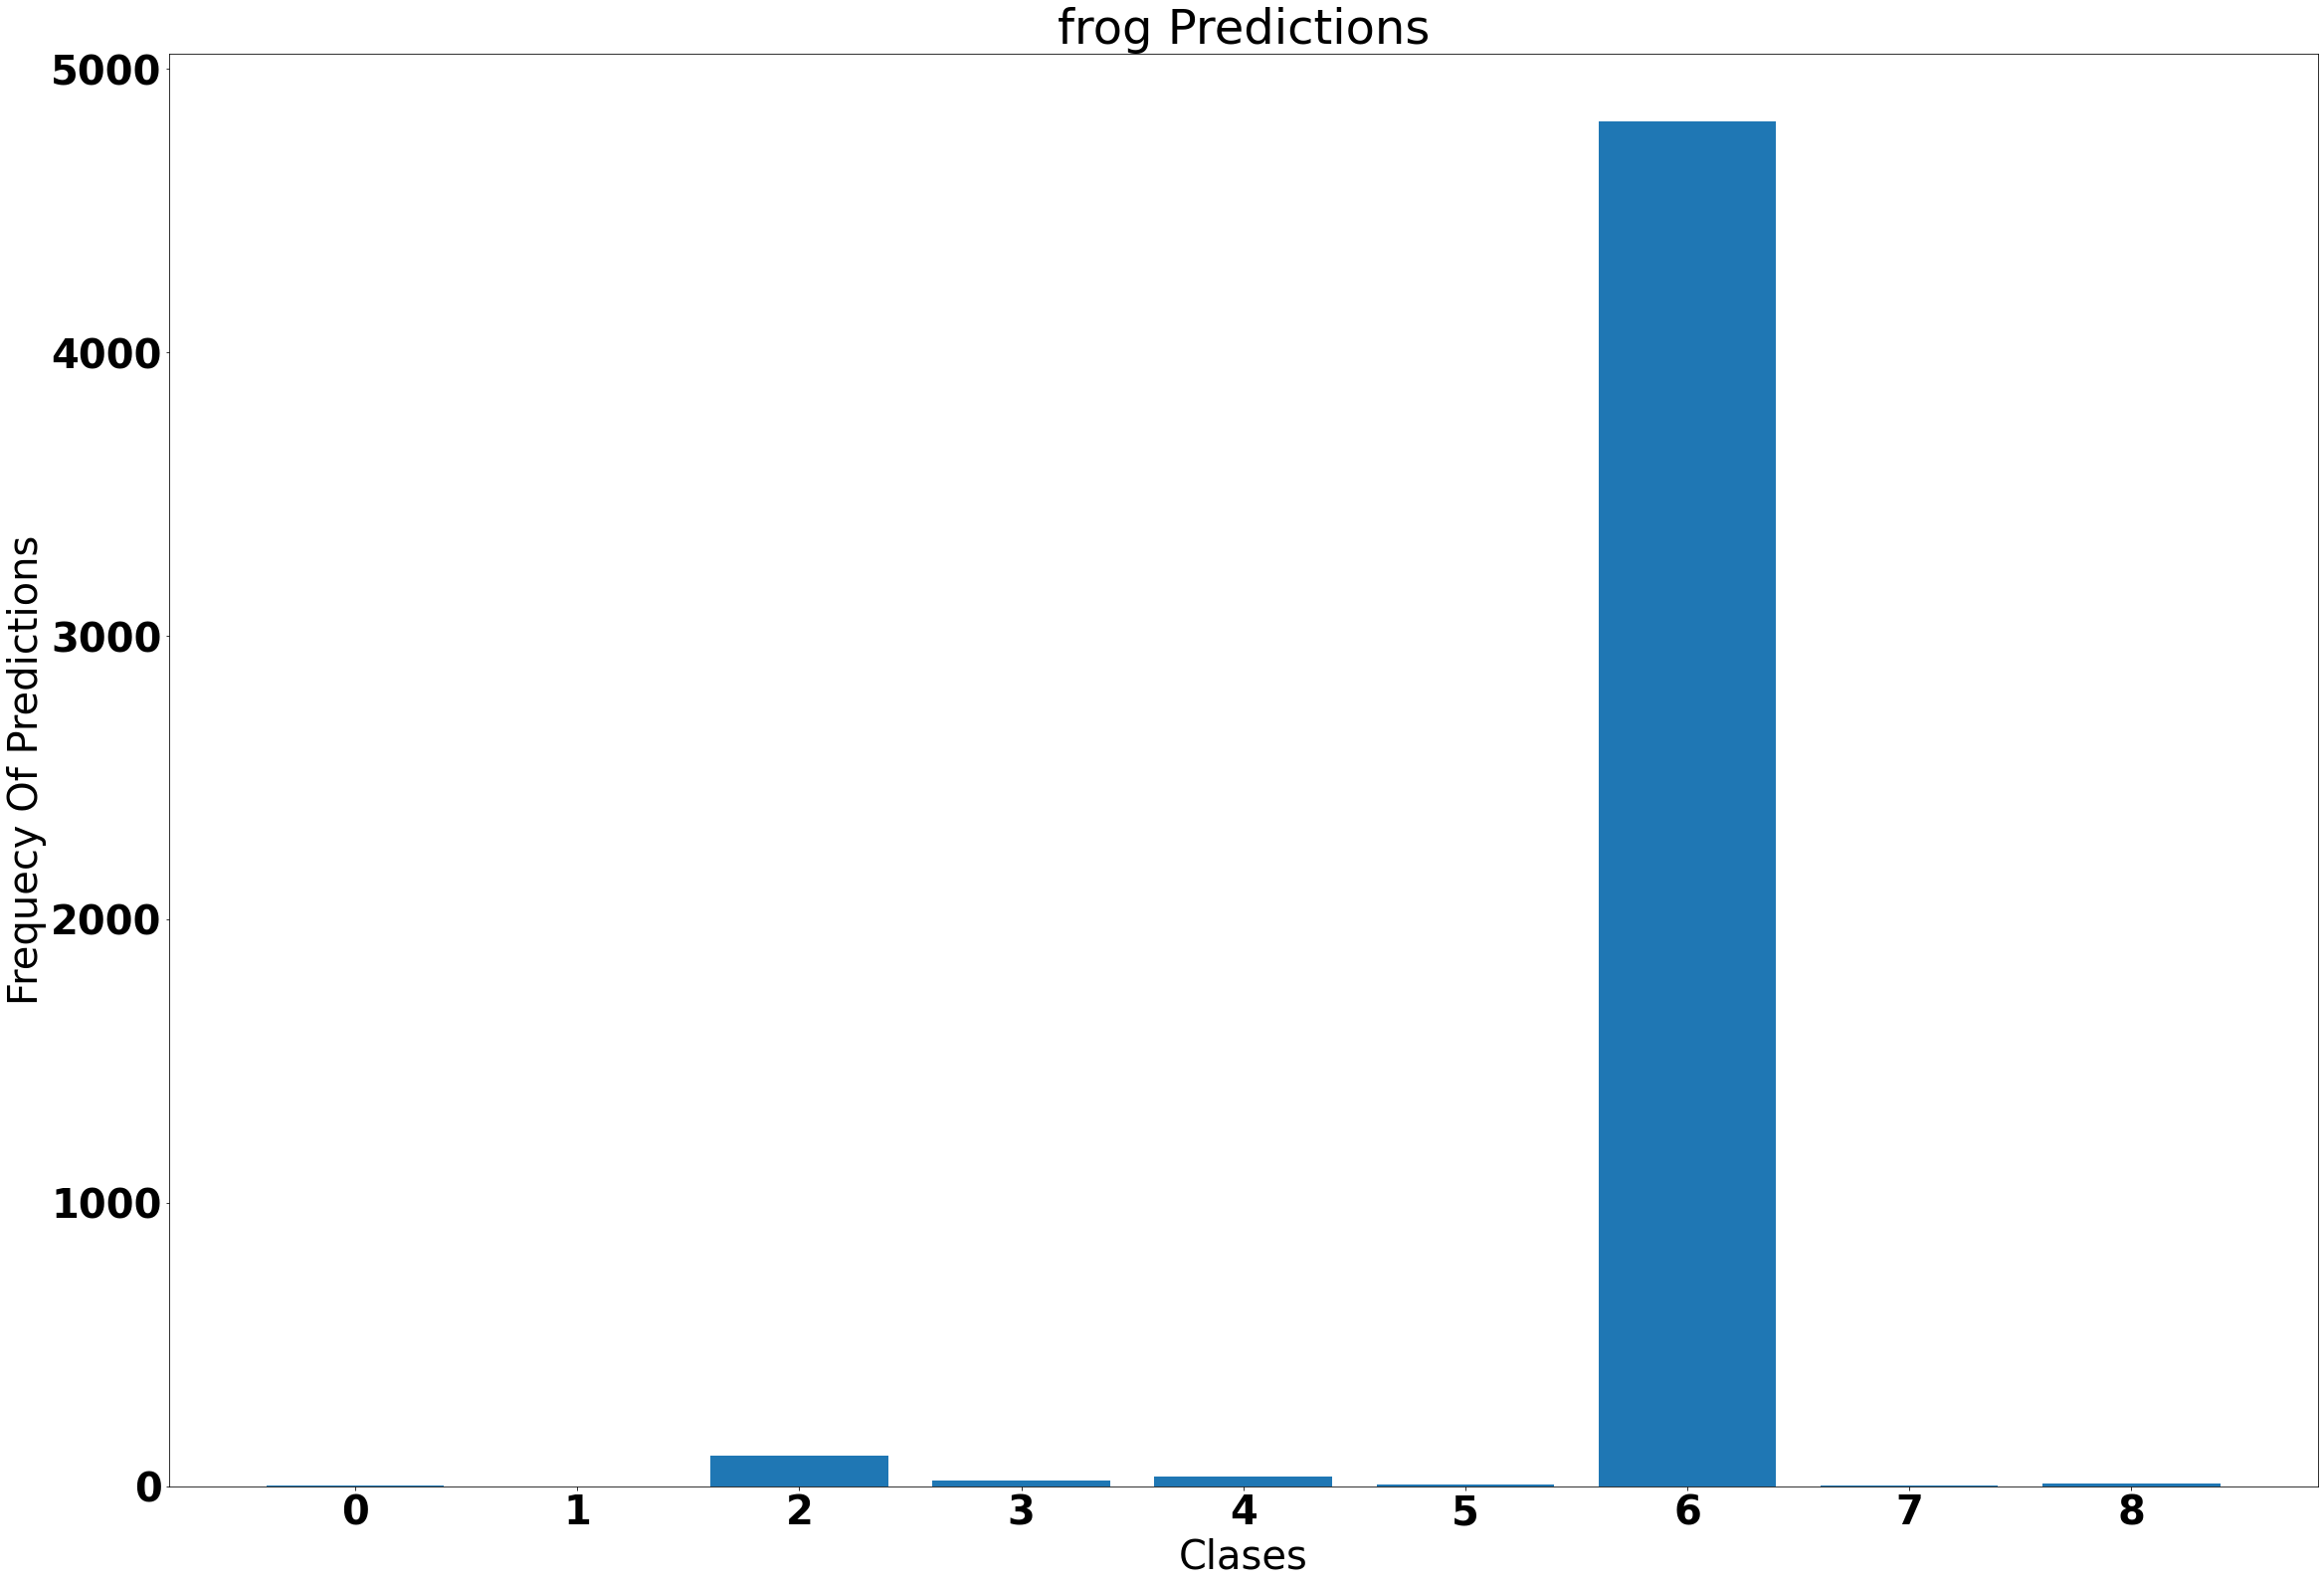

In [13]:
%matplotlib inline
plot_class_predictions(6)

Class #7
5000/5000 [==============================] - 3s 535us/sample


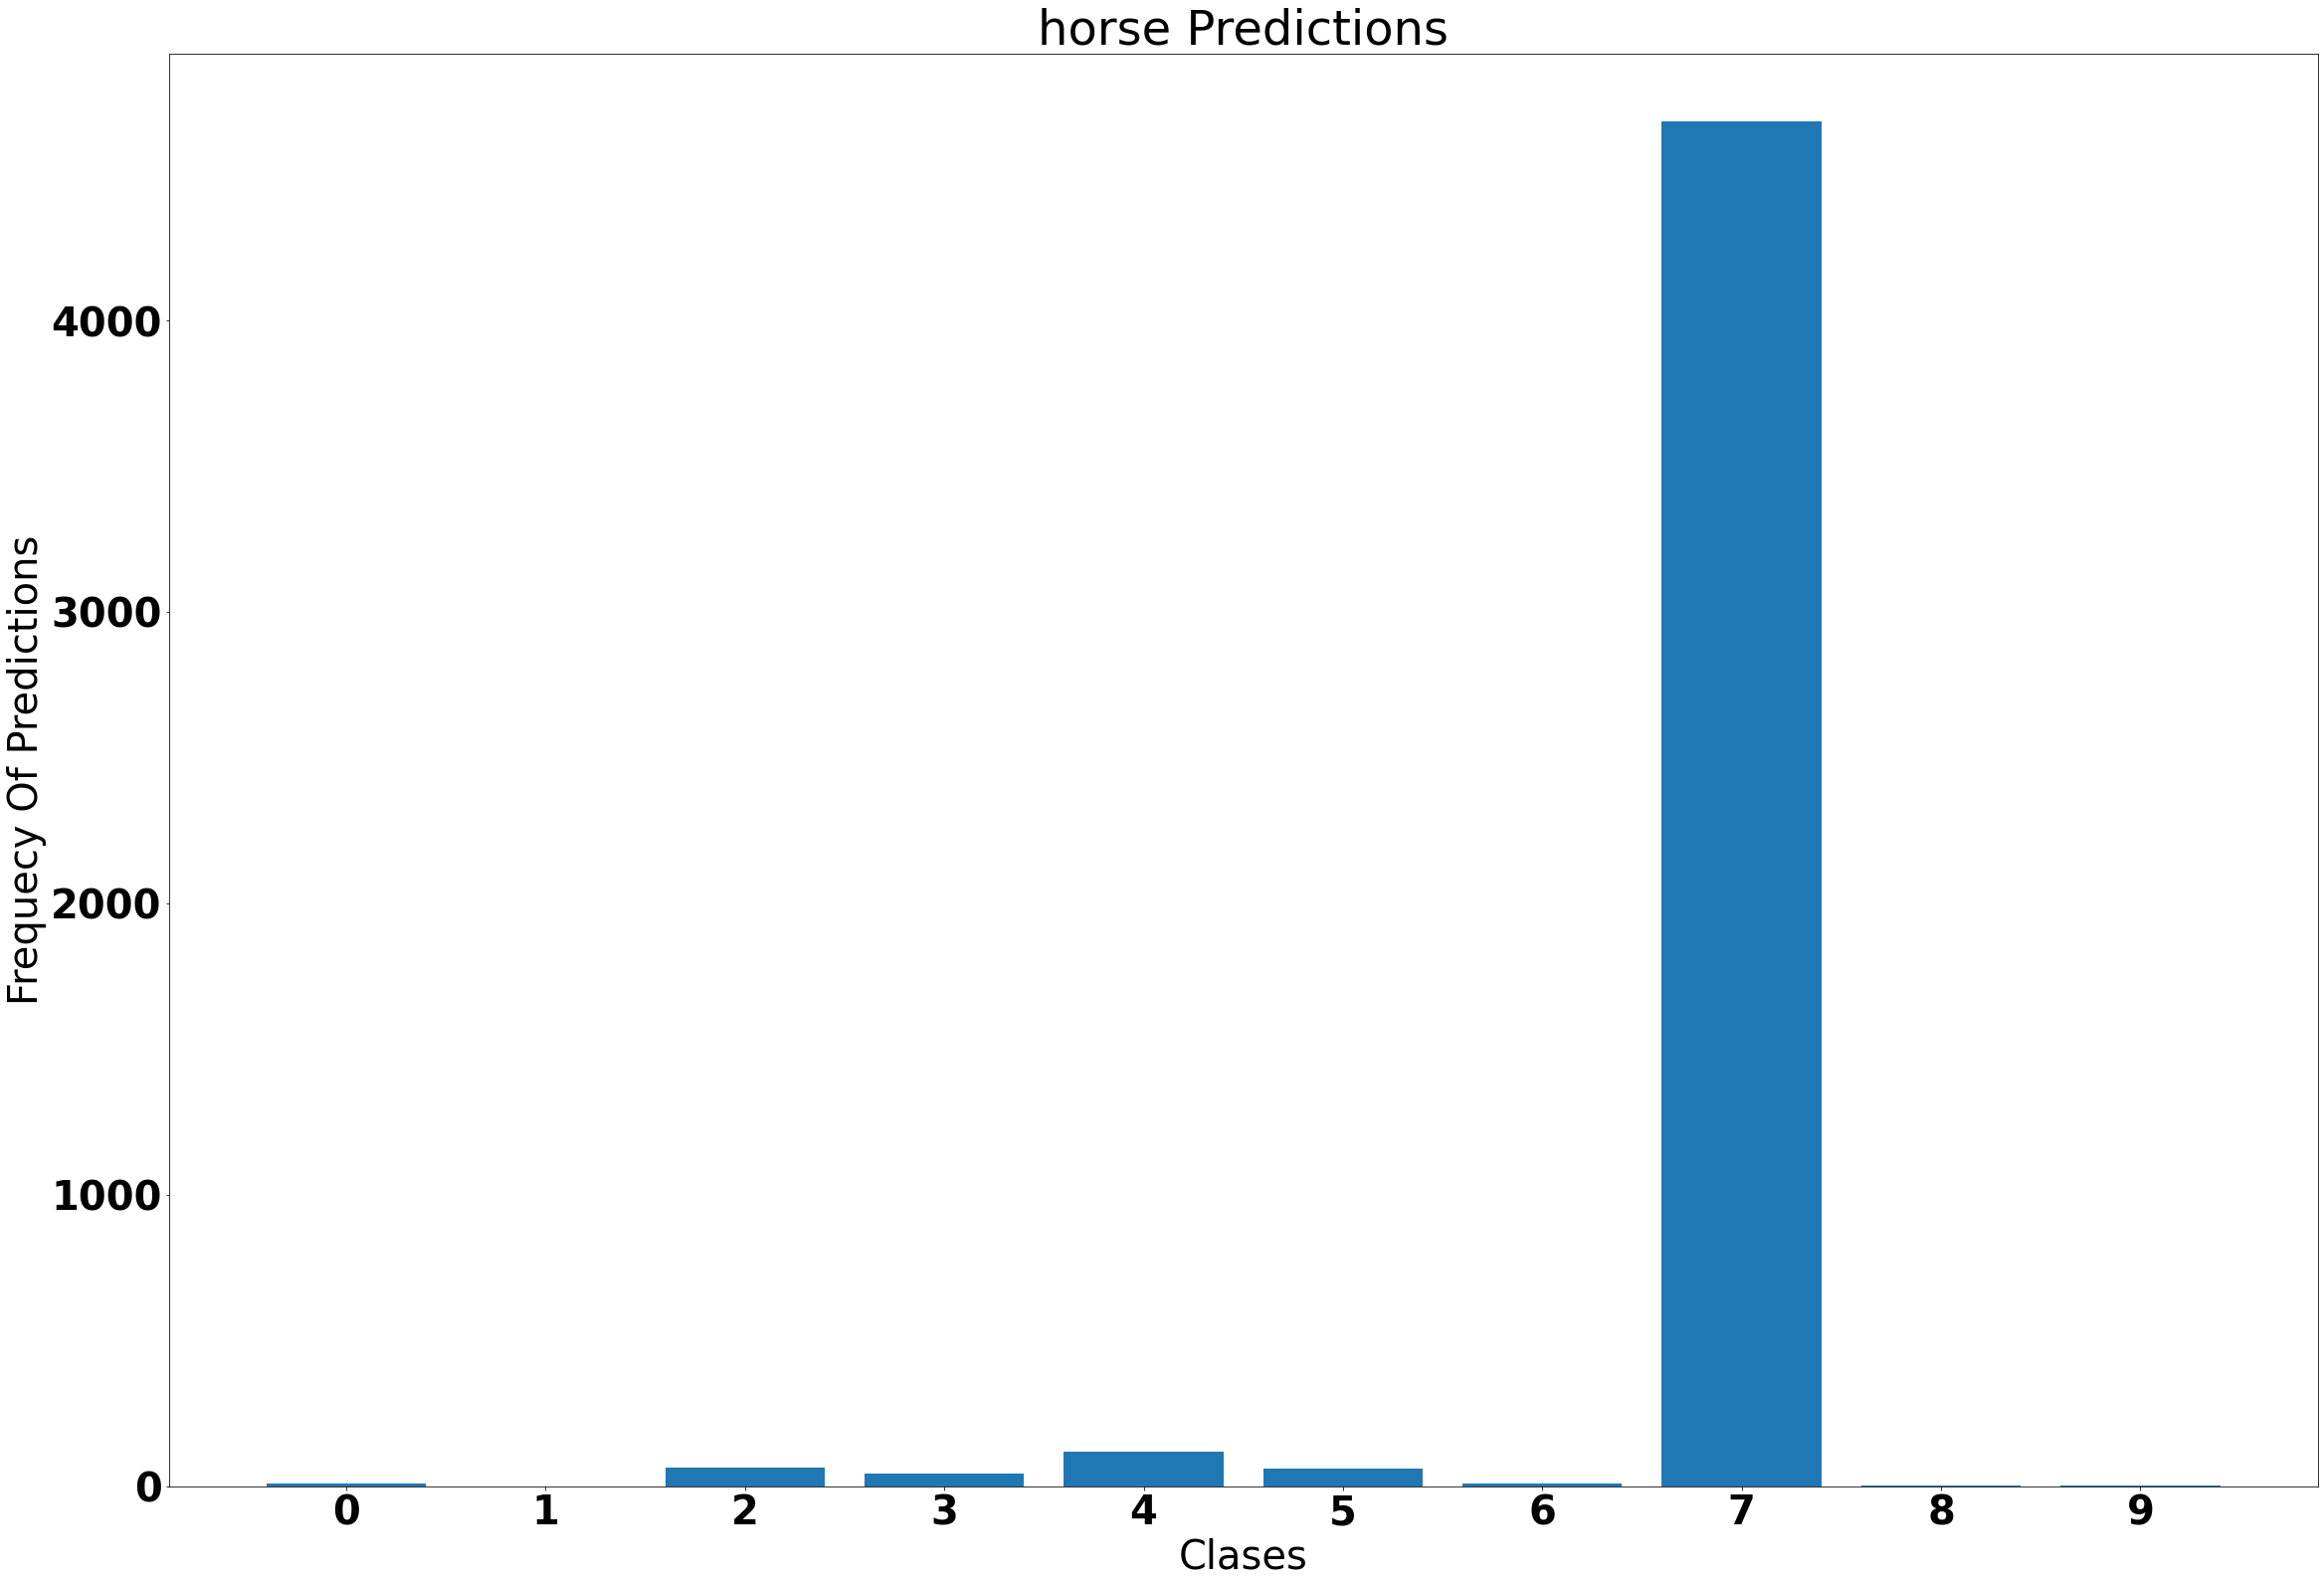

In [14]:
%matplotlib inline
plot_class_predictions(7)

Class #8
5000/5000 [==============================] - 3s 537us/sample


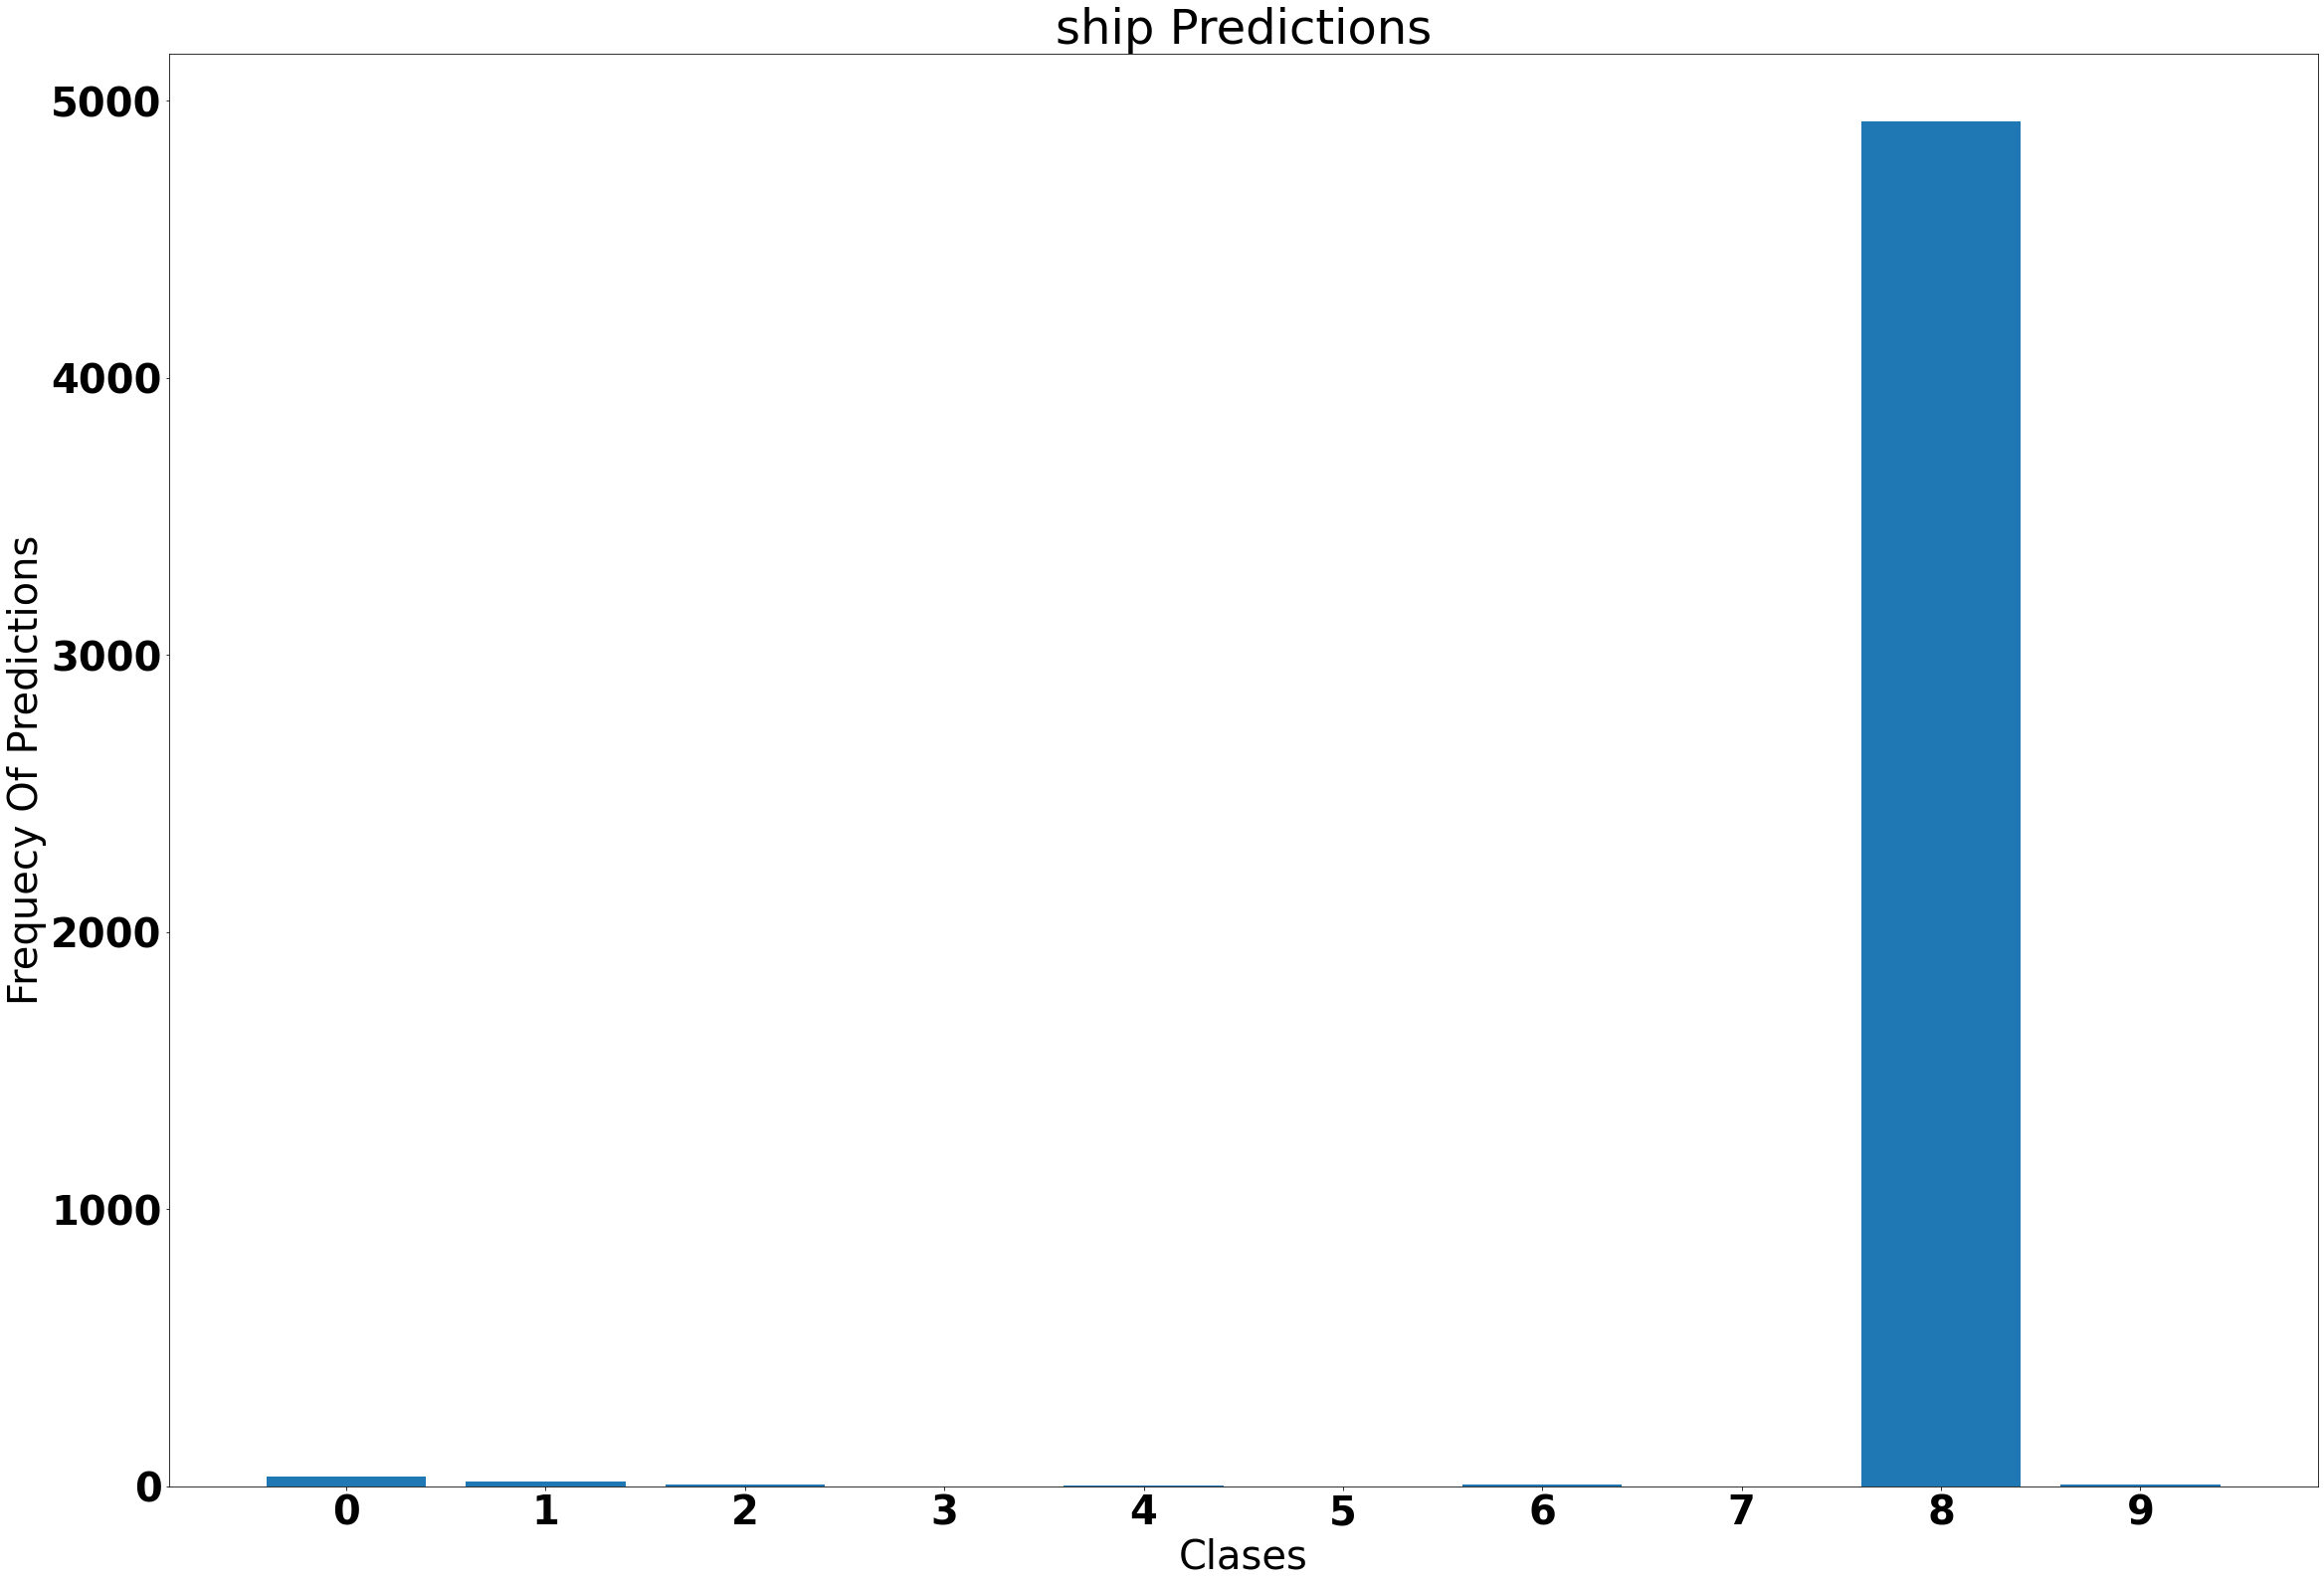

In [15]:
%matplotlib inline
plot_class_predictions(8)

Class #9
5000/5000 [==============================] - 3s 533us/sample


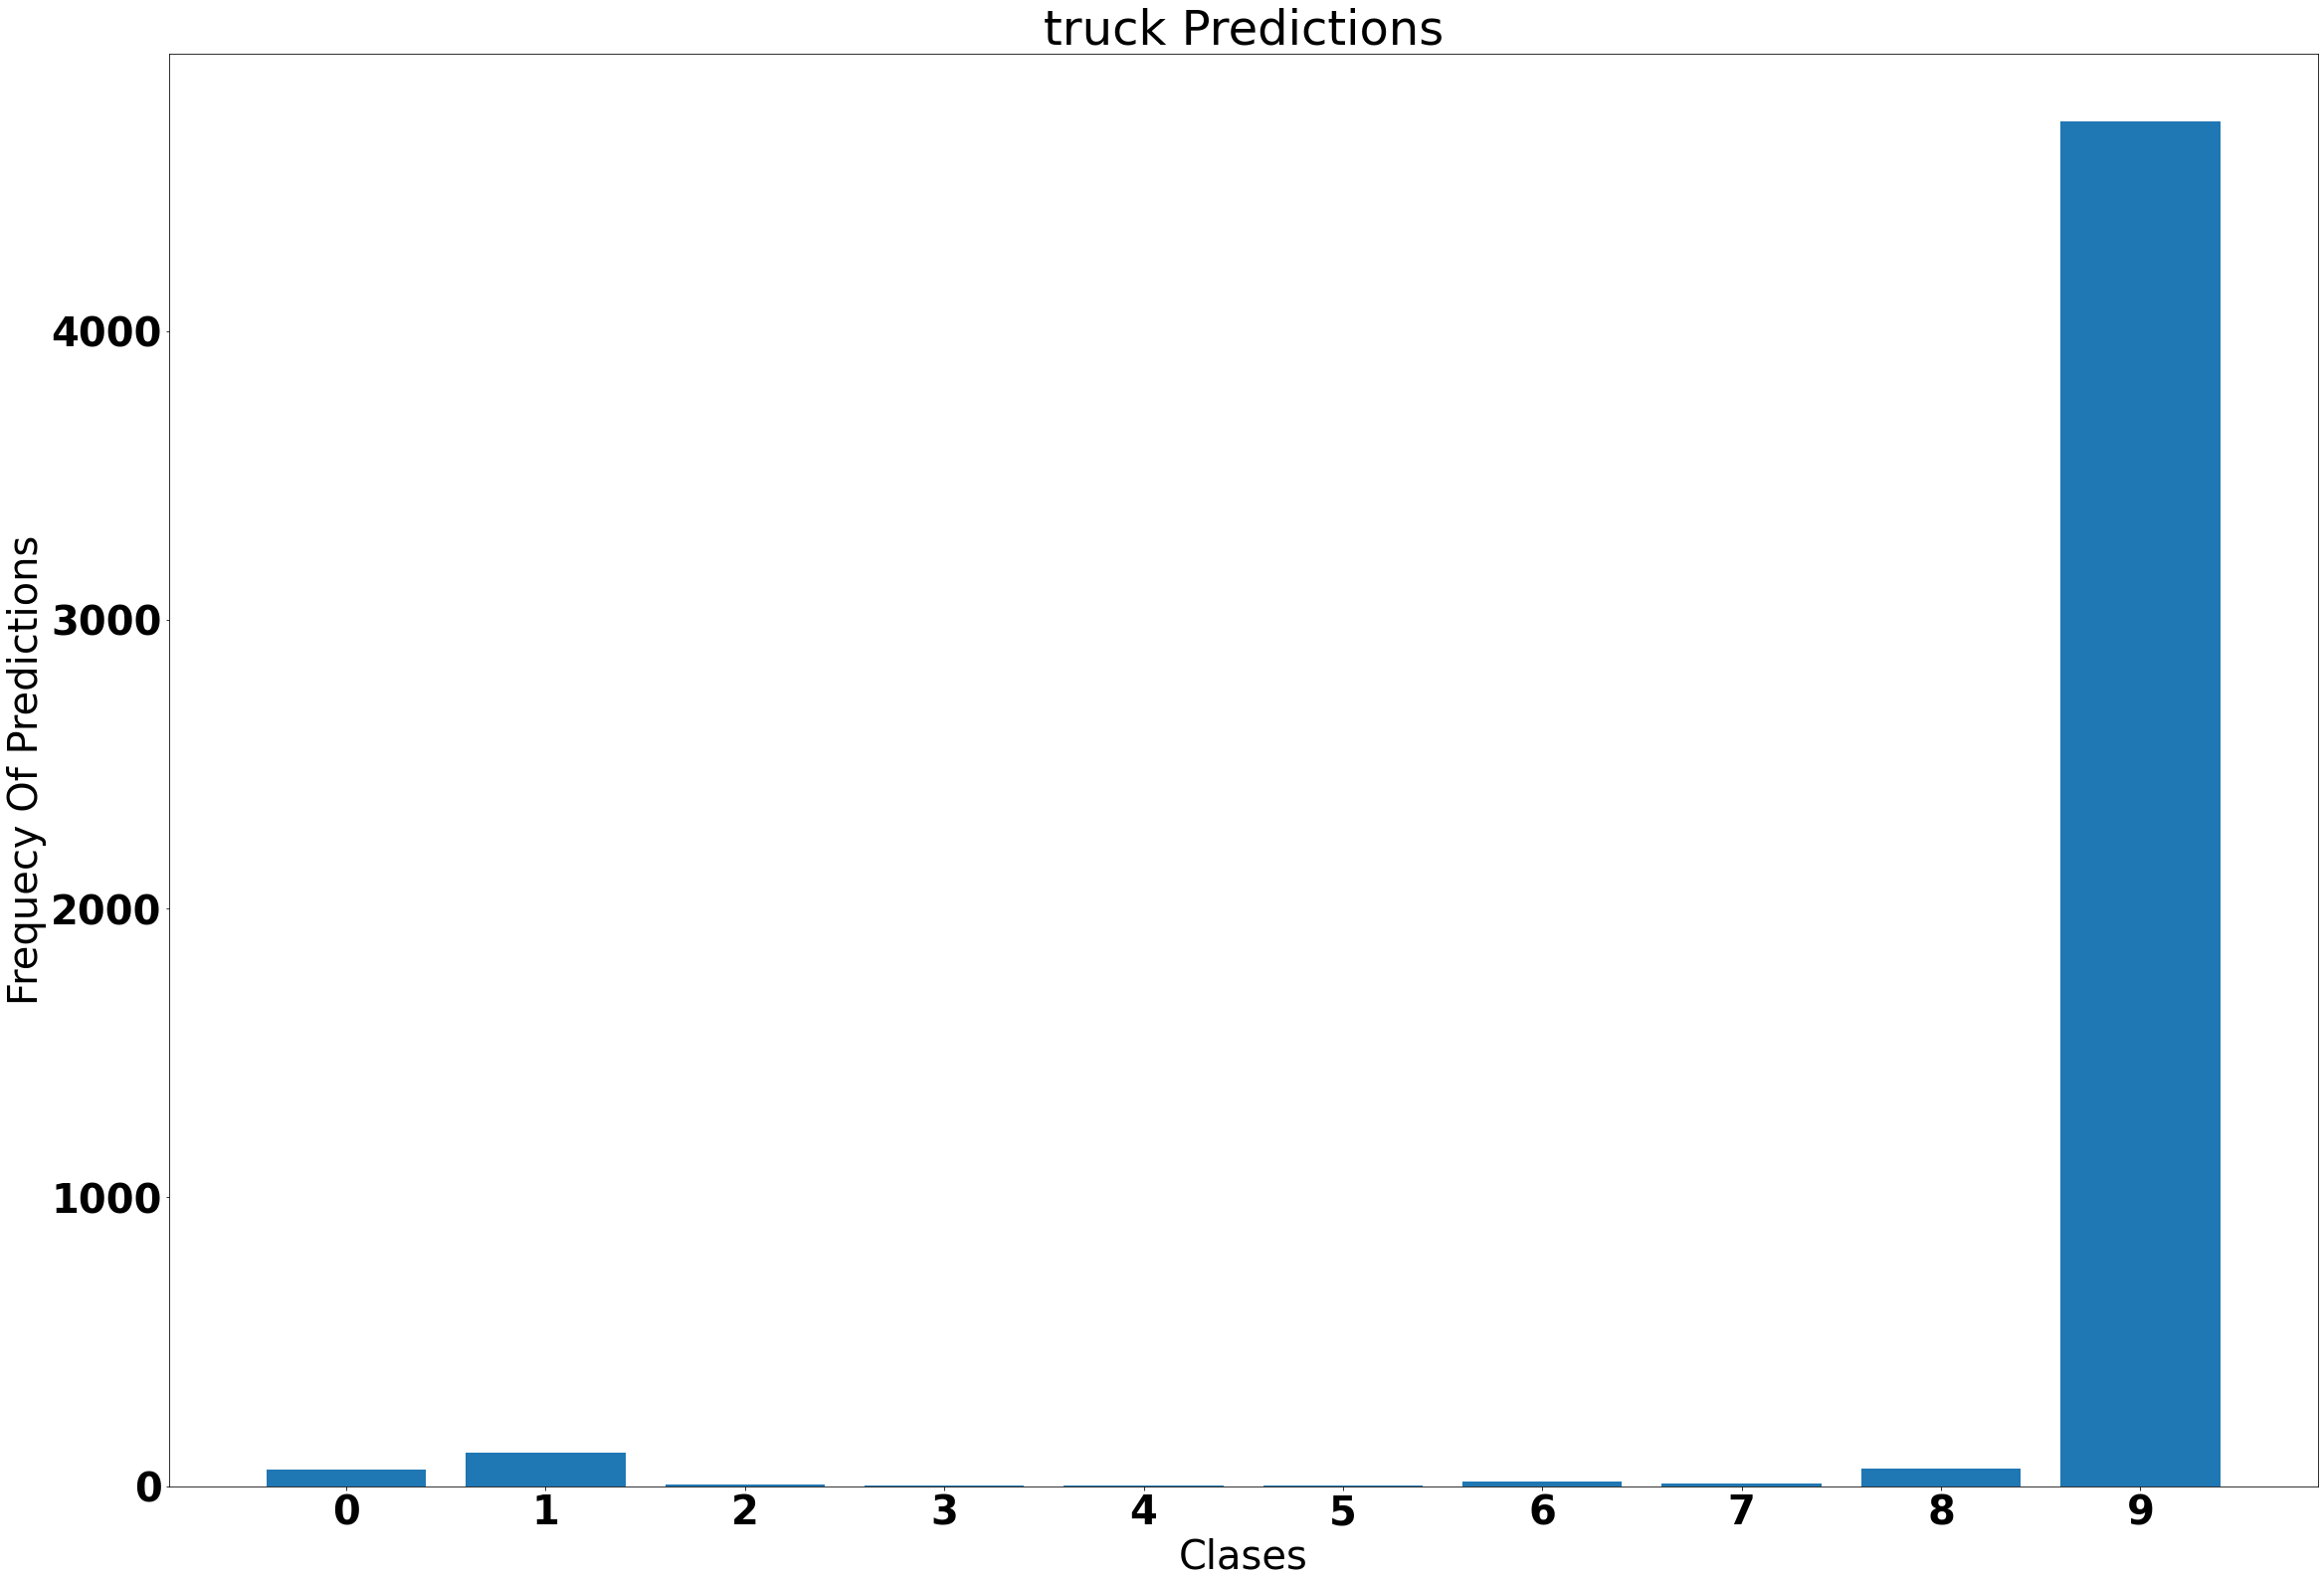

In [16]:
%matplotlib inline
plot_class_predictions(9)

In [17]:
%matplotlib inline
import seaborn as sns
import matplotlib
def plot_class_pdf(idx):
    p = model1.predict(trainX[returnClassIndex(trainY,idx)],  verbose = 1)
    font = {'family' : 'sans',
            'weight' : 'bold',
            'size'   : 30}
    matplotlib.rc('font', **font)
    plt.figure( figsize = (40, 30), facecolor = 'gray')
    plt.hist(np.amax(p, axis = 1), color = 'blue', edgecolor = 'black',
             bins = int(180/5))
    # Add labels
    classes =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',
                'truck']
    plt.title('Histogram of Model Confidence of each Prediction for {}'.format(classes[idx]))
    plt.xlabel('Confidence Values')
    plt.ylabel('Predictions')
    #plt.set_facecolor('gray')
    plt.show()

5000/5000 [==============================] - 3s 530us/sample


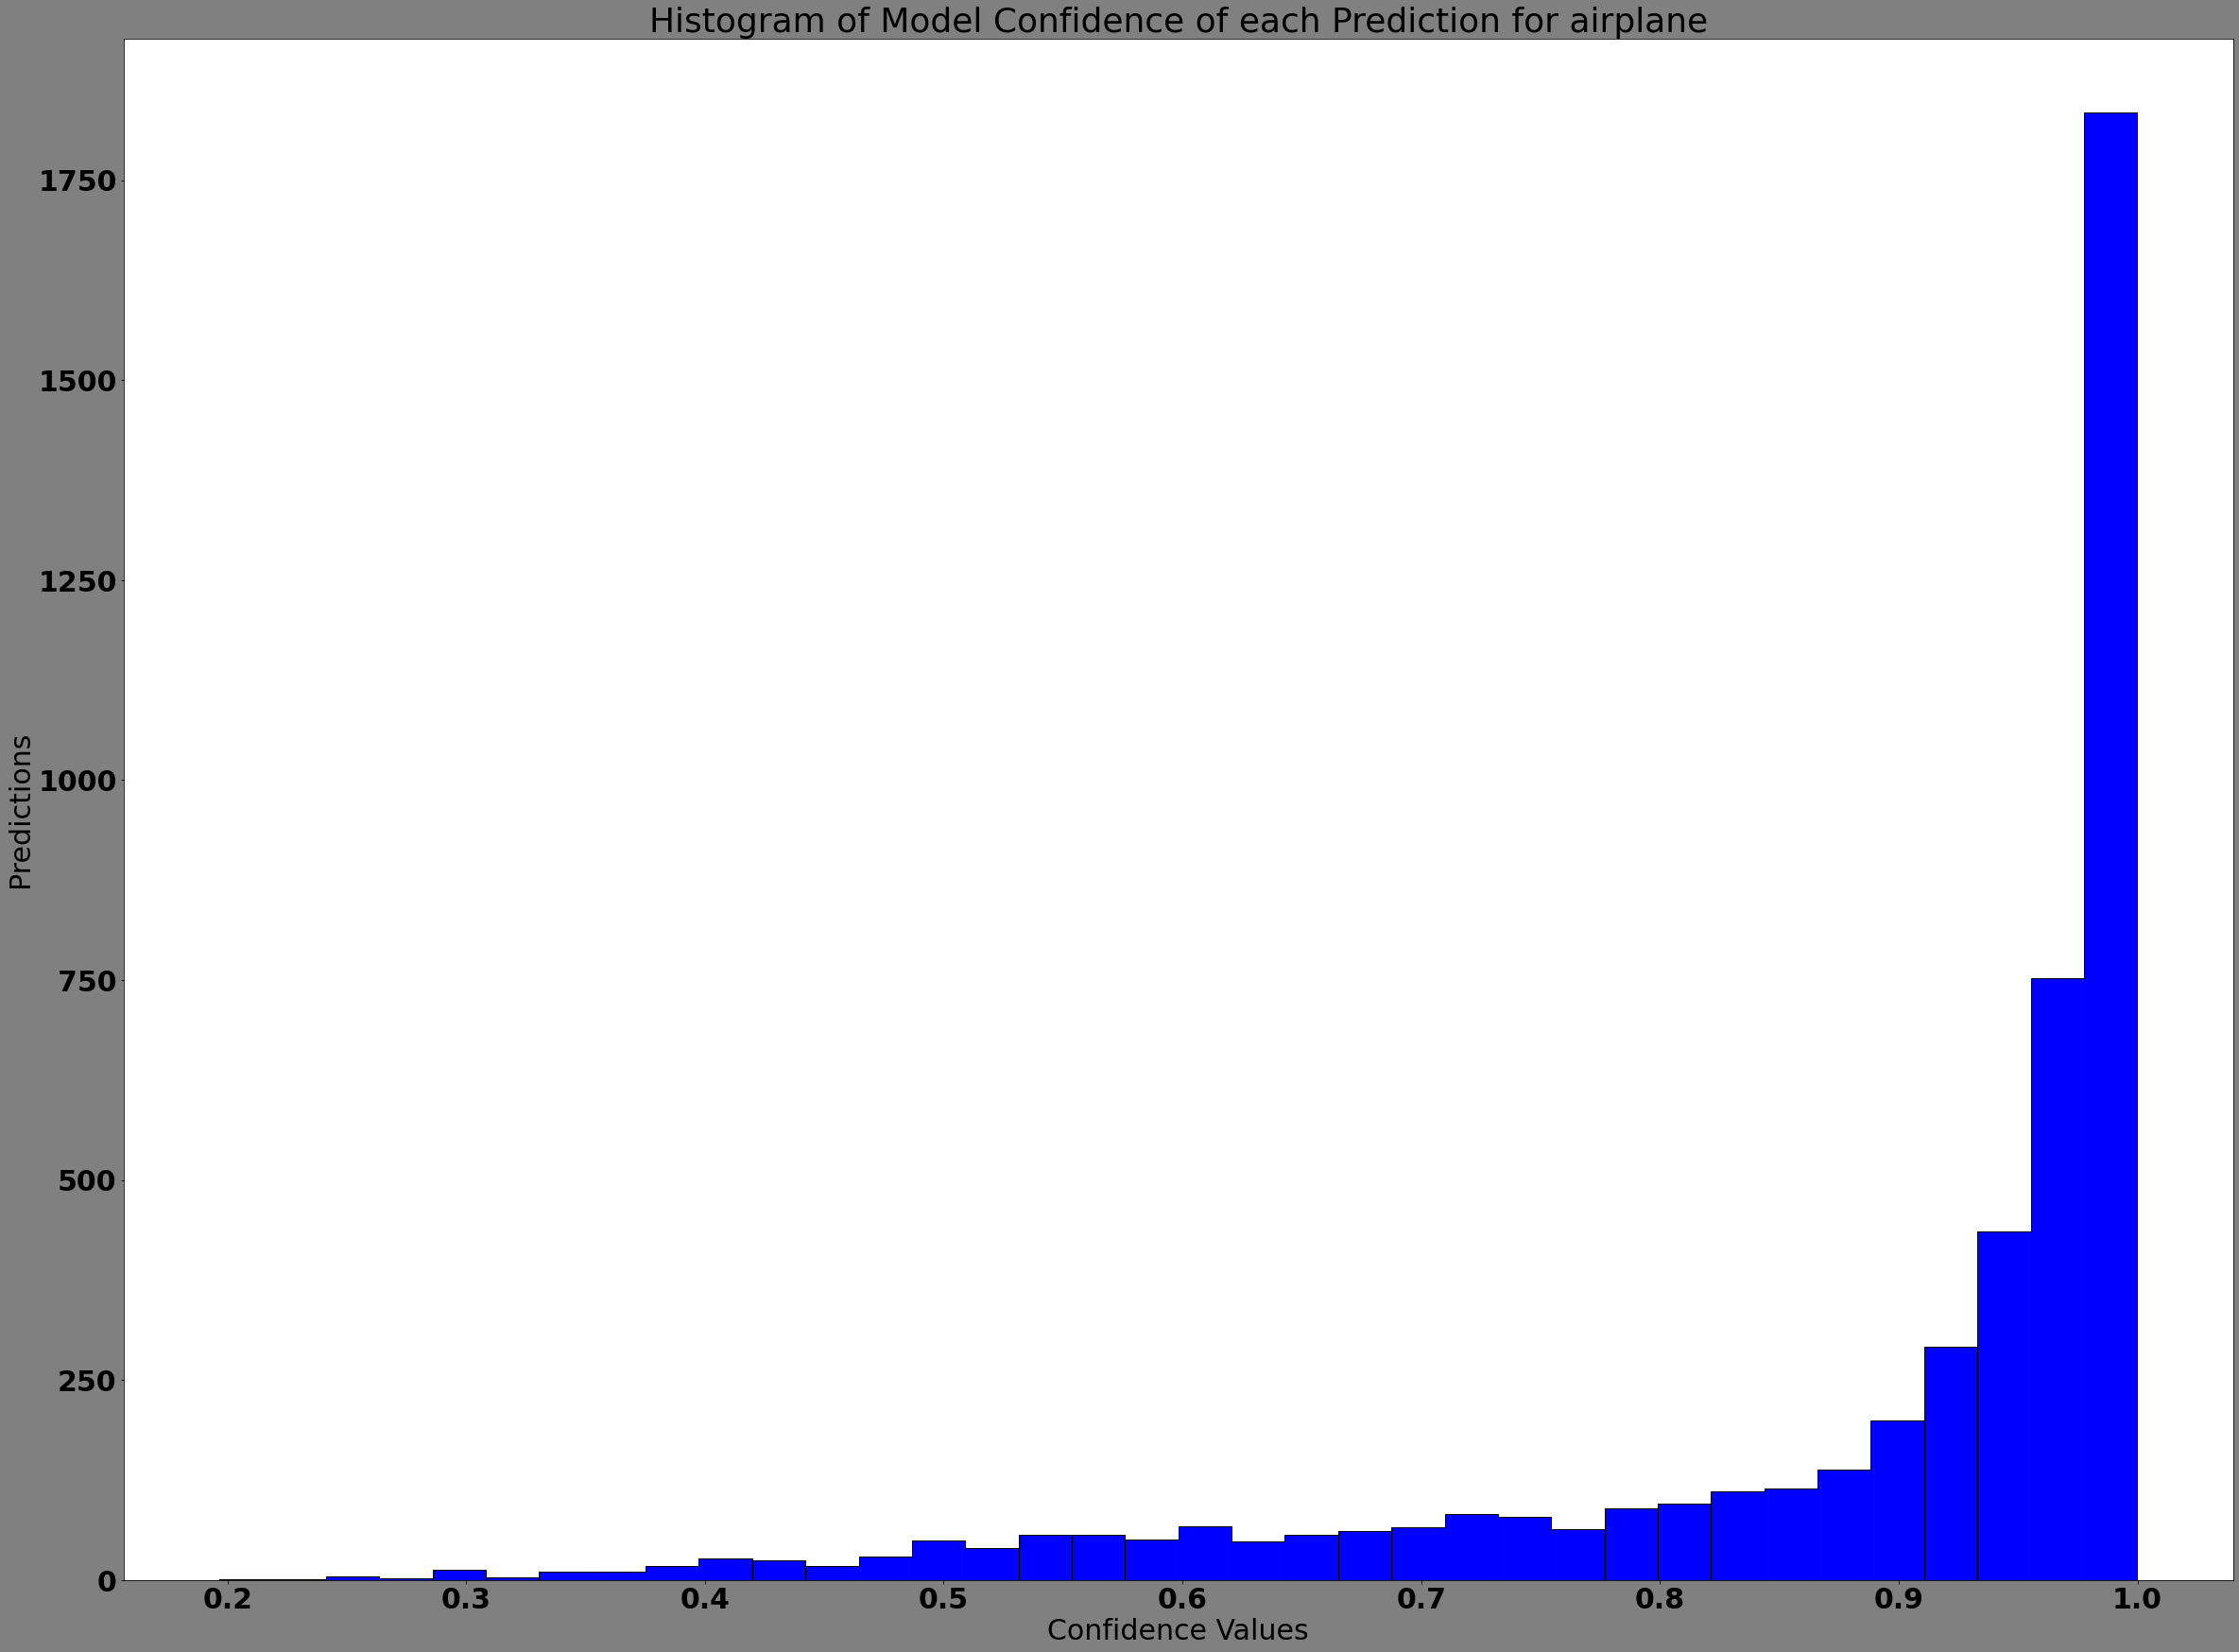

In [18]:
plot_class_pdf(0)

5000/5000 [==============================] - 3s 523us/sample


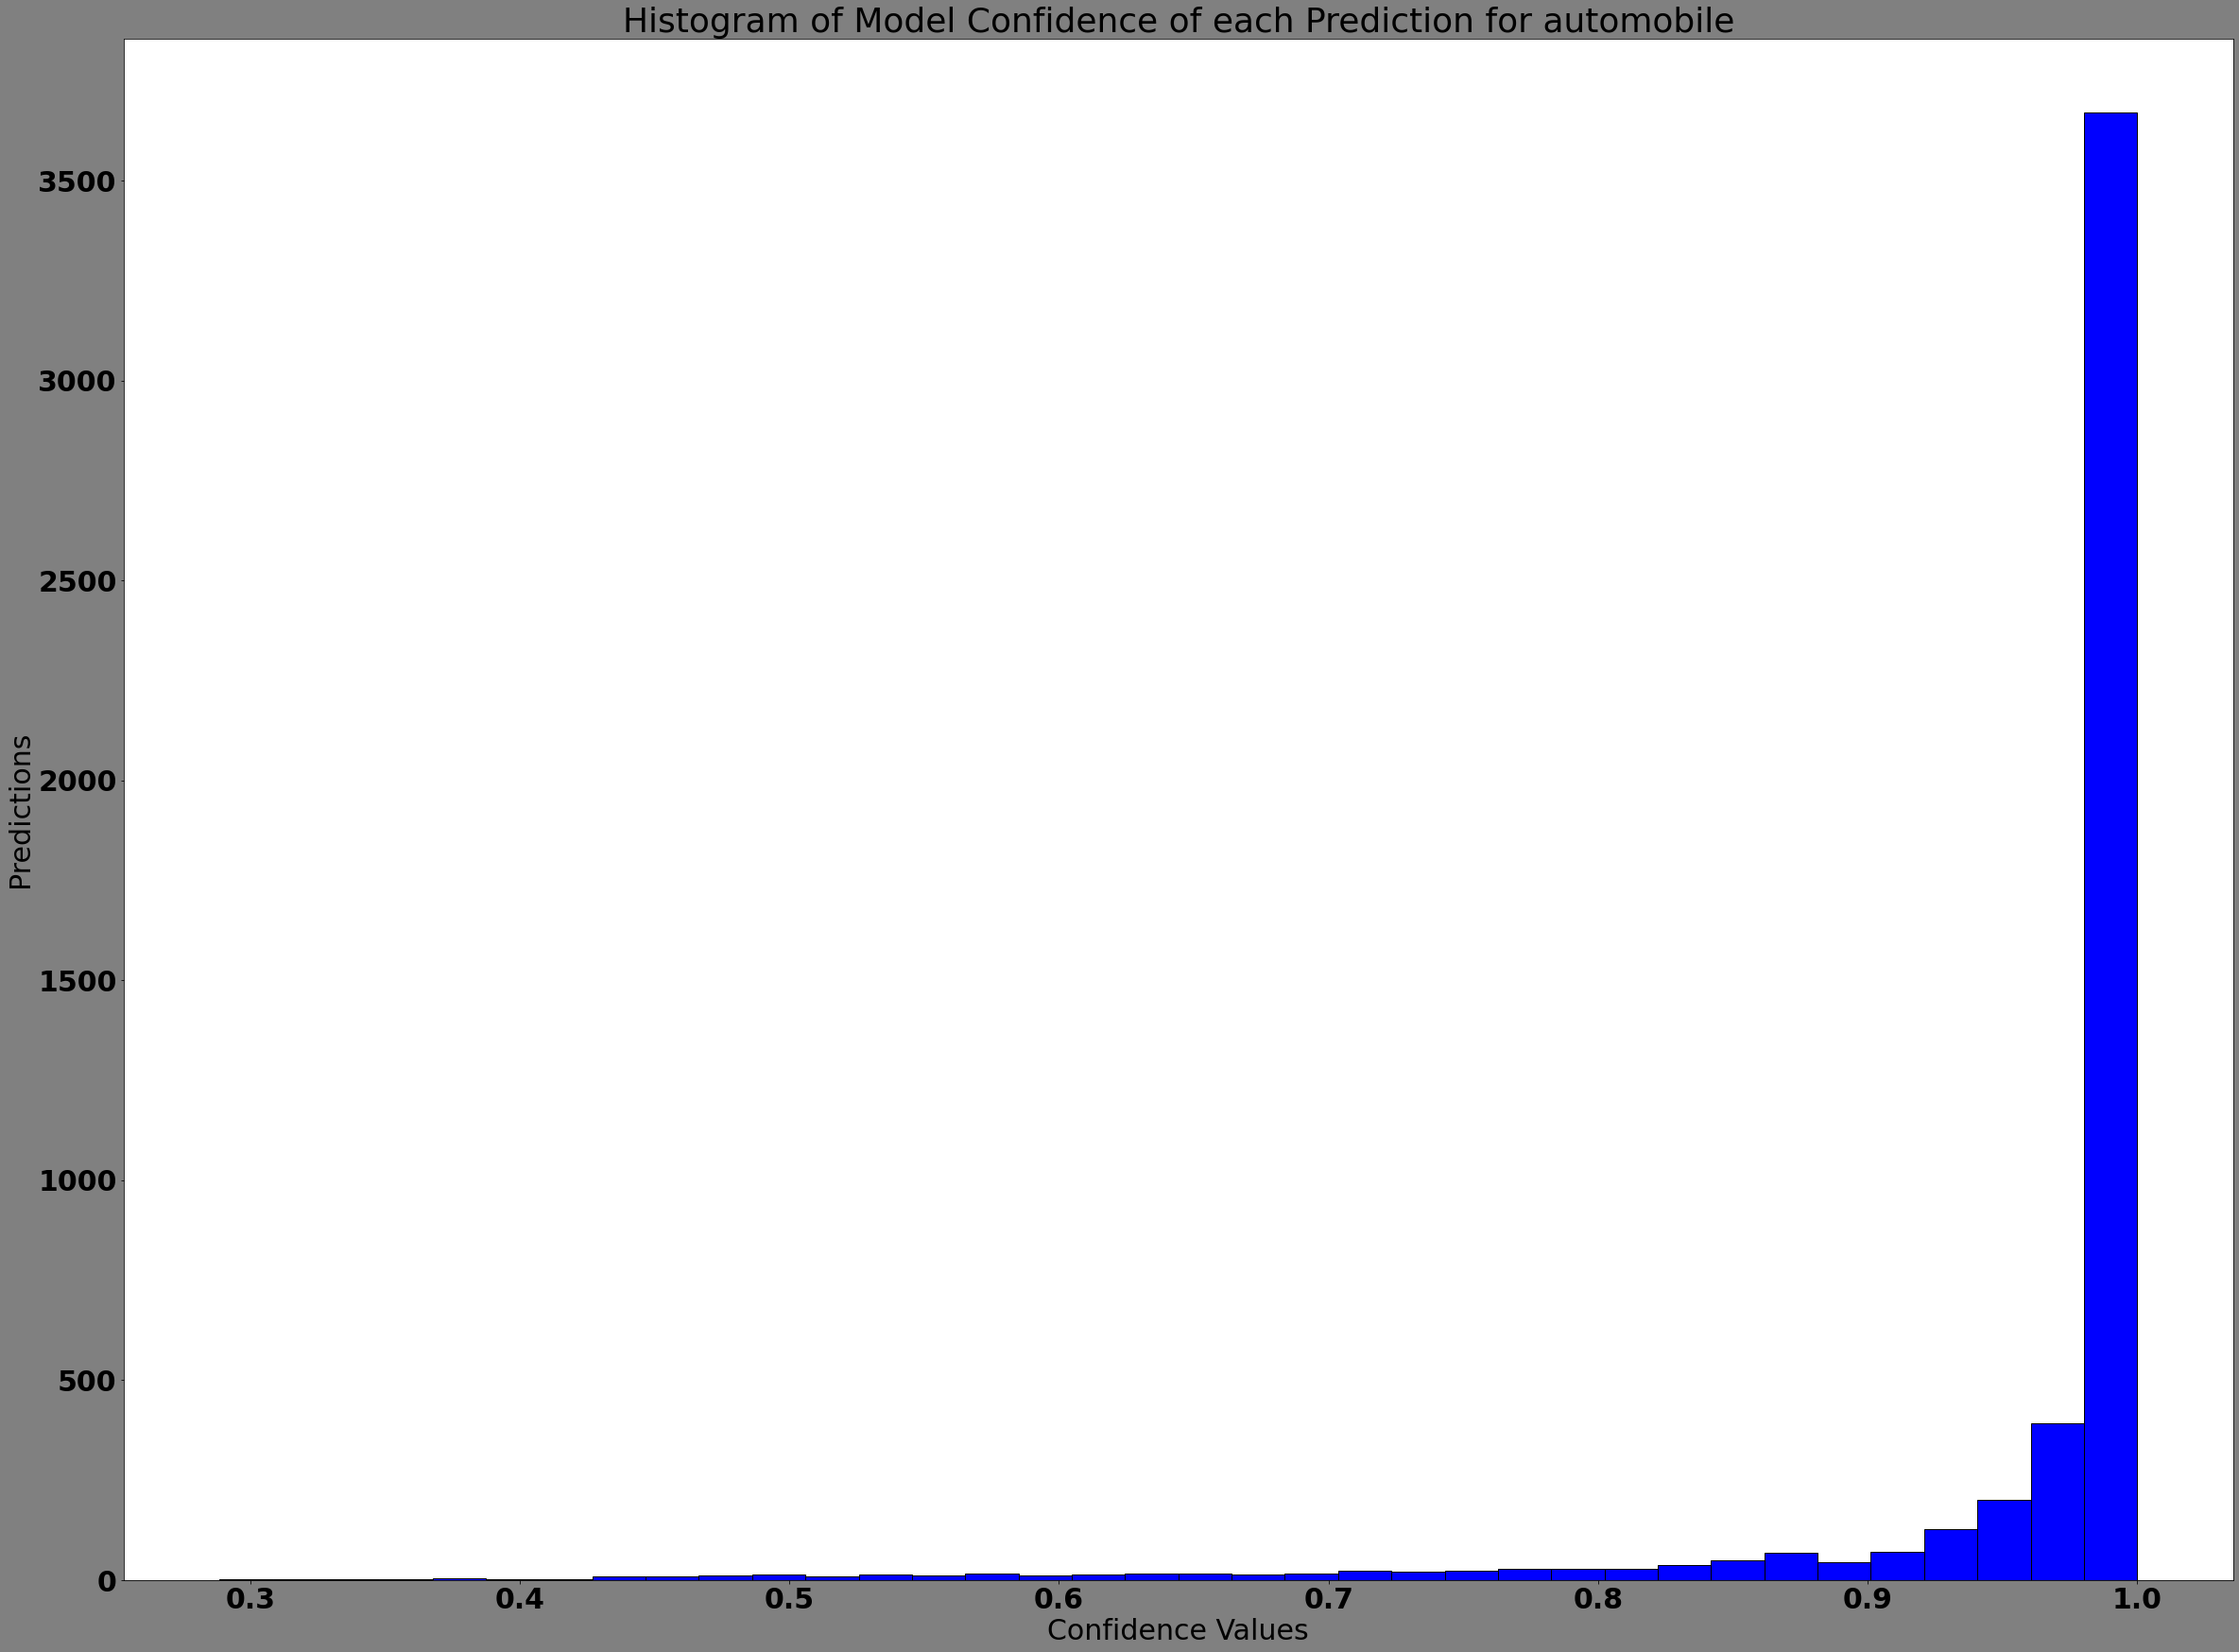

In [19]:
plot_class_pdf(1)

5000/5000 [==============================] - 3s 531us/sample


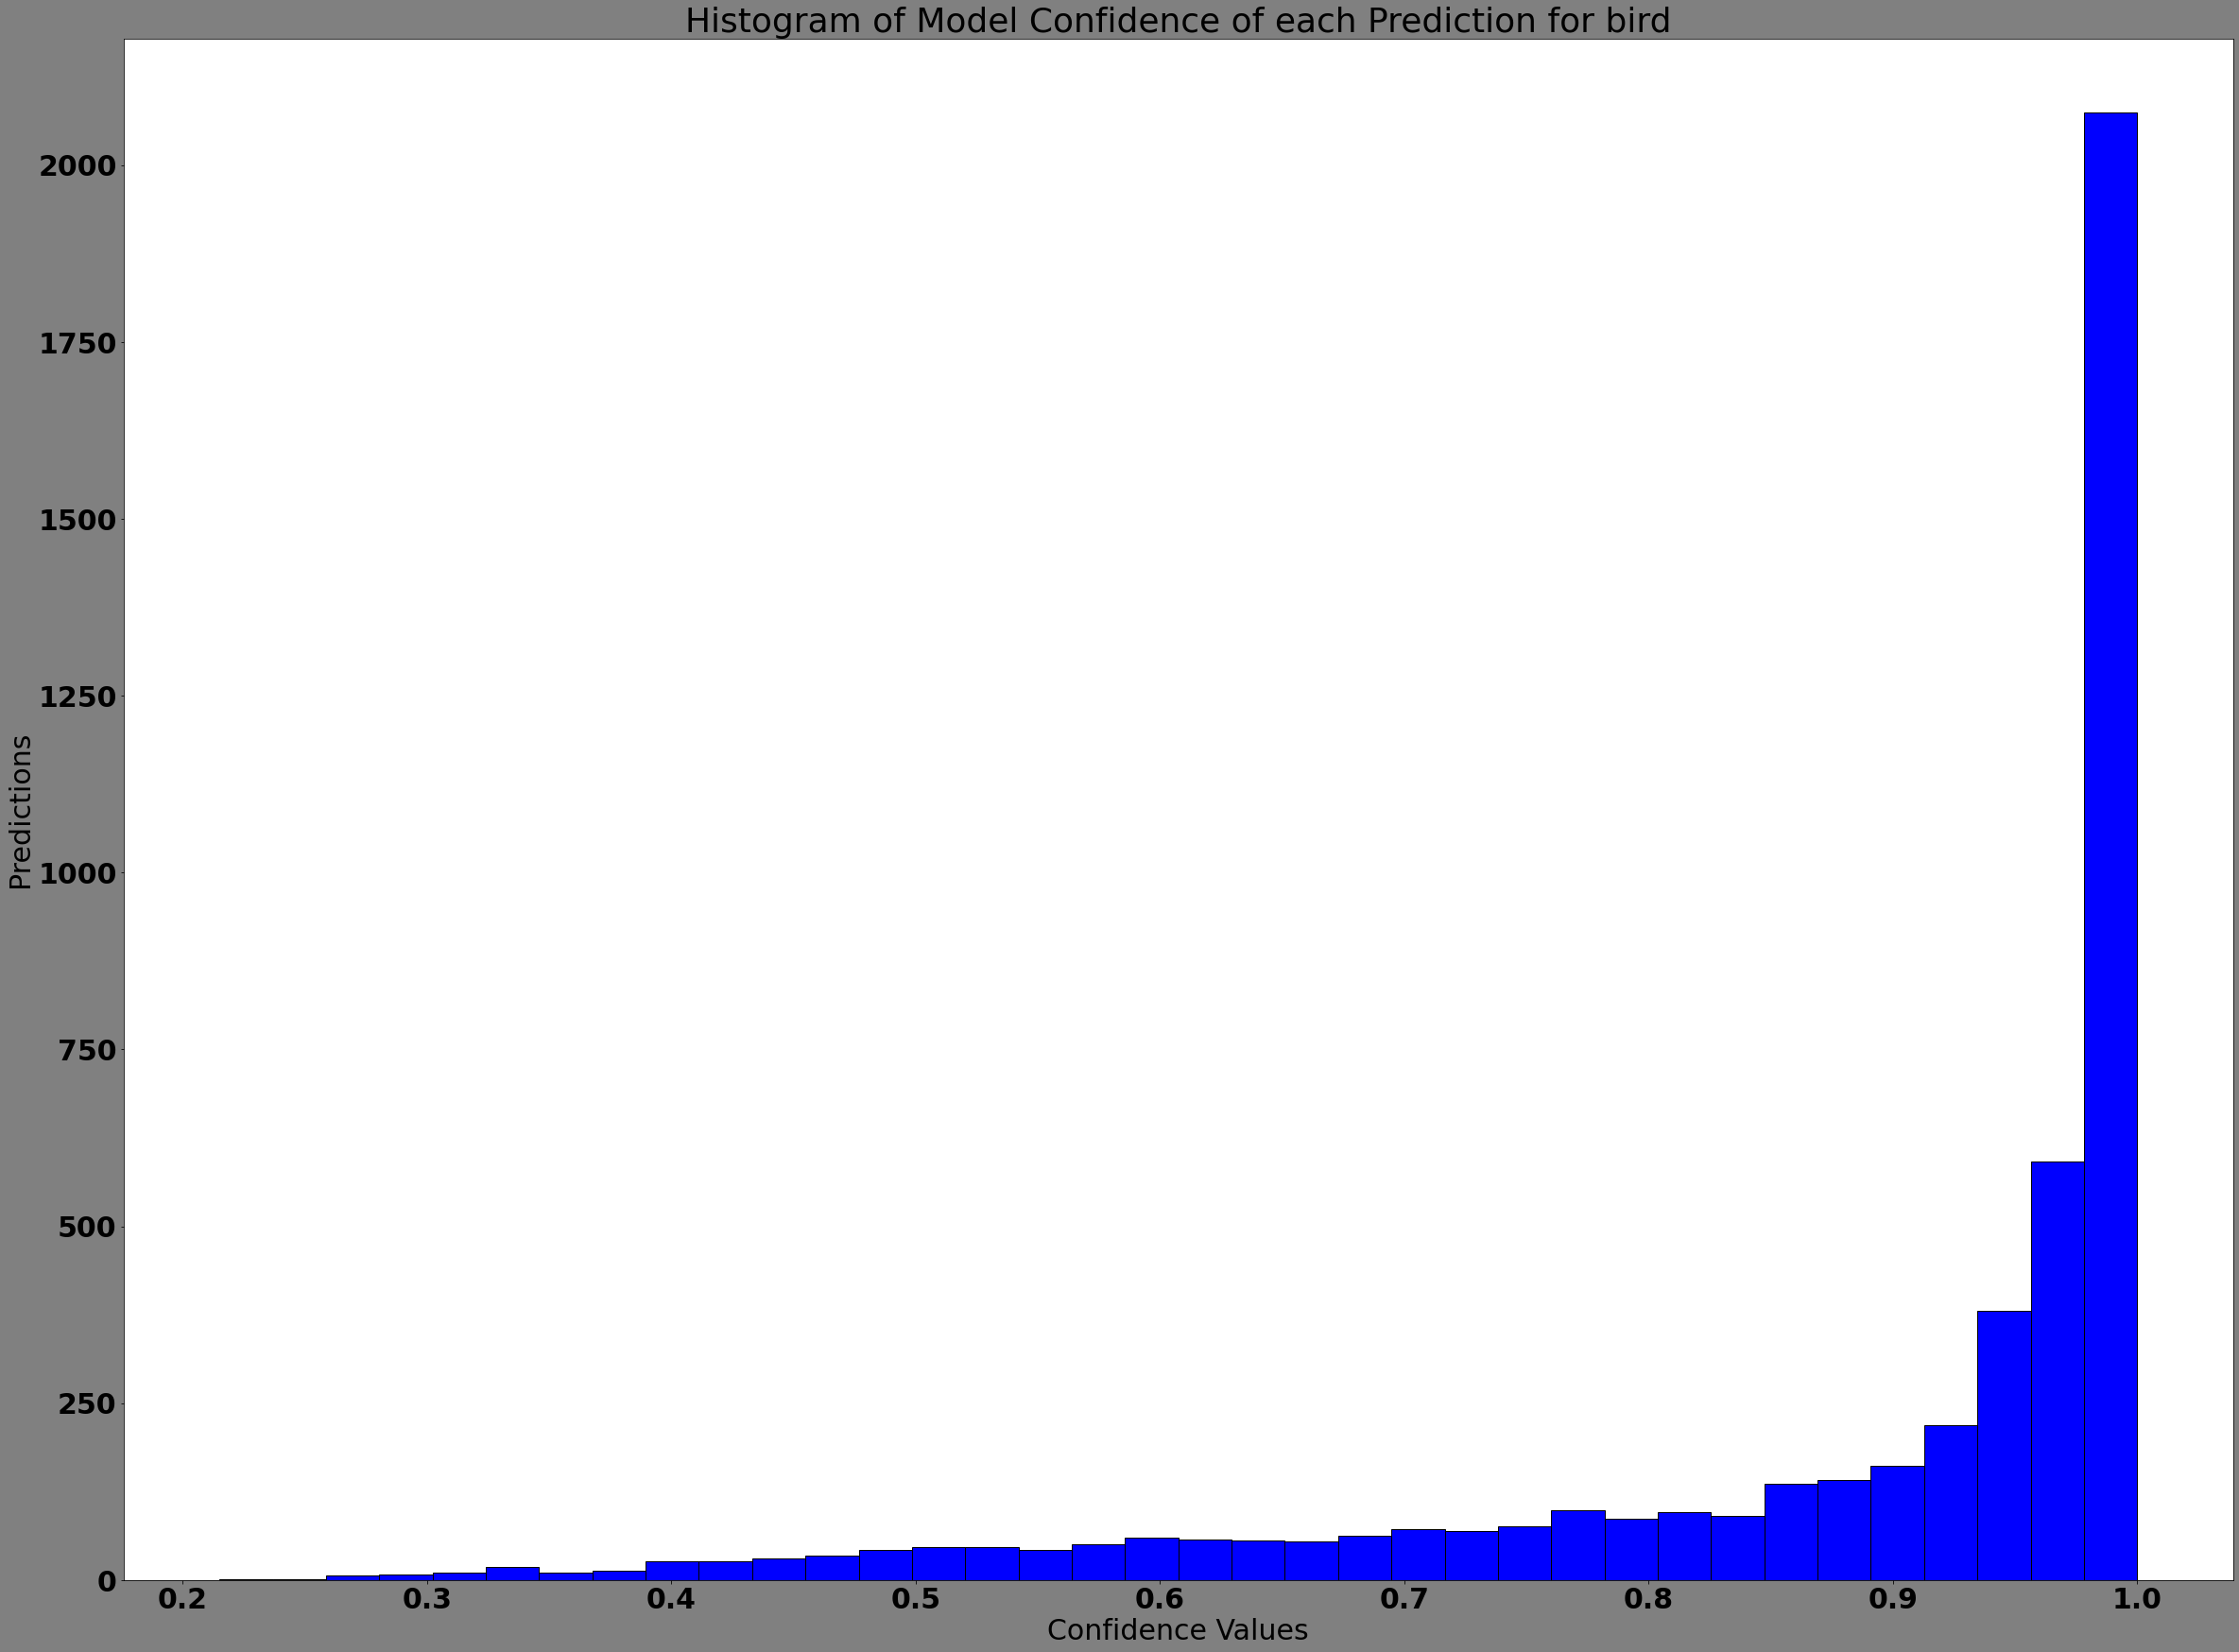

In [20]:
plot_class_pdf(2)

5000/5000 [==============================] - 3s 529us/sample


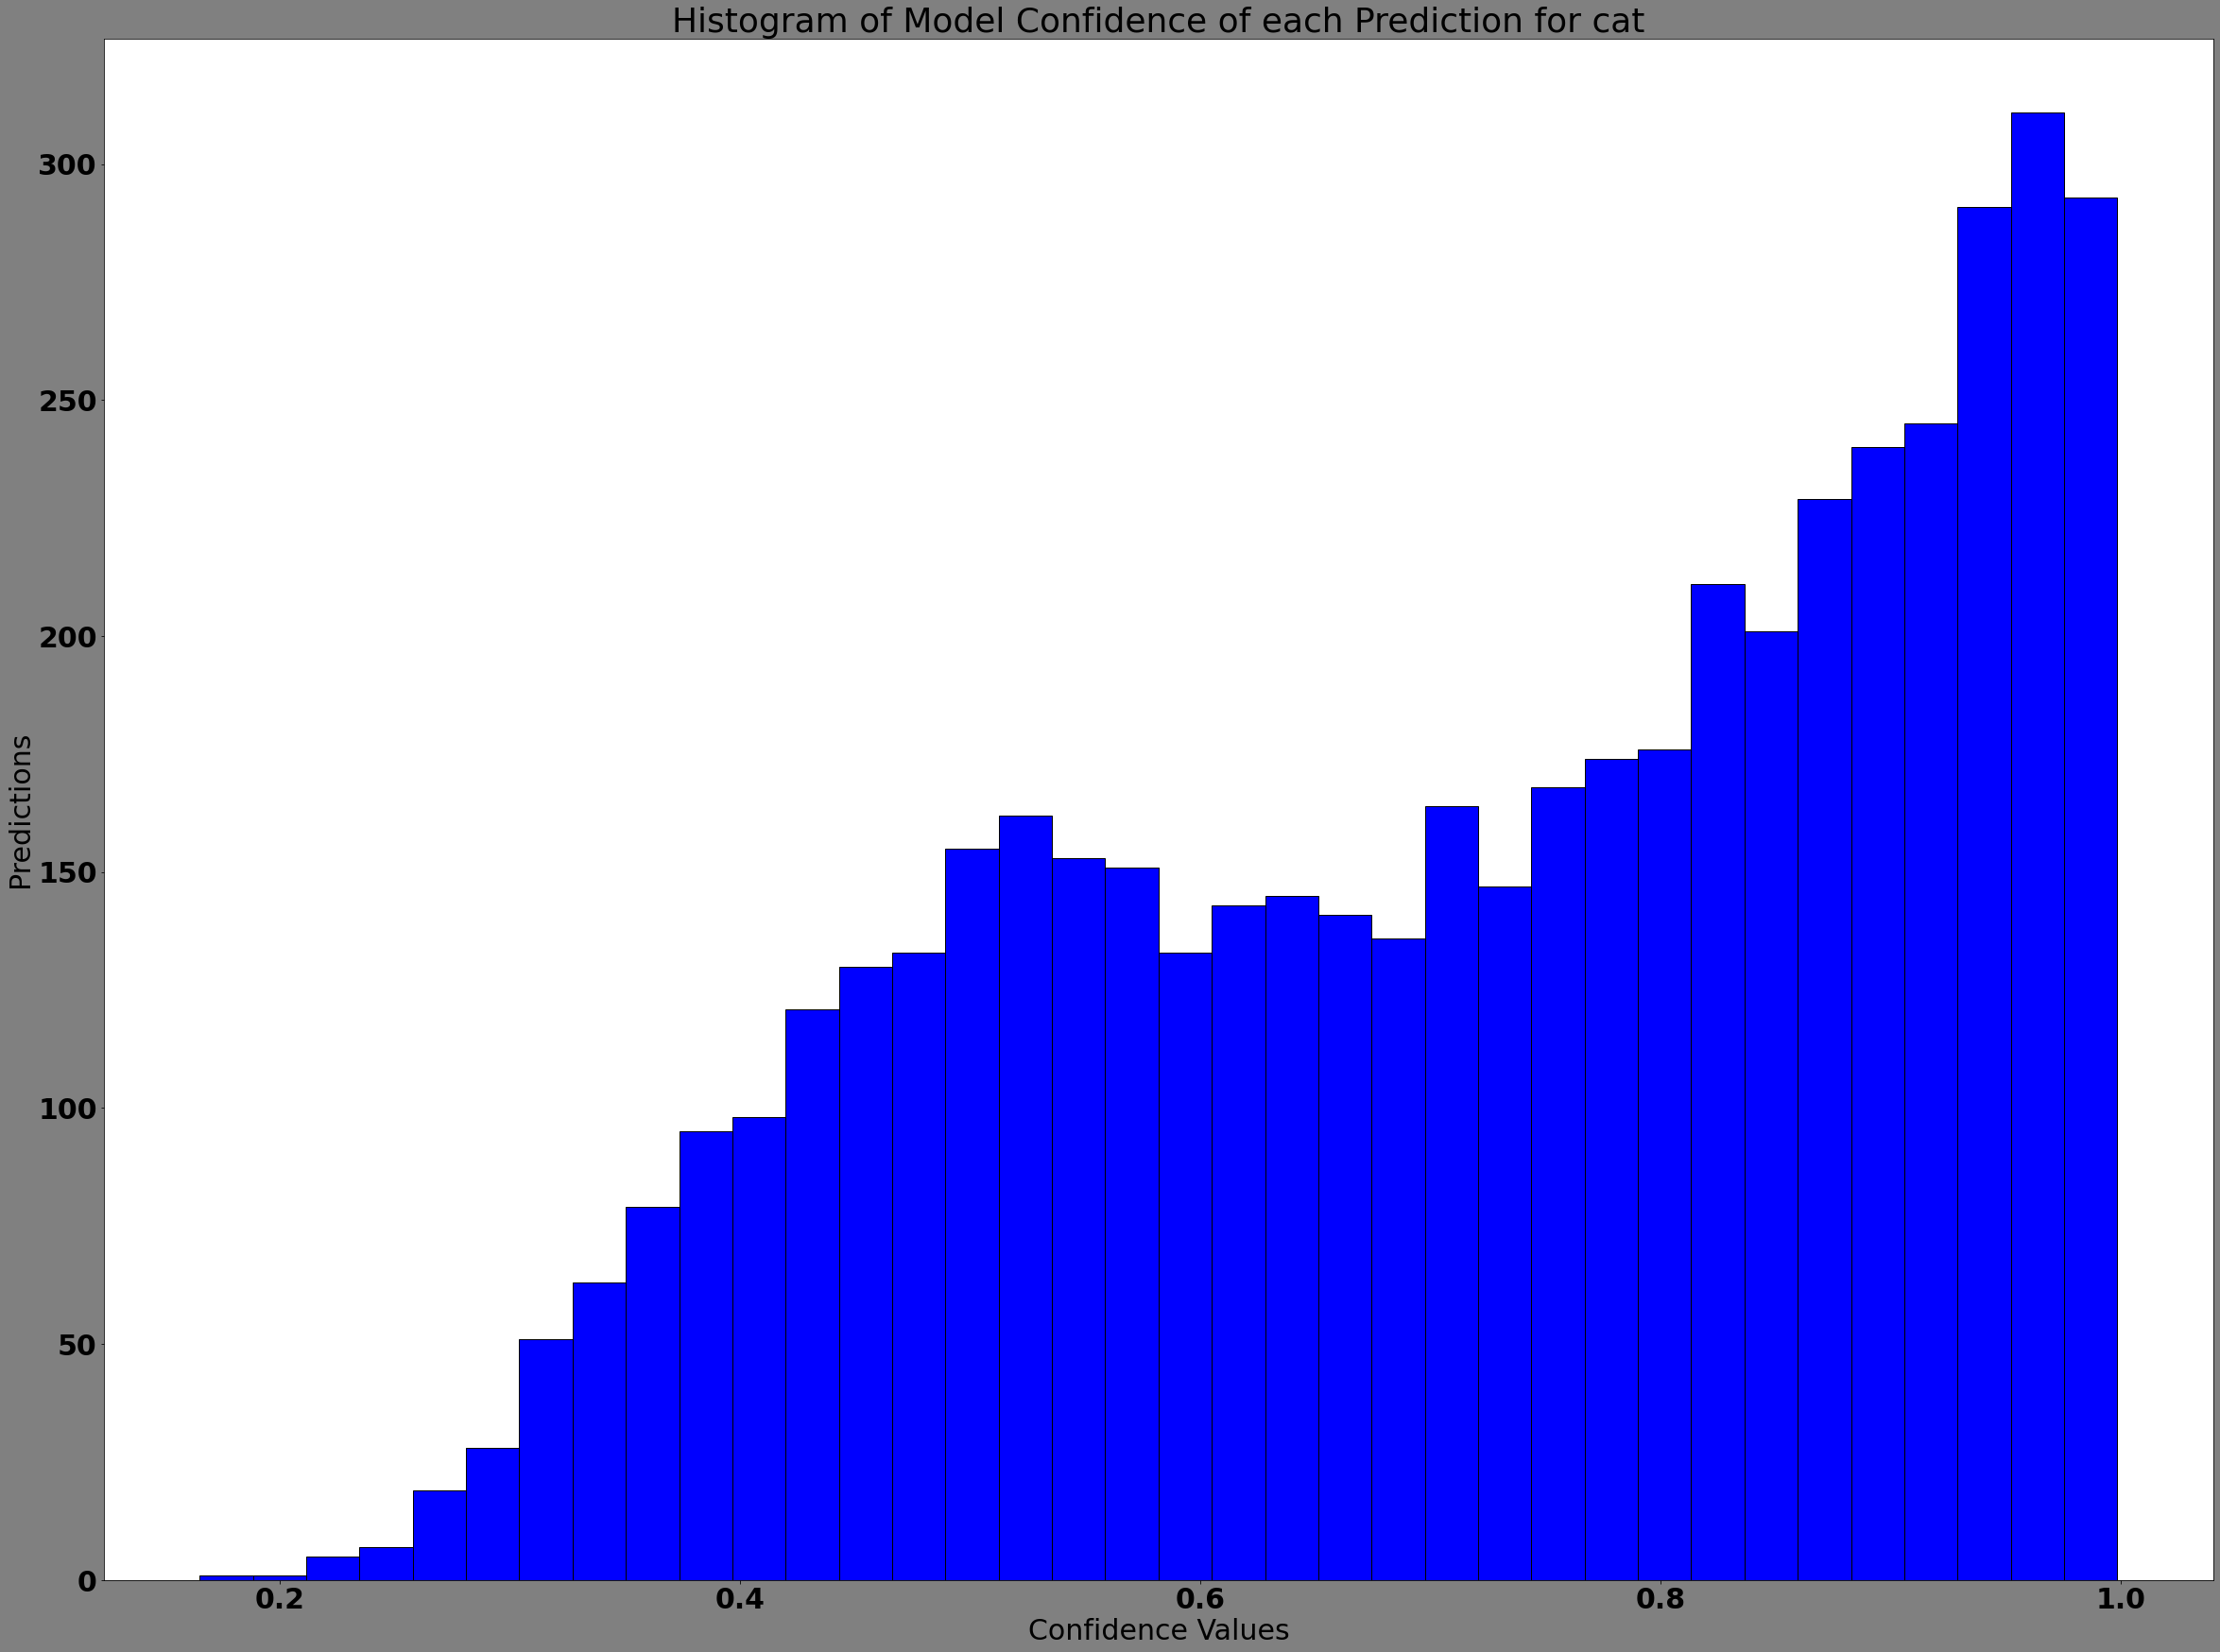

In [21]:
plot_class_pdf(3)

5000/5000 [==============================] - 3s 525us/sample


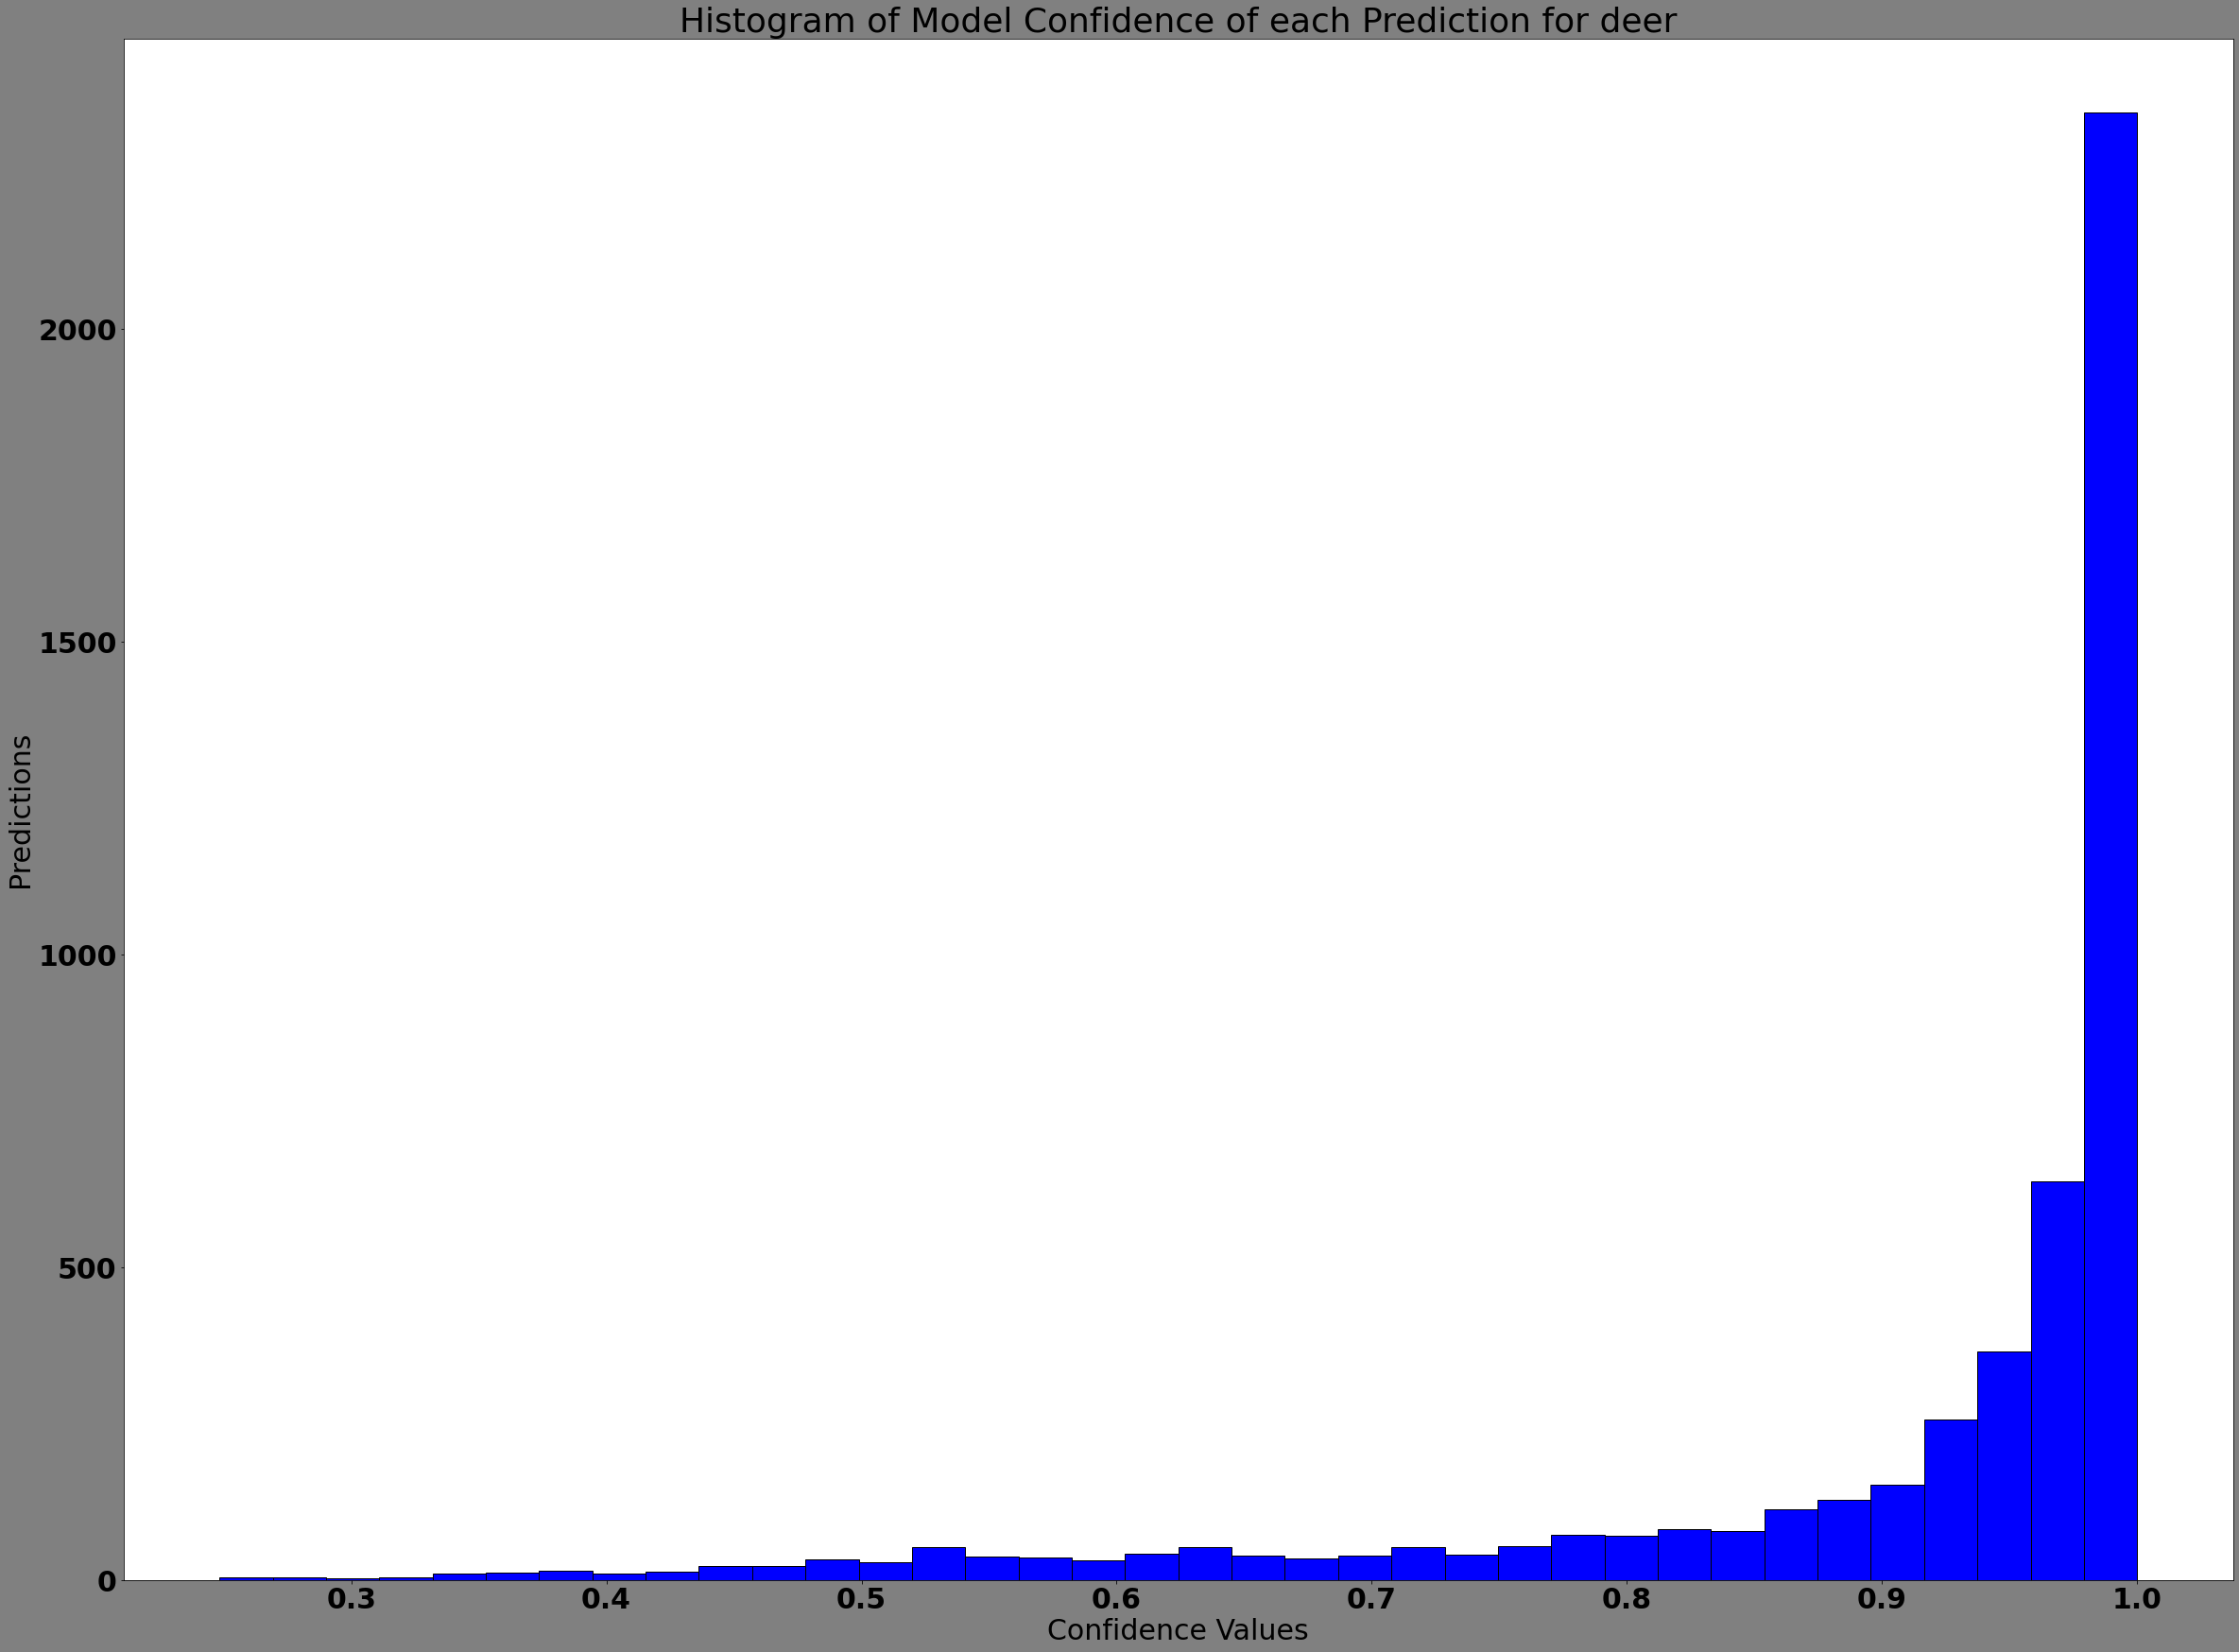

In [22]:
plot_class_pdf(4)

5000/5000 [==============================] - 3s 526us/sample


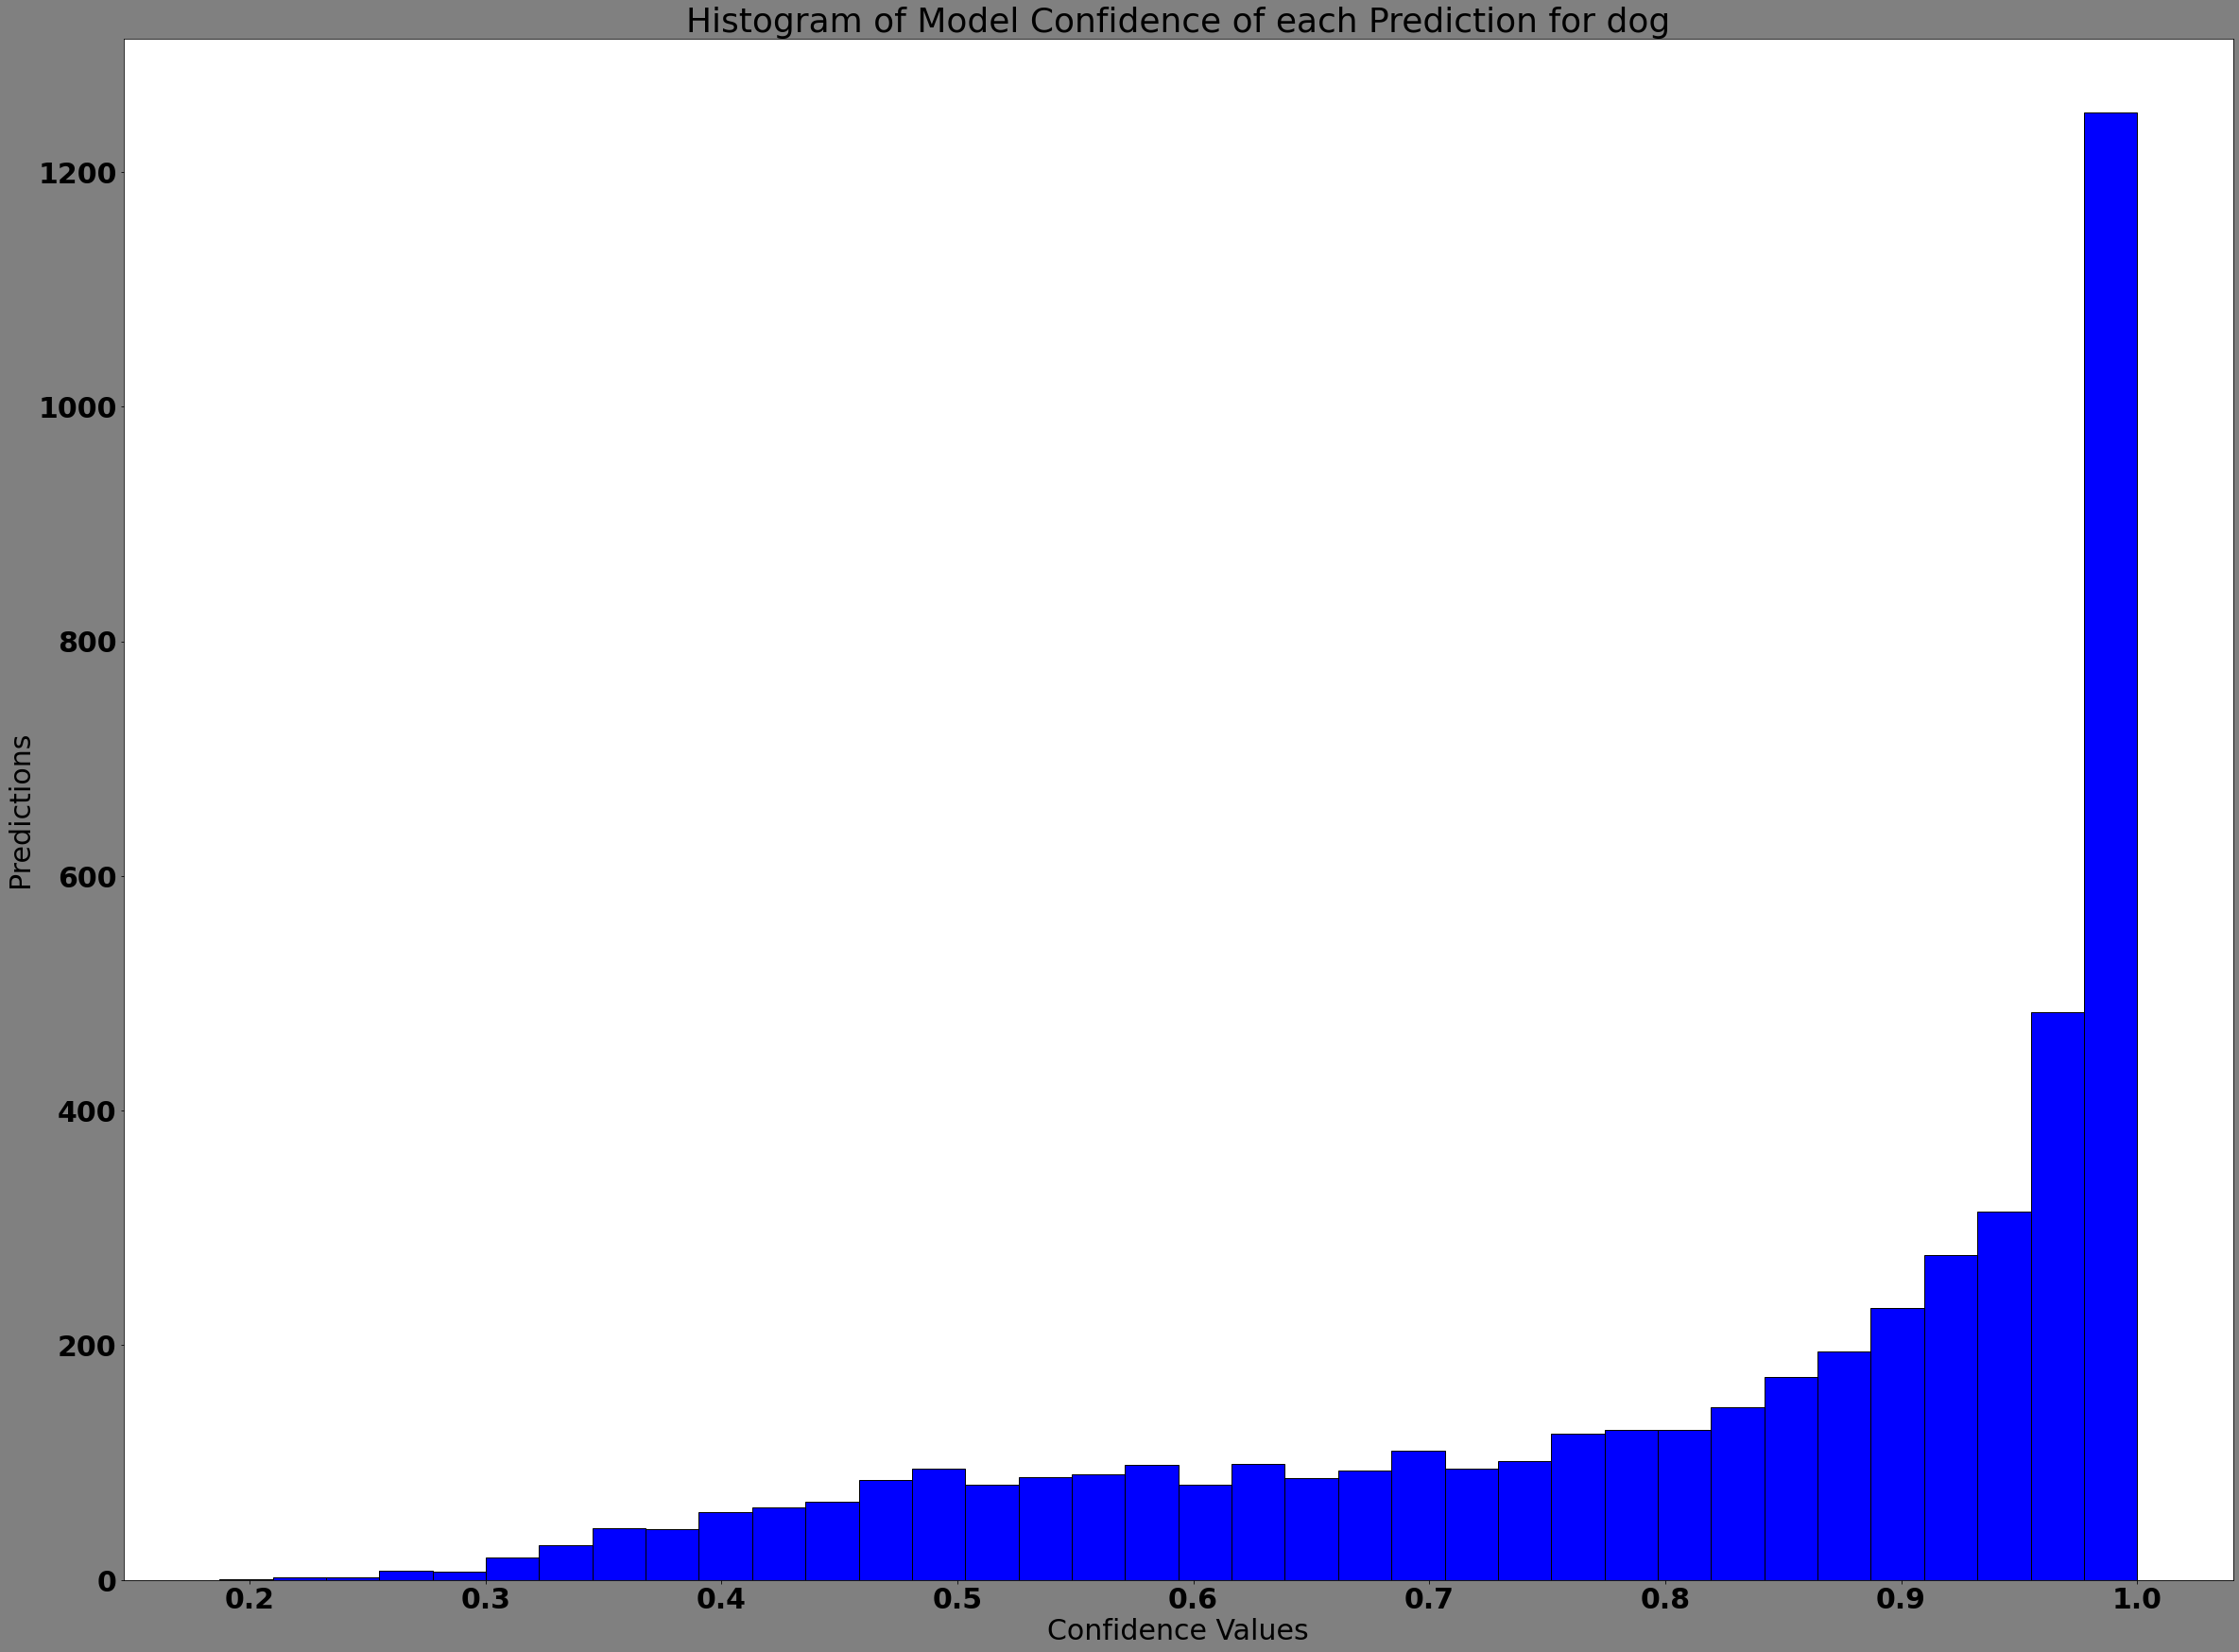

In [23]:
plot_class_pdf(5)

5000/5000 [==============================] - 3s 525us/sample


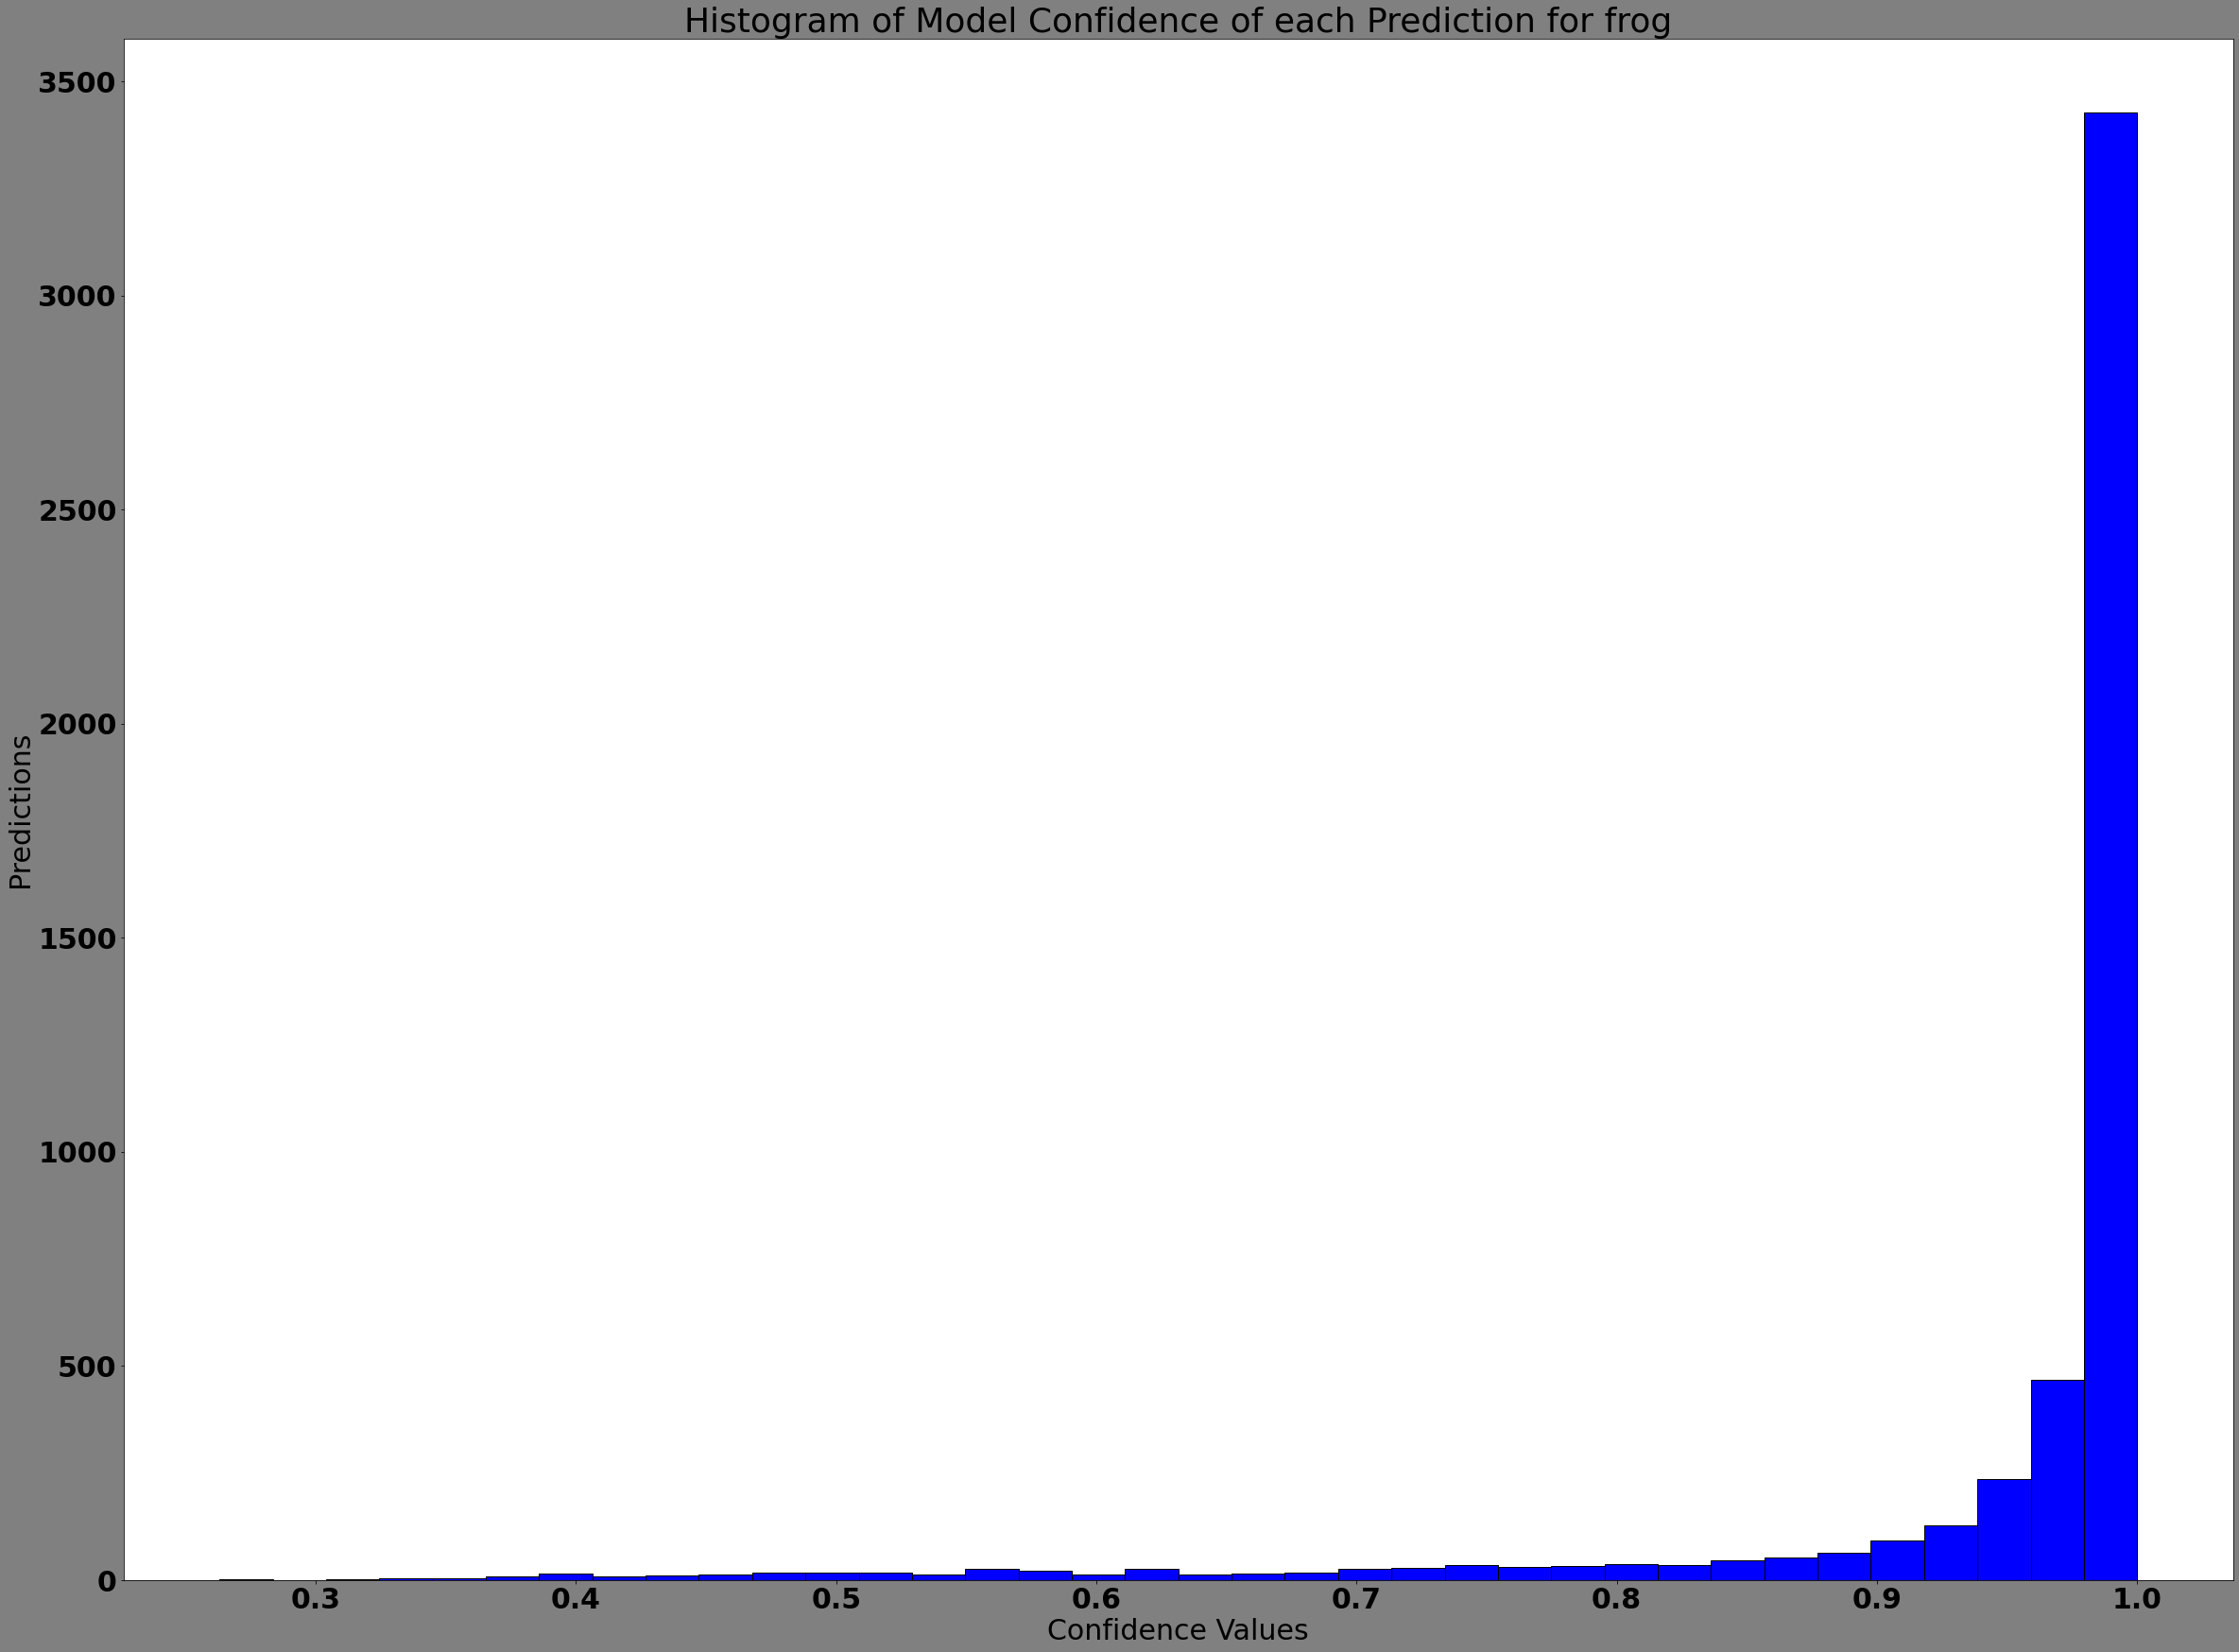

In [24]:
plot_class_pdf(6)

5000/5000 [==============================] - 3s 527us/sample


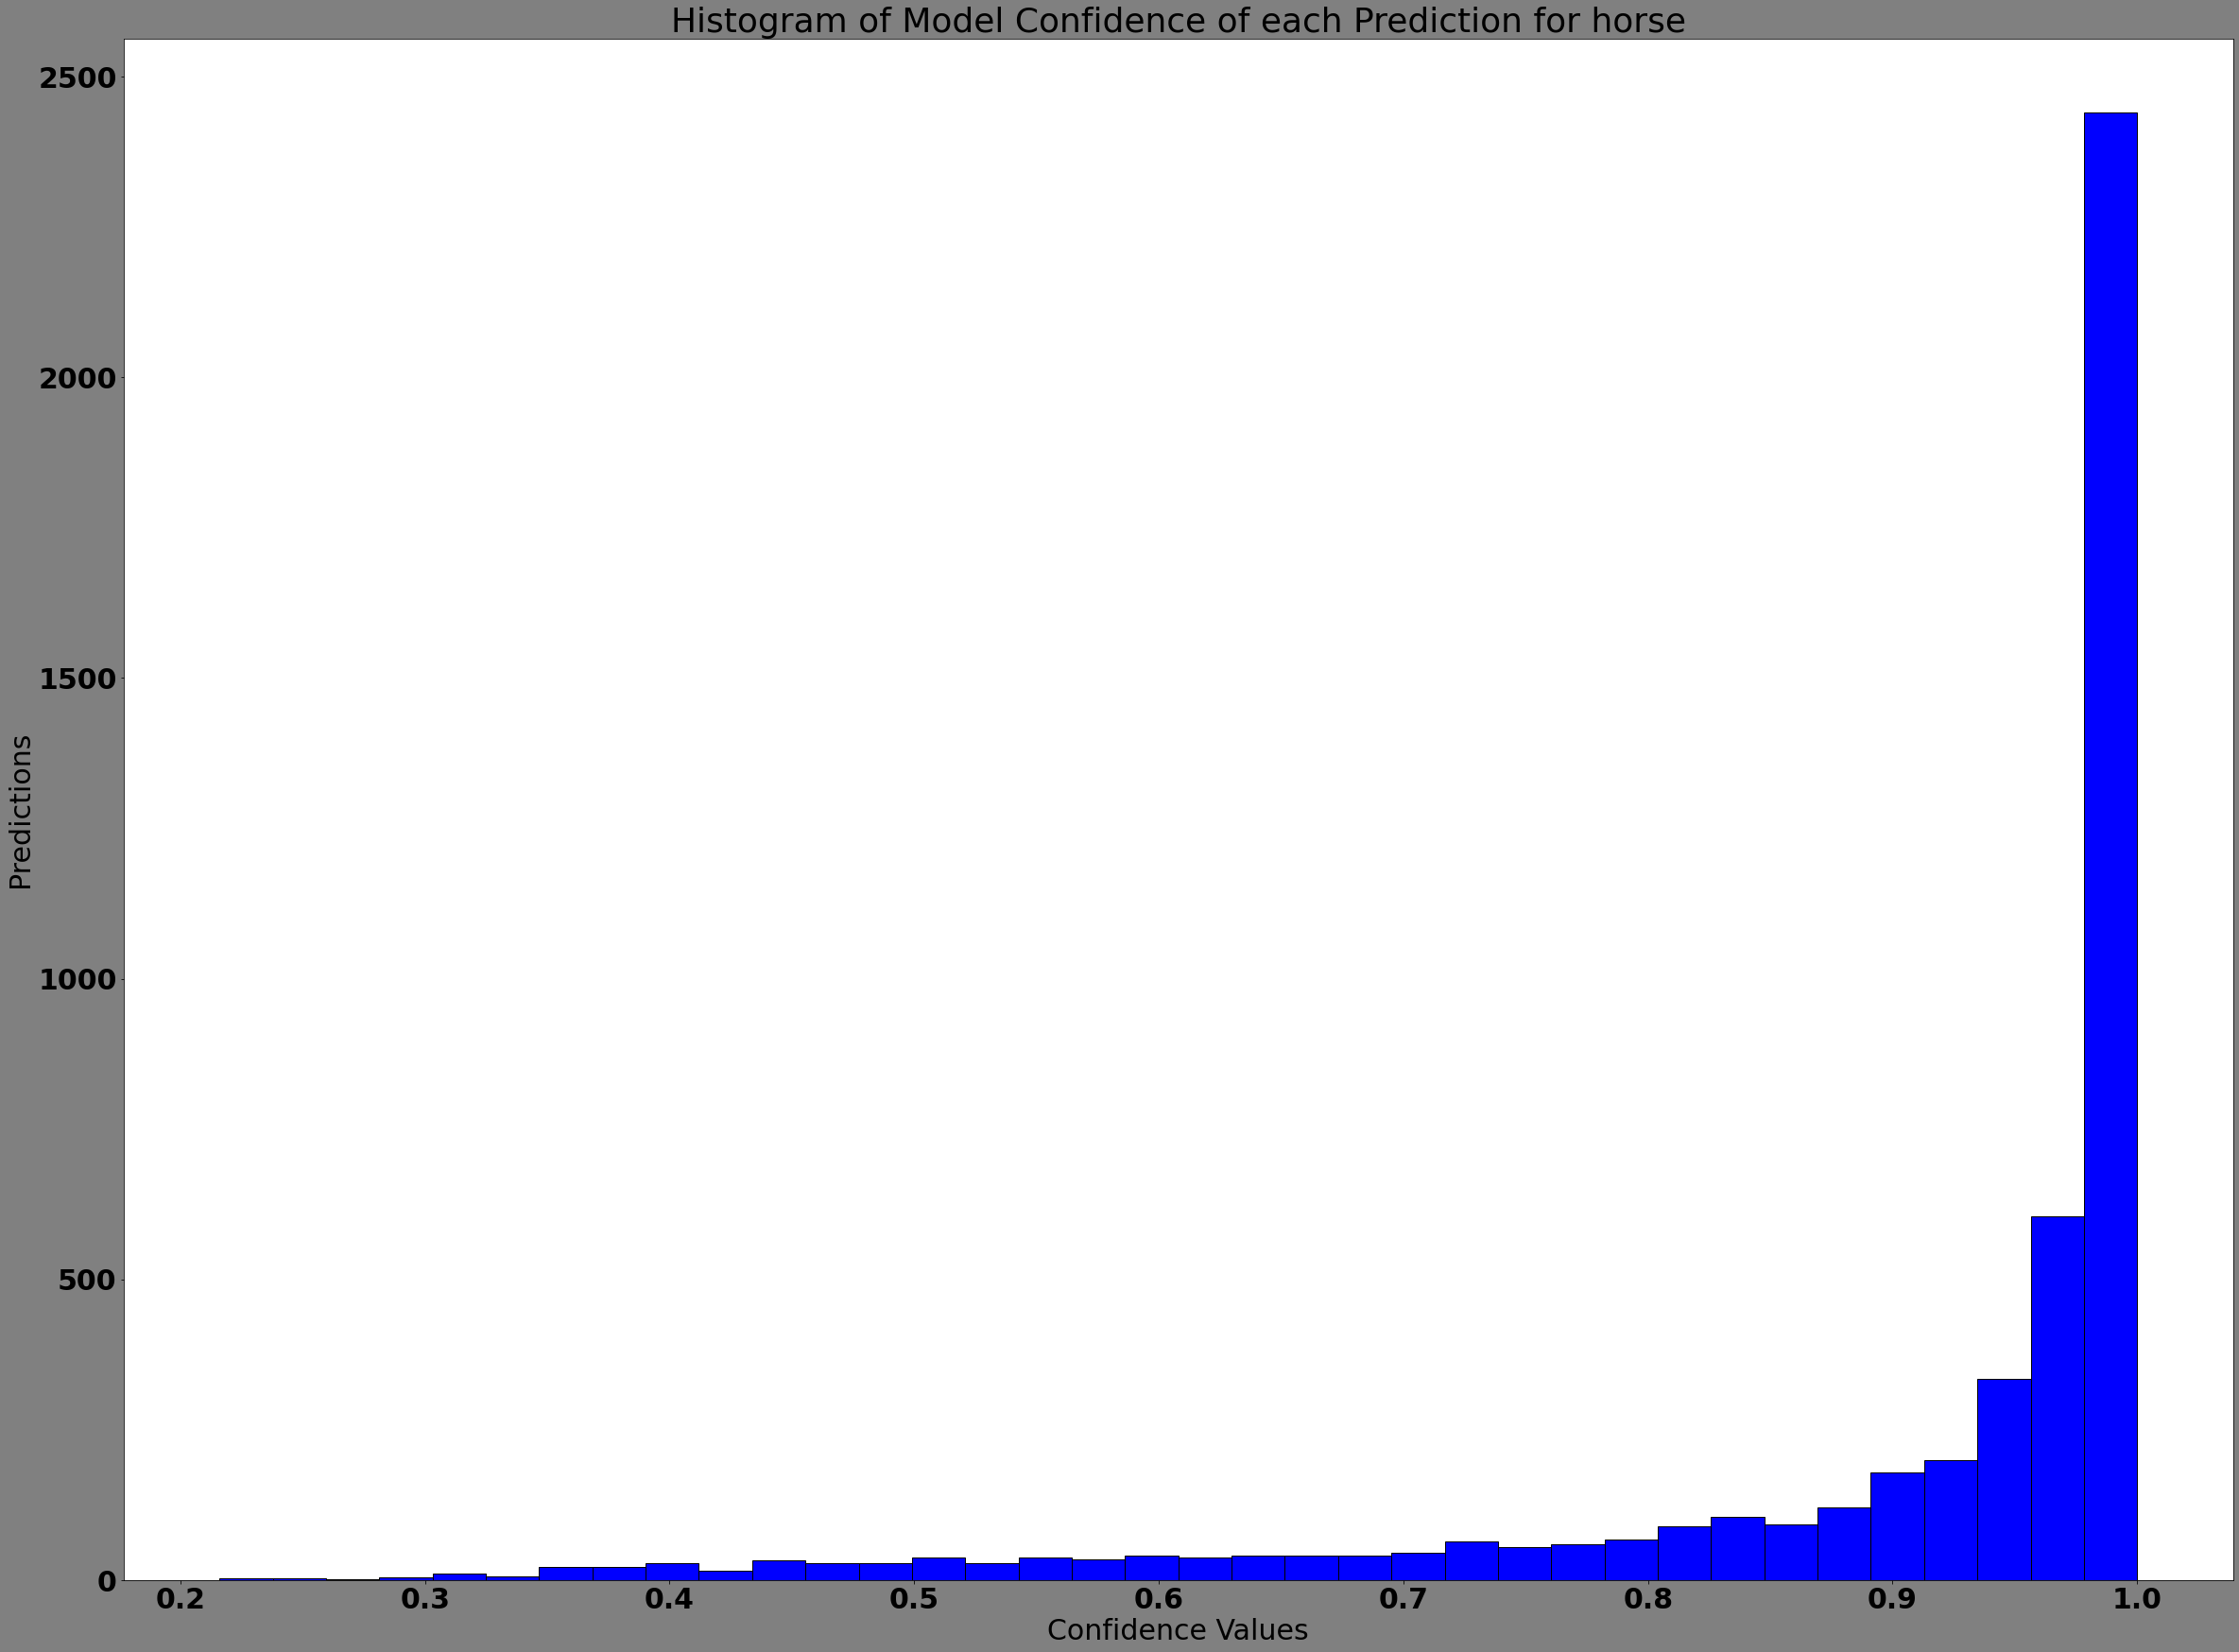

In [25]:
plot_class_pdf(7)

5000/5000 [==============================] - 3s 532us/sample


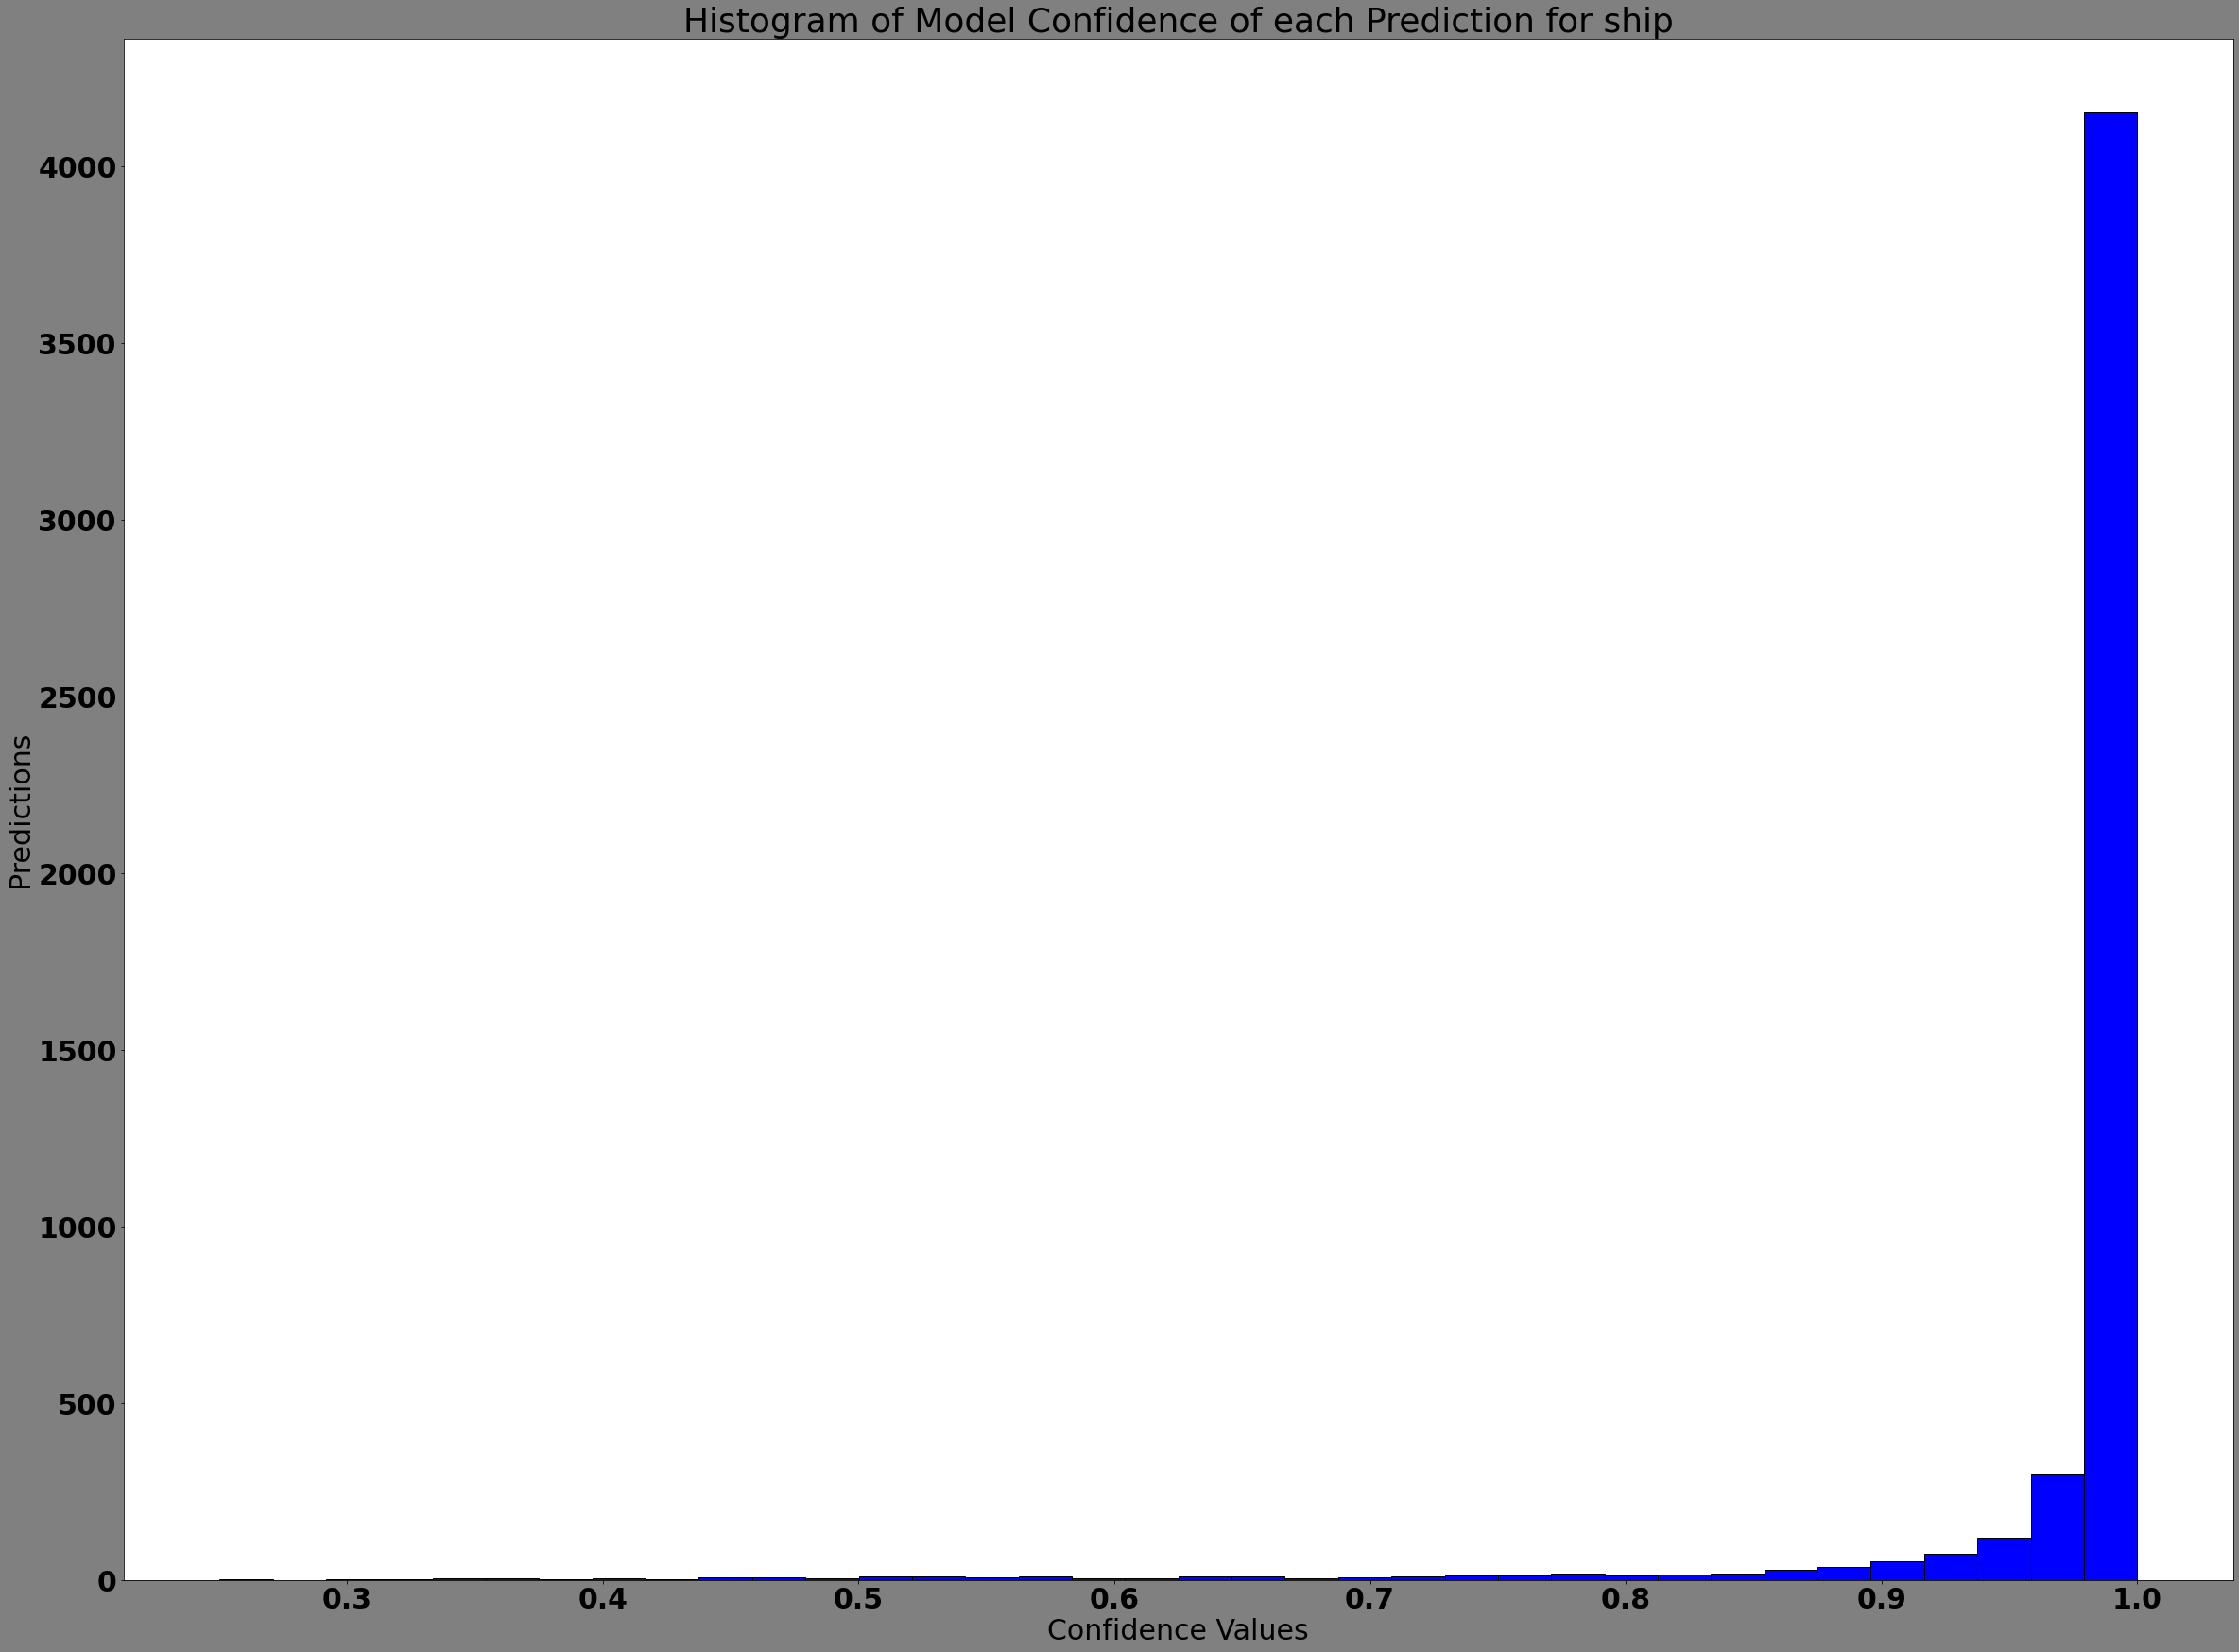

In [26]:
plot_class_pdf(8)

5000/5000 [==============================] - 3s 537us/sample


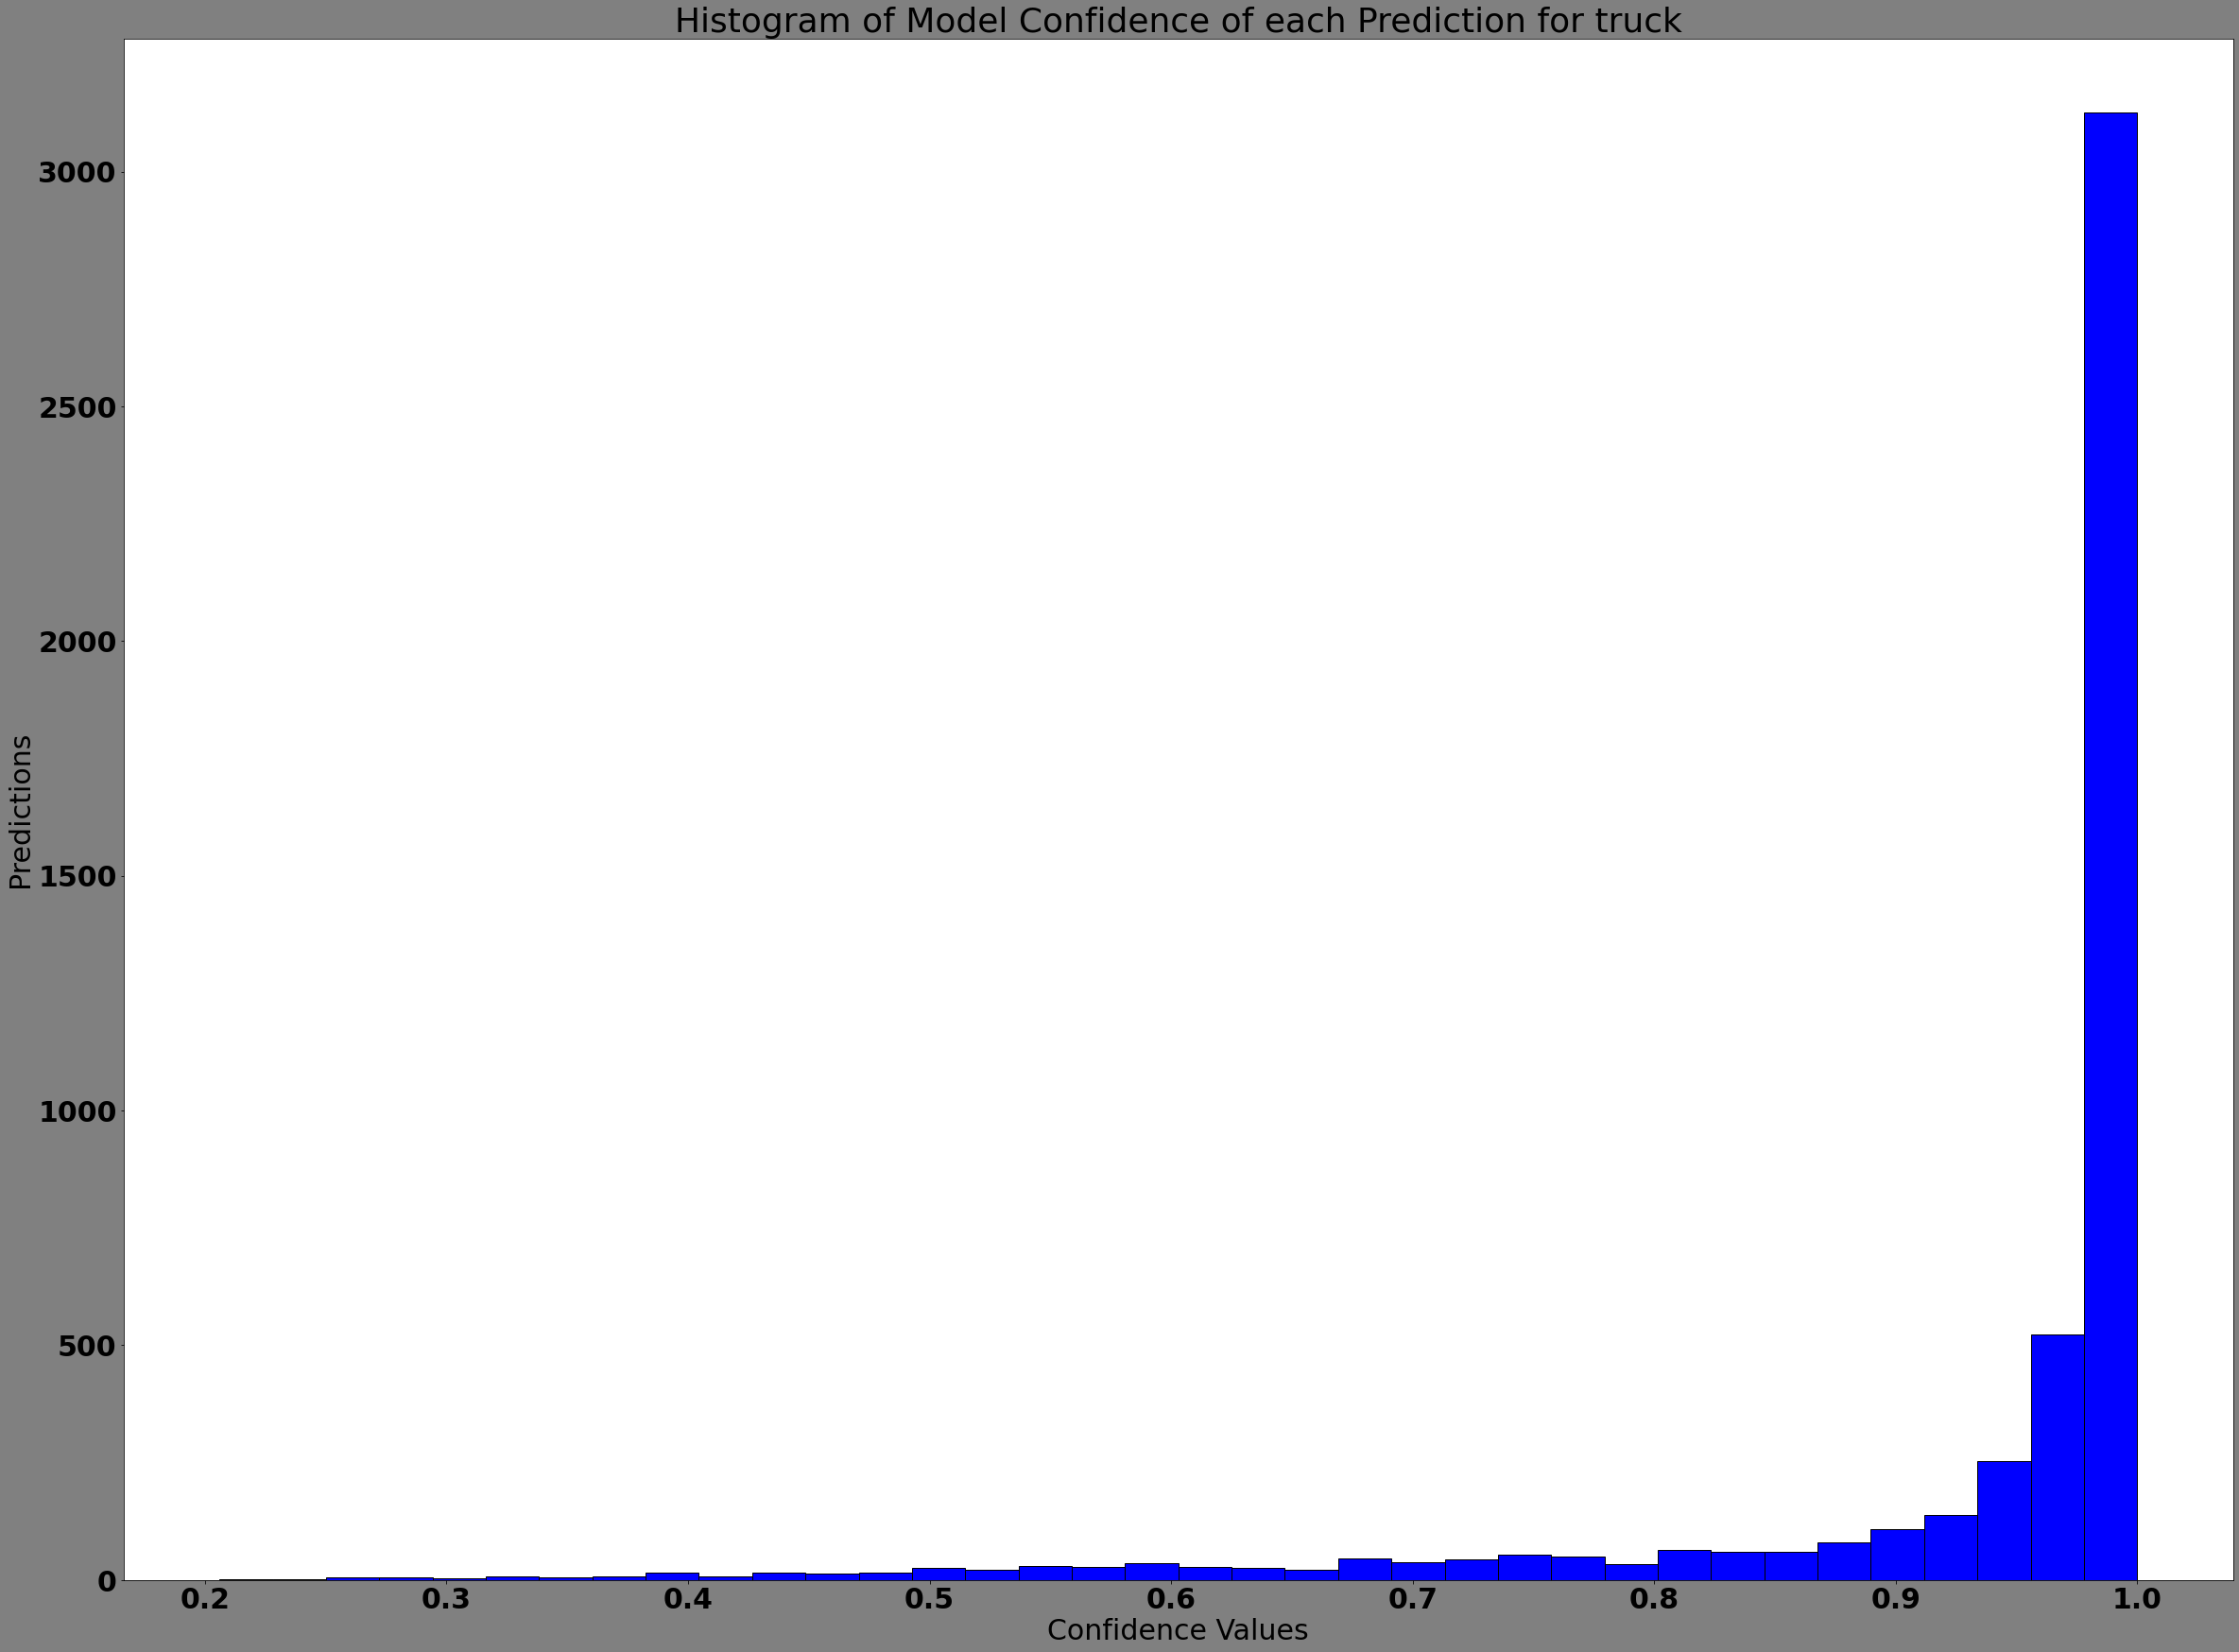

In [27]:
plot_class_pdf(9)

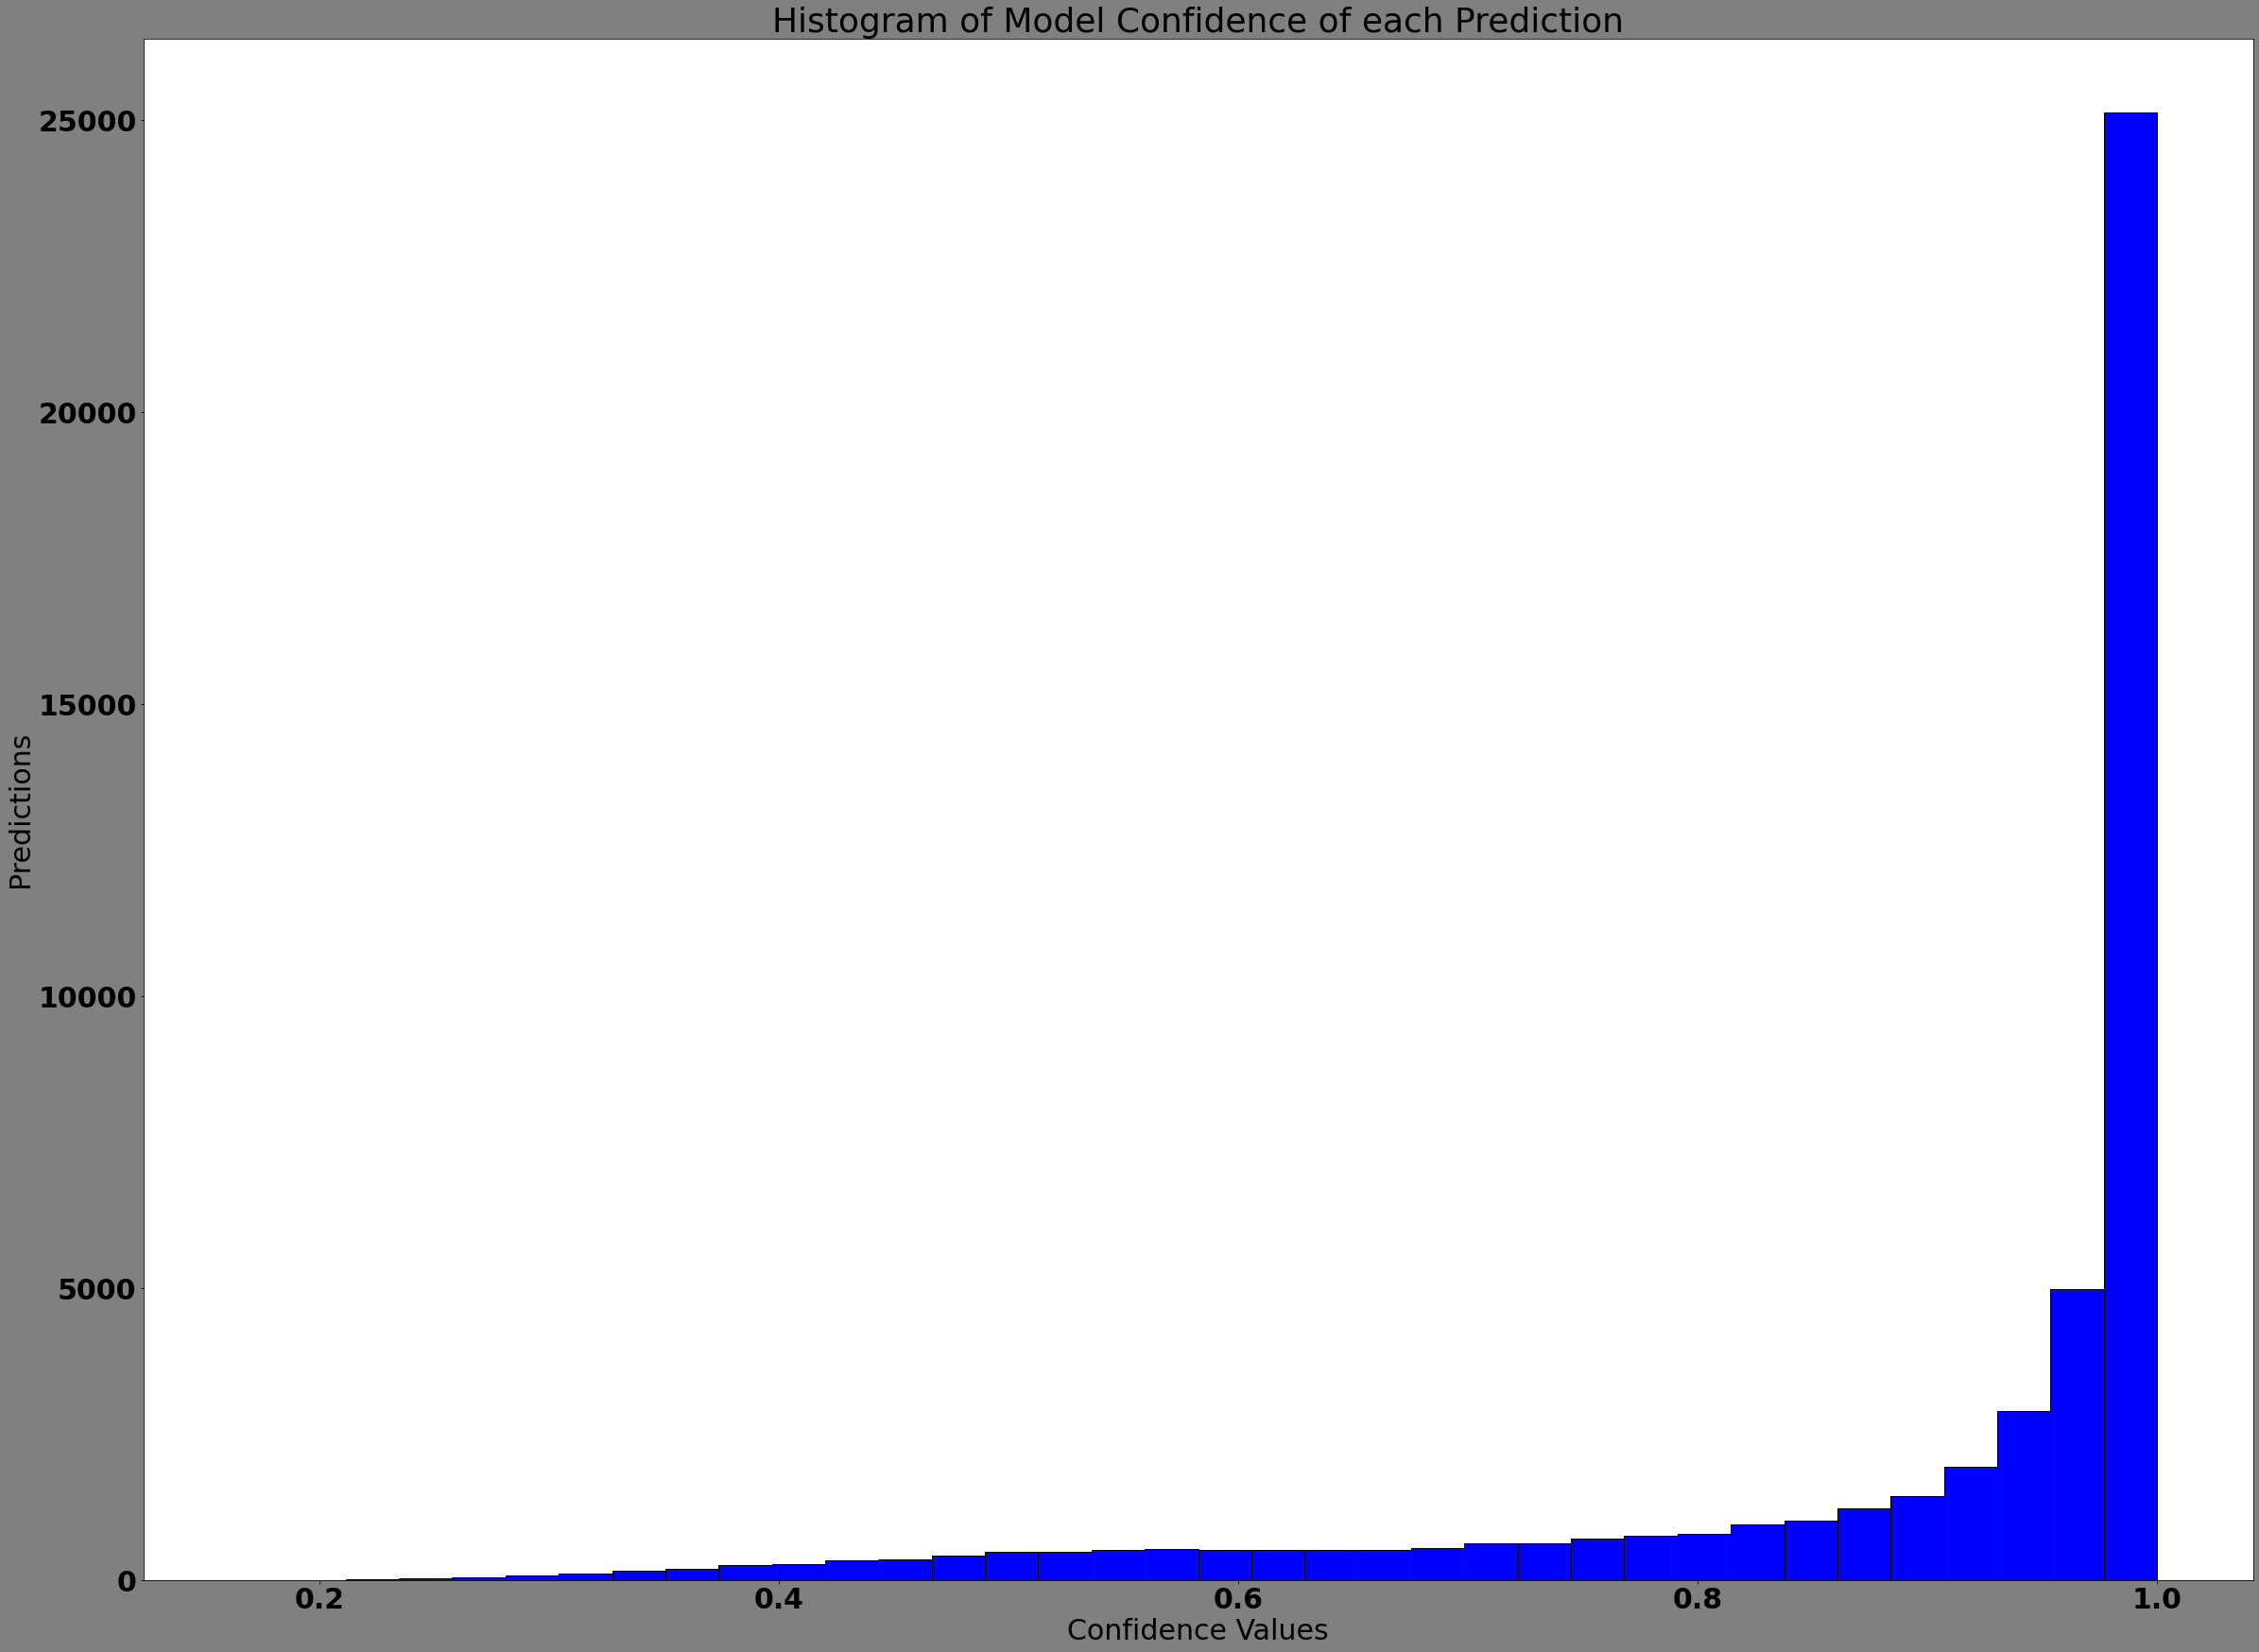

In [28]:
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 30}
matplotlib.rc('font', **font)
plt.figure( figsize = (40, 30), facecolor = 'gray')
plt.hist(np.amax(p, axis = 1), color = 'blue', edgecolor = 'black',
         bins = int(180/5))
# Add labels
plt.title('Histogram of Model Confidence of each Prediction')
plt.xlabel('Confidence Values')
plt.ylabel('Predictions')
plt.show()

This is a histogram of the confidence of the model (a sorta pdf) produced by the prediction confidence on the training set.

In [29]:
p.shape

(50000, 10)

In [39]:
train_pred = model1.predict(trainX,  verbose = 1)
test_pred = model1.predict(testX,  verbose = 1)

50000/50000 [==============================] - 10s 202us/sample


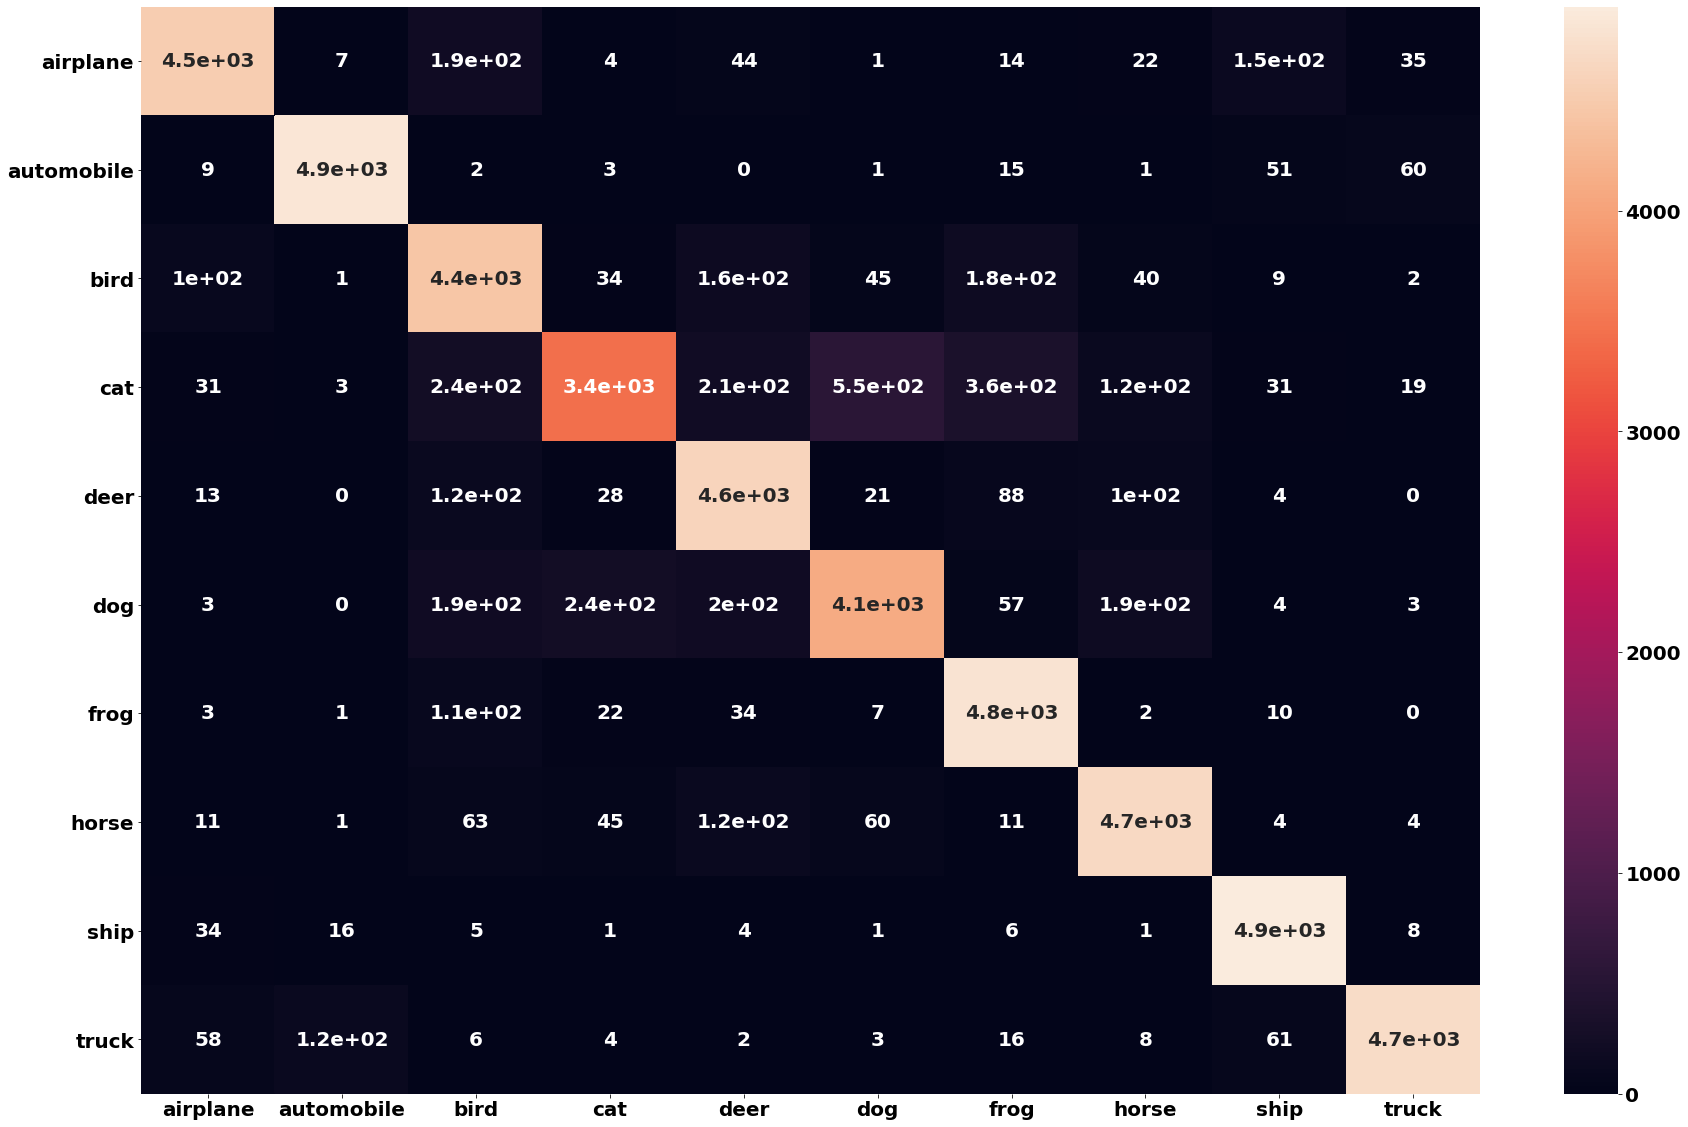

In [33]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
conf = tf.math.confusion_matrix(np.argmax(trainY, axis = -1), np.argmax(train_pred, axis = -1))
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
labels_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',
                'truck']
print("Training set confusion matix")
df_cm = pd.DataFrame(np.array(conf), index = [i for i in labels_names],
                  columns = [i for i in labels_names])
plt.figure(figsize = (30,20))
sn.heatmap(df_cm, annot=True)

Training set confusion matix


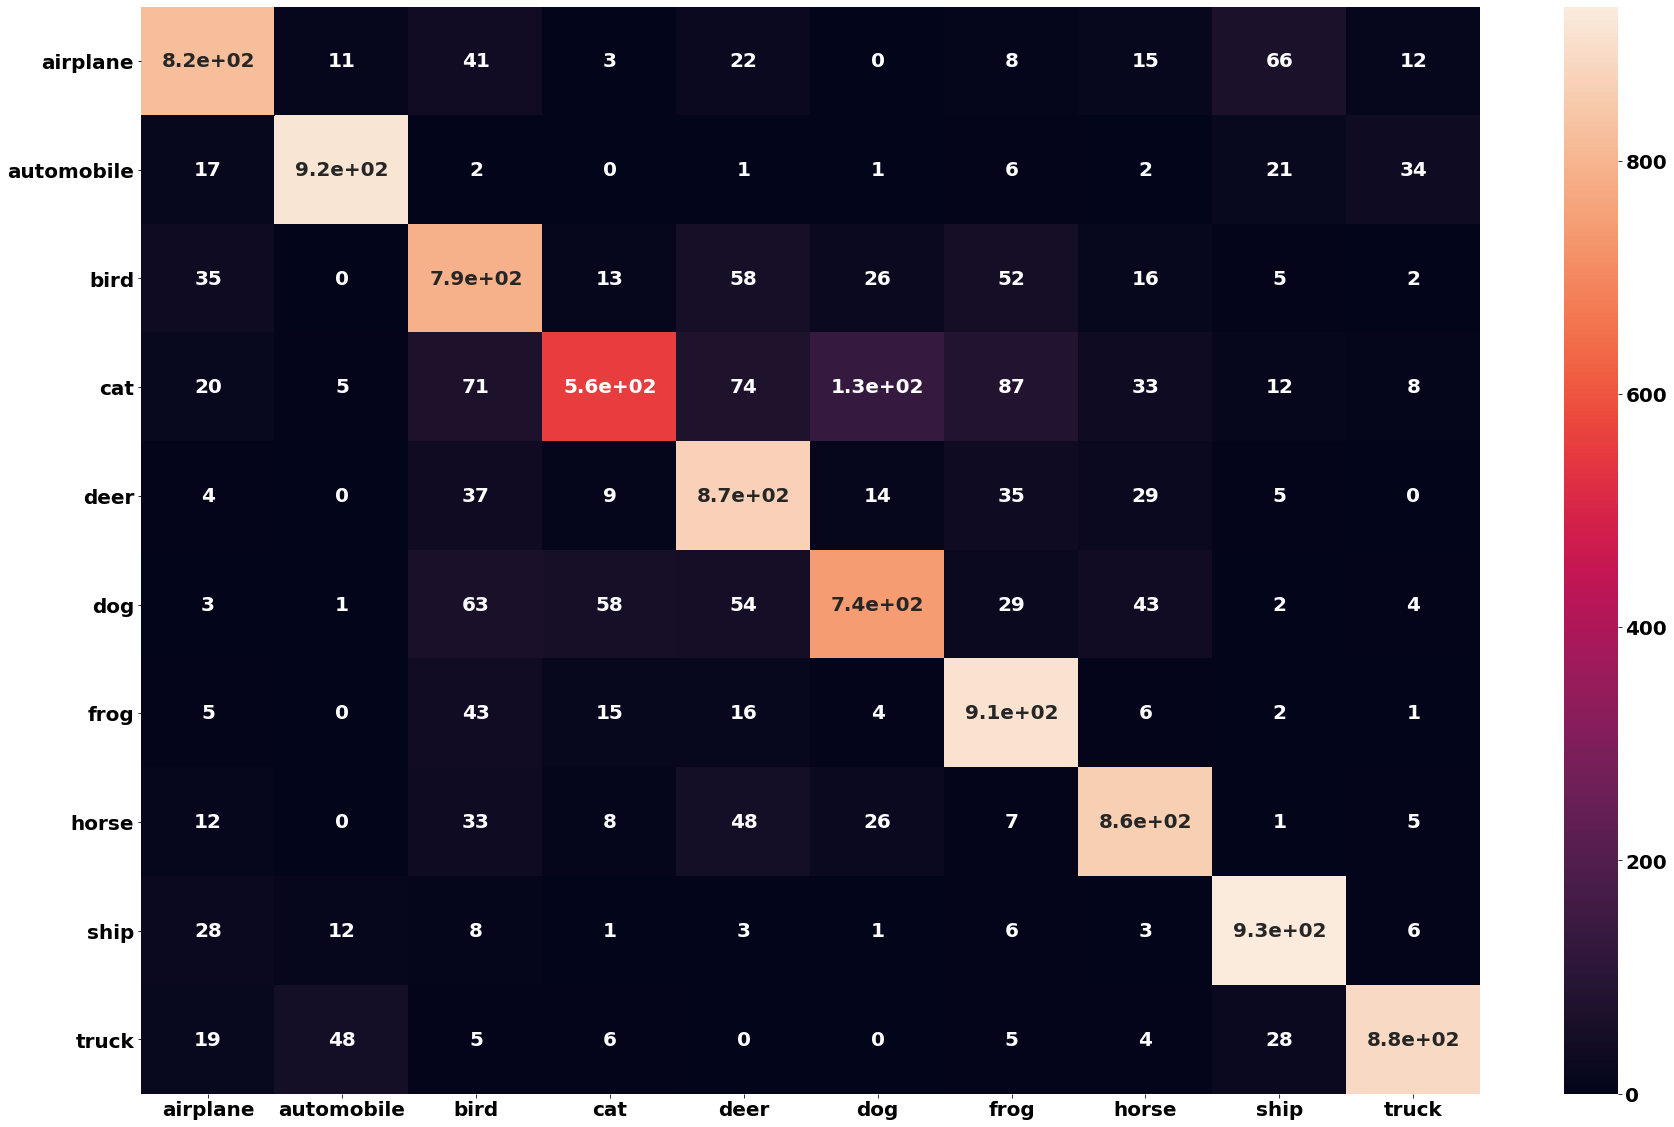

In [45]:
conf = tf.math.confusion_matrix(np.argmax(testY, axis = -1), np.argmax(test_pred, axis = -1))
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
labels_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',
                'truck']
print("Test set confusion matix")
df_cm = pd.DataFrame(np.array(conf), index = [i for i in labels_names],
                  columns = [i for i in labels_names])
plt.figure(figsize = (30,20))
sn.heatmap(df_cm, annot=True)

In [61]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve
f1 = f1_score(np.argmax(testY, axis = -1), np.argmax(test_pred, axis = -1), average = "macro")
acc = accuracy_score(np.argmax(testY, axis = -1), np.argmax(test_pred, axis = -1))
recall = recall_score(np.argmax(testY, axis = -1), np.argmax(test_pred, axis = -1), average = "macro")
precision =precision_score(np.argmax(testY, axis = -1), np.argmax(test_pred, axis = -1), average = "macro")
print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))
print("recall Score: {}".format(recall))
print("Precision Score: {}".format(precision))

Accuracy: 0.8282
F1 Score: 0.825629144112716
recall Score: 0.8282
Precision Score: 0.8307954084943894


c:\users\user\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


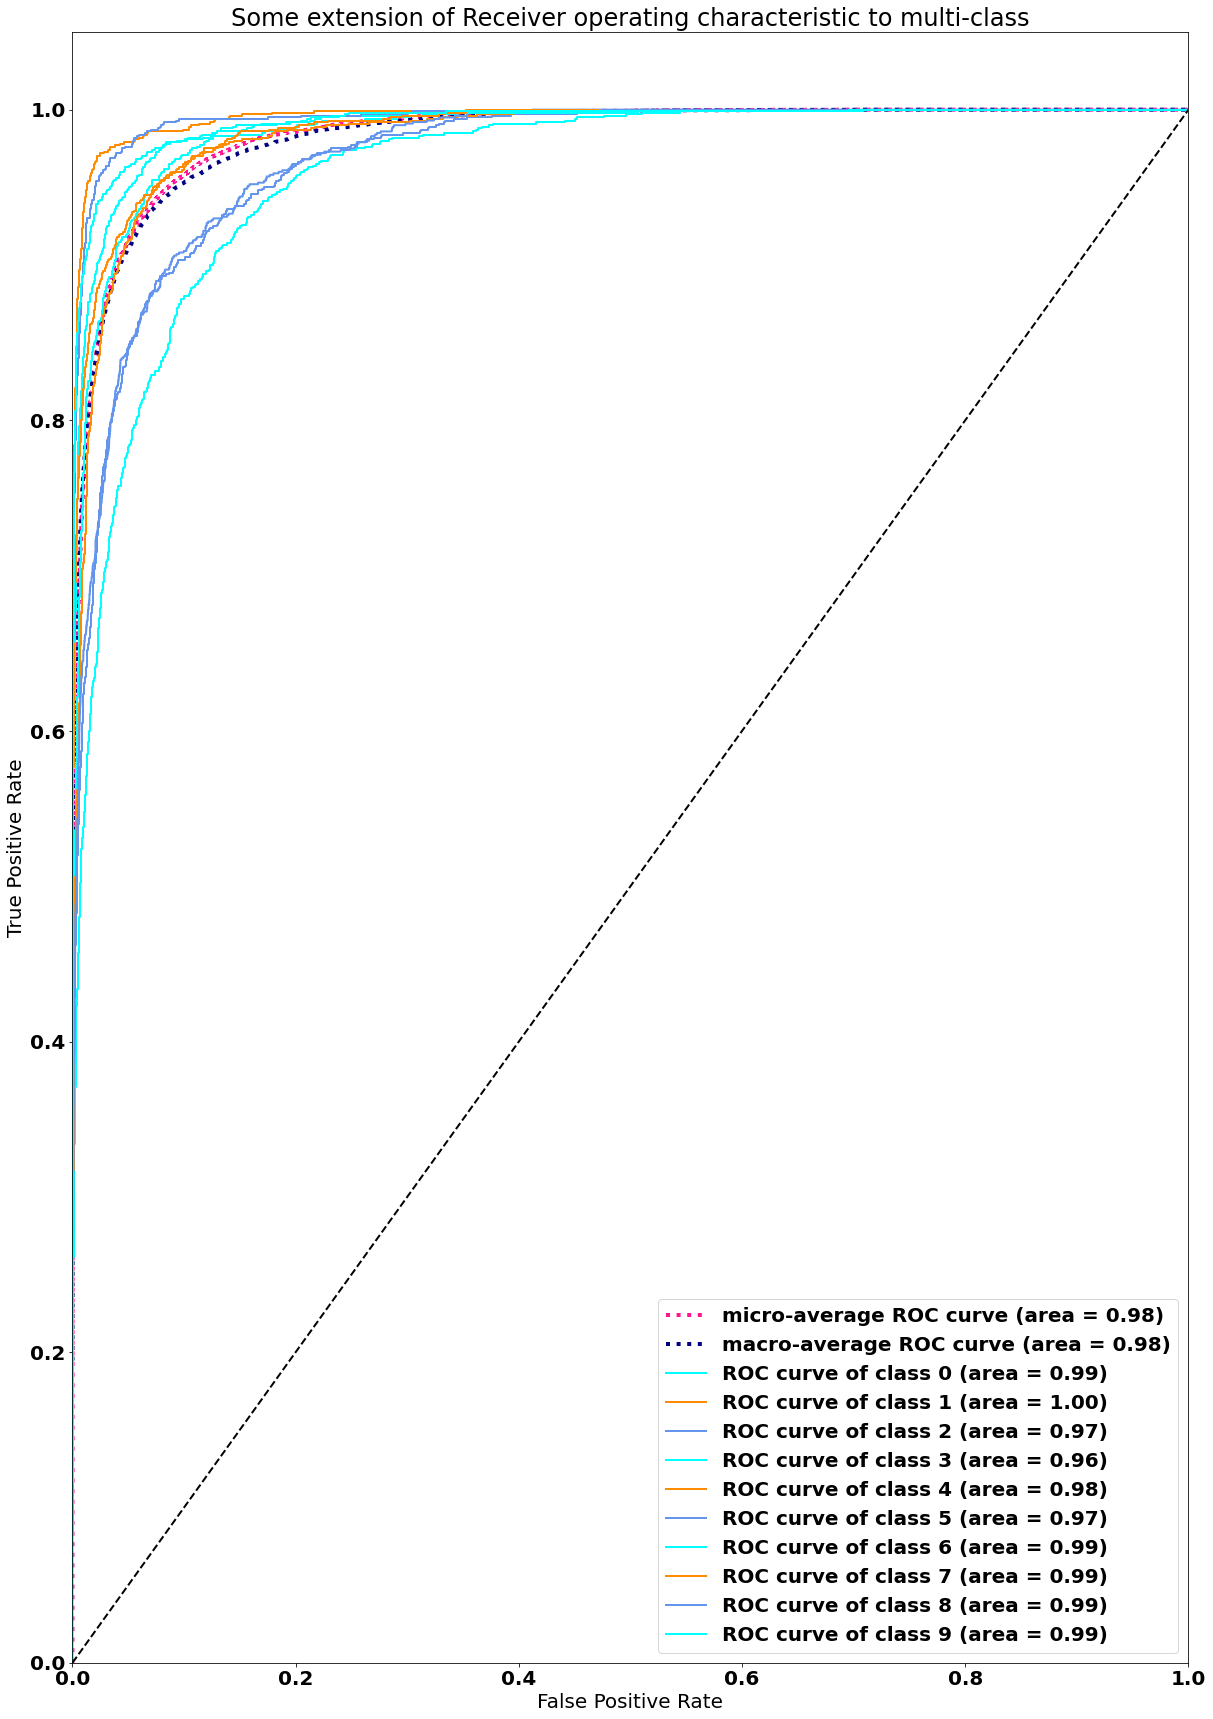

In [67]:

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
y_test = np.copy(testY)
y_score = np.copy(test_pred)
n_classes = 10 
lw =2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20, 30))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()